## Default of Credit Card Clients
## Decision tree type analysis

In [1]:
from joblib import Memory #cache purpose
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
pwd = "./default/"
cache_dir = pwd + 'cache_dir'
mem = Memory(cache_dir)
output_path = './output/more_reg/'
try:
    _=print(os.listdir(output_path))
except:
    os.mkdir(output_path)
from sklearn.model_selection import StratifiedShuffleSplit
df_original = pd.read_excel("./input/default of credit card clients.xls",header=1) #rename mal-nomers
df_original =df_original.rename({
                                'PAY_0' : 'PAY_1',
                                'default payment next month':'default'},axis=1)
BILL = [column for column in df_original.columns if 'BILL' in column]
PAY = [column for column in df_original.columns if 'PAY_AMT' in column]                            
rename_dict = {}
for column in BILL+PAY:
    rename_dict[column]=column[:-1]+'_'+column[-1]
df_original = df_original.rename(rename_dict, axis=1)
BILL = [column for column in df_original.columns if 'BILL' in column] #columns with BILL_AMT_n
PAY = [column for column in df_original.columns if 'PAY_AMT' in column]                            
df = df_original.copy()
N_labels = [column for column in df_original.columns if column !='default']
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train, label_train= df[N_labels].loc[train_index],df.default[train_index]
    df_test, label_test= df[N_labels].loc[test_index], df.default[test_index]
    
def to_csv(arr,train_or_test='train',name=None):   #to_csv
    df = pd.DataFrame(arr)
    if type(name)==str:
        df.to_csv(f'{output_path}/{name}_{train_or_test}.csv', index = False )
    else:
        df.to_csv(f'{output_path}/{train_or_test}.csv', index = False )

[]


In [2]:
# for train_index , test_index in split.split(df_train,pd.concat([df_train.SEX,label_train],axis=1)):
#     X_train, y_train= df_train.iloc[train_index],label_train.iloc[train_index]
#     X_val, y_val = df_train.iloc[test_index], label_train.iloc[test_index]
#X_train ,y_train= df_train.iloc[:150,:] ,label_train.iloc[:150]
X_train ,y_train= df_train,label_train
#X,y= df_train.iloc[:300,:] ,label_train.iloc[:300]

In [3]:
from pyts.transformation import BagOfPatterns as BOP
from mods_defaults import ElementaryExtractor,BasicTransformer,MyMulPyts, NonTsPass #for pickle (cache)purpose
my_basic = BasicTransformer()
t_df = my_basic.fit_transform(X_train)
print(t_df.columns)
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
L_PAY = [column for column in t_df.columns if 'log_PAY' in column]
L_BILL = [column for column in t_df.columns if 'log_BILL' in column]
L_USAGE =  [column for column in t_df.columns if 'log_USAGE' in column]
L_DIFF =  [column for column in t_df.columns if 'log_DIFF' in column]
print(len(L_PAY))

Index(['log_LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'log_BILL_AMT_1',
       'log_BILL_AMT_2', 'log_BILL_AMT_3', 'log_BILL_AMT_4', 'log_BILL_AMT_5',
       'log_BILL_AMT_6', 'log_PAY_AMT_1', 'log_PAY_AMT_2', 'log_PAY_AMT_3',
       'log_PAY_AMT_4', 'log_PAY_AMT_5', 'log_PAY_AMT_6', 'log_USAGE_1',
       'log_USAGE_2', 'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5',
       'log_DIFF_0', 'log_DIFF_1', 'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4'],
      dtype='object')
6


In [4]:
my_basic = BasicTransformer(scale="")
t_df = my_basic.fit_transform(X_train)
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
USAGE =  [column for column in t_df.columns if 'USAGE' in column]
DIFF =  [column for column in t_df.columns if 'DIFF' in column]
len(USAGE+DIFF)

10

In [5]:
from sklearn.pipeline import Pipeline
# SVCs
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# pipeline
from sklearn.pipeline import make_union
# evaluation modules
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
def my_score(y_train,y_pred):
    accuracy = accuracy_score(y_train,y_pred)
    print(f'accuracy : {accuracy}')
    pre_score = precision_score(y_train,y_pred)
    print(f'precision : {pre_score}')
    rec_score = recall_score(y_train,y_pred)
    print(f'recall : {rec_score}')
    f_score = f1_score(y_train,y_pred)
    print(f'f1_score: {f_score}')

    return [round(accuracy,4), round(pre_score,4), round(rec_score ,4), round(f_score,4)]



In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=433)
for train_index , test_index in split.split(df_train,pd.concat([df_train.SEX,label_train],axis=1)):
    X_train, y_train= df_train.iloc[train_index],label_train.iloc[train_index]
    X_val, y_val = df_train.iloc[test_index], label_train.iloc[test_index]

In [7]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=None):
    if ax is None:
        plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        plt.plot(thresholds, recalls[:-1], 'g-',label="recall")
        plt.xlabel("thresholds")
        plt.legend(loc="upper left")
        plt.ylim([0,1])
    else:
        ax.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        ax.plot(thresholds, recalls[:-1], 'g-',label="recall")
        ax.set_xlabel("thresholds")
        ax.legend(loc="upper left")
        ax.set_ylim([0,1])


In [8]:
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[L_USAGE,L_DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,L_PAY,L_BILL])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,L_PAY,L_BILL])
my_elementary_trans_5 = ElementaryExtractor([L_USAGE,L_DIFF])


extractors = [NonTsPass(),length_5_bop,length_6_bop,my_elementary_trans_5,my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor

FeatureUnion(transformer_list=[('nontspass', NonTsPass()),
                               ('mymulpyts-1',
                                MyMulPyts(channel_list=[['log_USAGE_1',
                                                         'log_USAGE_2',
                                                         'log_USAGE_3',
                                                         'log_USAGE_4',
                                                         'log_USAGE_5'],
                                                        ['log_DIFF_0',
                                                         'log_DIFF_1',
                                                         'log_DIFF_2',
                                                         'log_DIFF_3',
                                                         'log_DIFF_4']],
                                          estimator=BagOfPatterns(n_bins=3,
                                                                  sparse=False,
                                                                  strategy='uniform',
                                                                  window_size=3,
                                                                  word_size=3))),
                               ('mymulpyts-2',
                                MyMul...
                                                                   'log_DIFF_2',
                                                                   'log_DIFF_3',
                                                                   'log_DIFF_4']])),
                               ('elementaryextractor-2',
                                ElementaryExtractor(channel_list=[['PAY_1',
                                                                   'PAY_2',
                                                                   'PAY_3',
                                                                   'PAY_4',
                                                                   'PAY_5',
                                                                   'PAY_6'],
                                                                  ['log_PAY_AMT_1',
                                                                   'log_PAY_AMT_2',
                                                                   'log_PAY_AMT_3',
                                                                   'log_PAY_AMT_4',
                                                                   'log_PAY_AMT_5',
                                                                   'log_PAY_AMT_6'],
                                                                  ['log_BILL_AMT_1',
                                                                   'log_BILL_AMT_2',
                                                                   'log_BILL_AMT_3',
                                                                   'log_BILL_AMT_4',
                                                                   'log_BILL_AMT_5',
                                                                   'log_BILL_AMT_6']]))])

In [9]:
#  pipe = Pipeline([('base',BasicTransformer()),
#                 ('extractor',extractor),
#                 ('scaler',StandardScaler()),
#                 ('estimator',LinearSVC(max_iter = 10000,random_state=42))
#                 ],memory = cache_dir)
# pipe.fit(X_train,y_train)
# y_pred = pipe.predict(X_train)
# cf_matrix =confusion_matrix(y_train,y_pred)
# print(cf_matrix)
# my_score(y_train,y_pred)

In [10]:
y_train_preds = []
y_val_preds = []
y_val_scores= []
results_df_columns = []
evals_df_columns = [] 

t_series,non_regul
Tree
[[3579  802]
 [ 763  481]]

train scores
accuracy : 0.9962074074074074
precision : 0.9972892382759555
recall : 0.985534422716314
f1_score: 0.99137698733495

Val scores
accuracy : 0.7217777777777777
precision : 0.37490257209664846
recall : 0.3866559485530547
f1_score: 0.3806885635140483


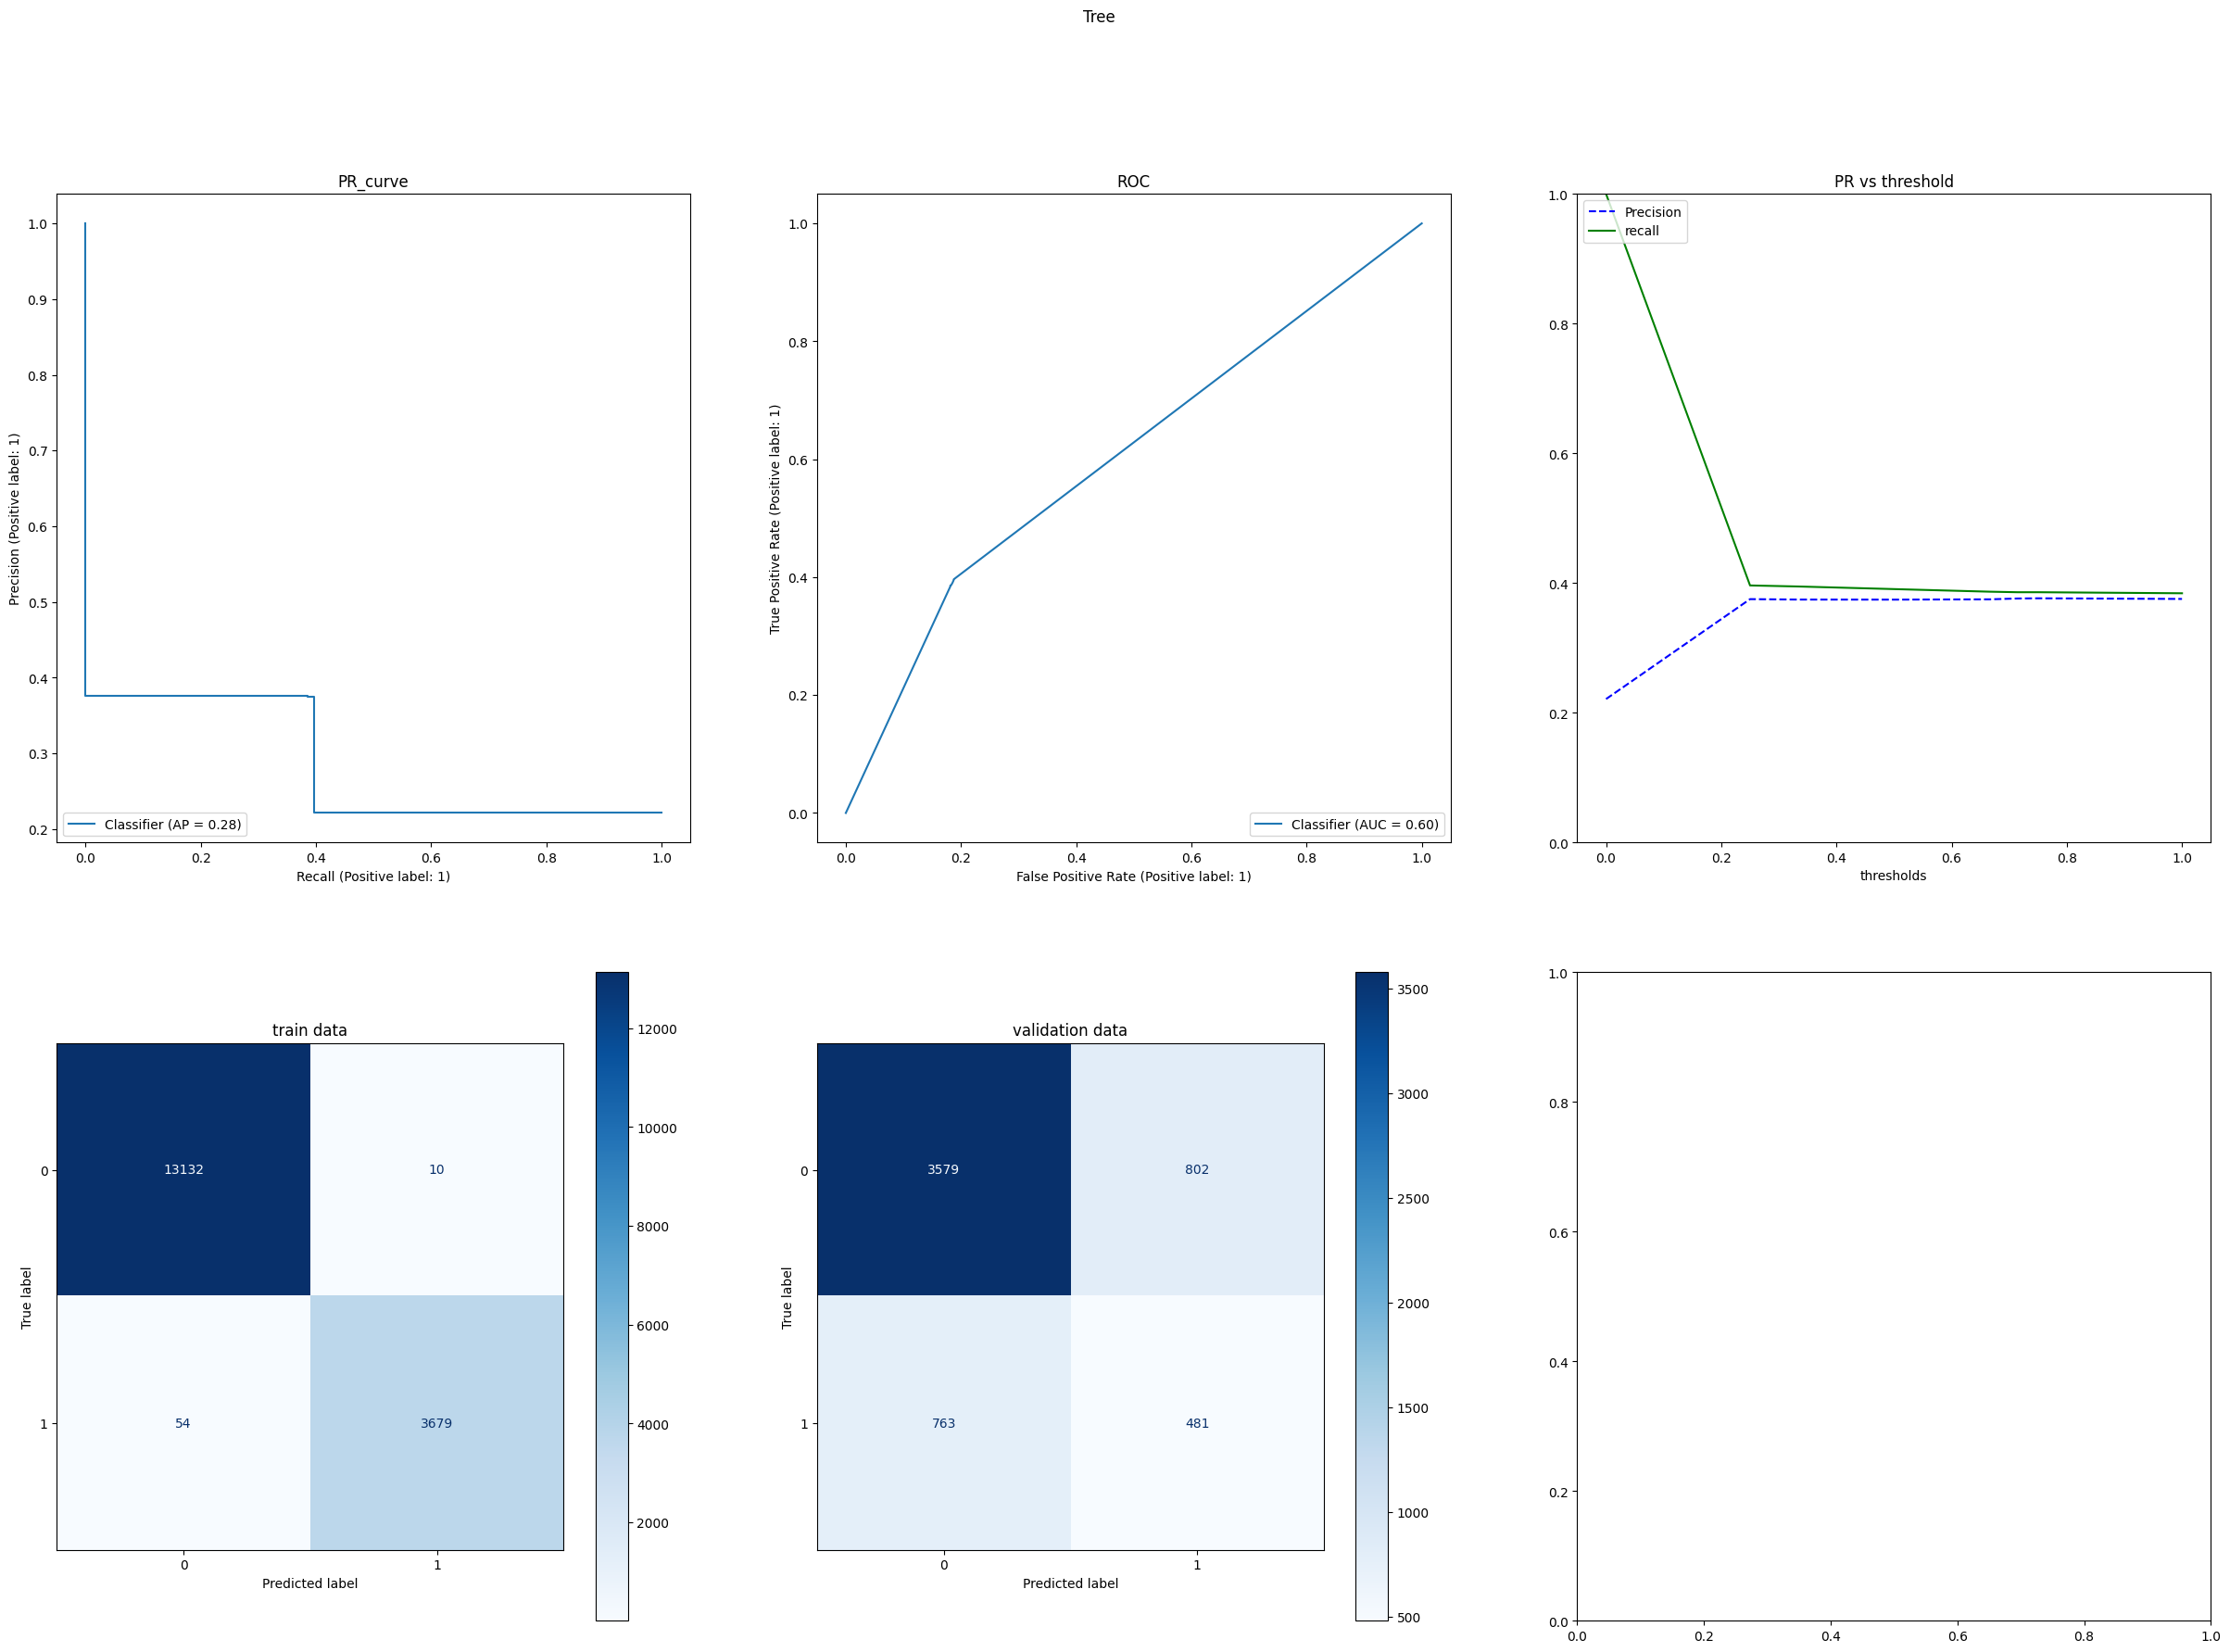

Forest
[[4118  263]
 [ 806  438]]

train scores
accuracy : 0.9962074074074074
precision : 0.9938088829071332
recall : 0.989016876506831
f1_score: 0.9914070891514501

Val scores
accuracy : 0.8099555555555555
precision : 0.6248216833095578
recall : 0.3520900321543408
f1_score: 0.4503856041131105


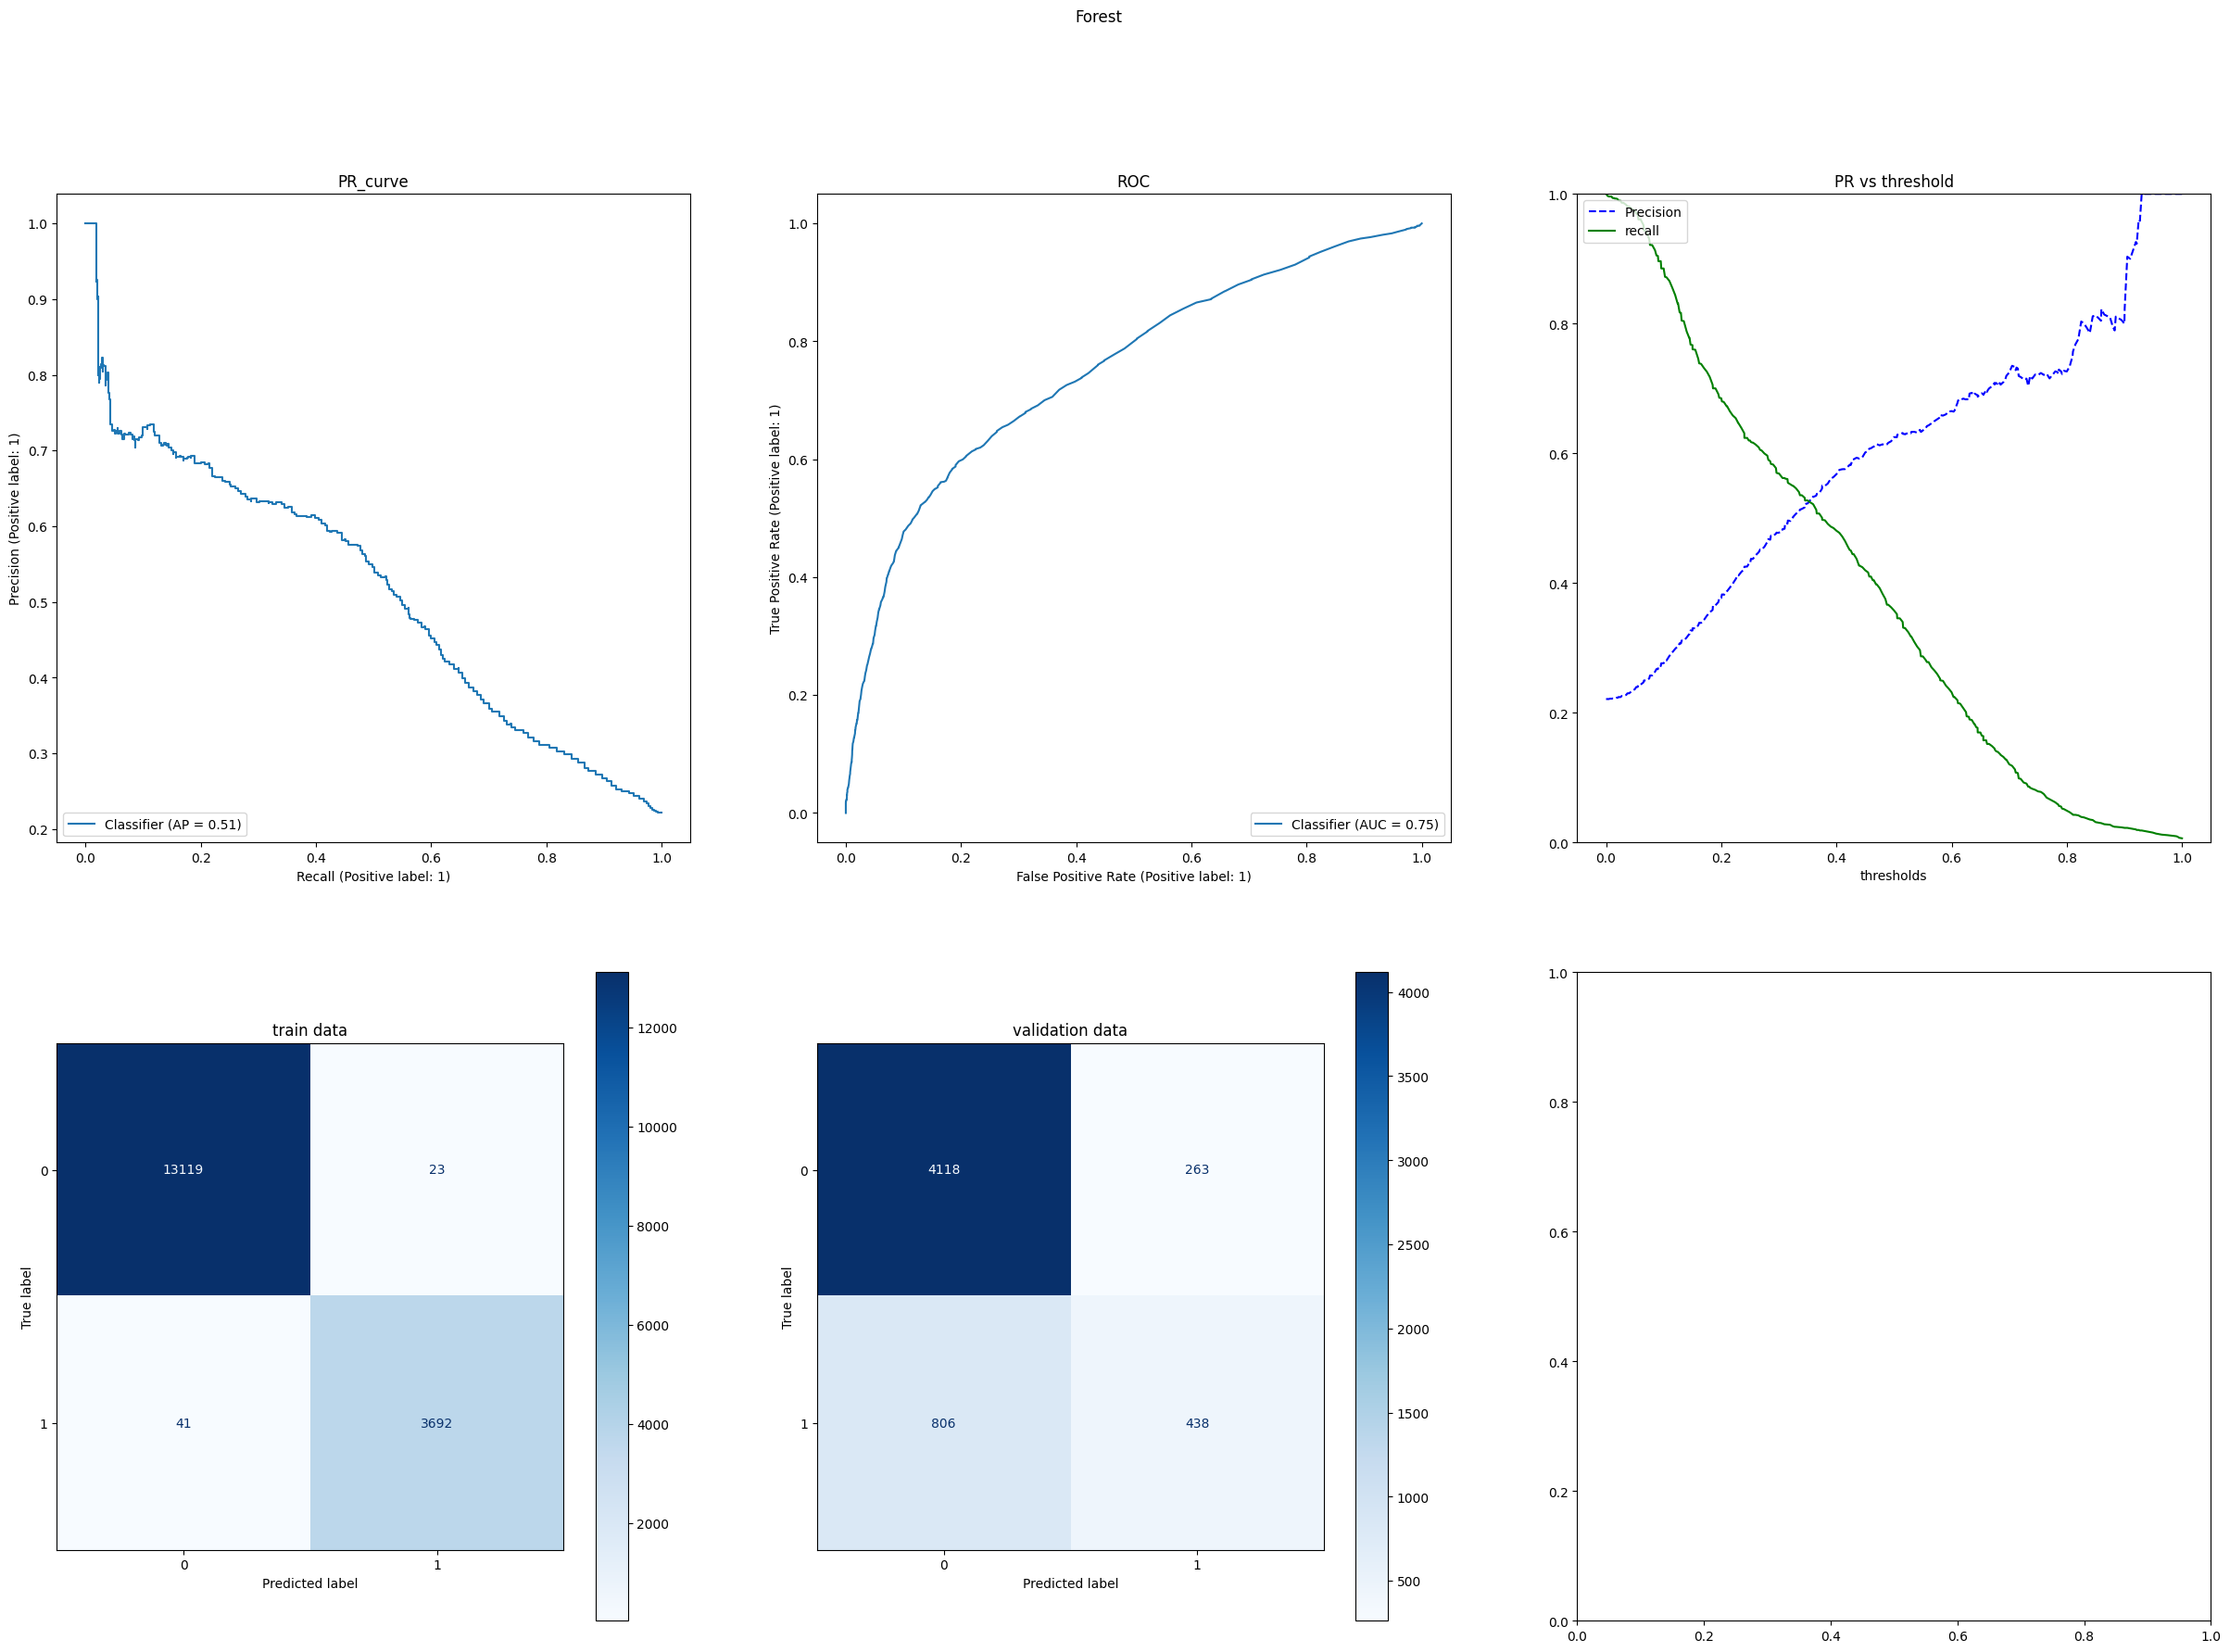

Ada
[[4150  231]
 [ 815  429]]

train scores
accuracy : 0.8124444444444444
precision : 0.6404549950544016
recall : 0.346905973747656
f1_score: 0.45004344048653344

Val scores
accuracy : 0.8140444444444445
precision : 0.65
recall : 0.34485530546623794
f1_score: 0.4506302521008404


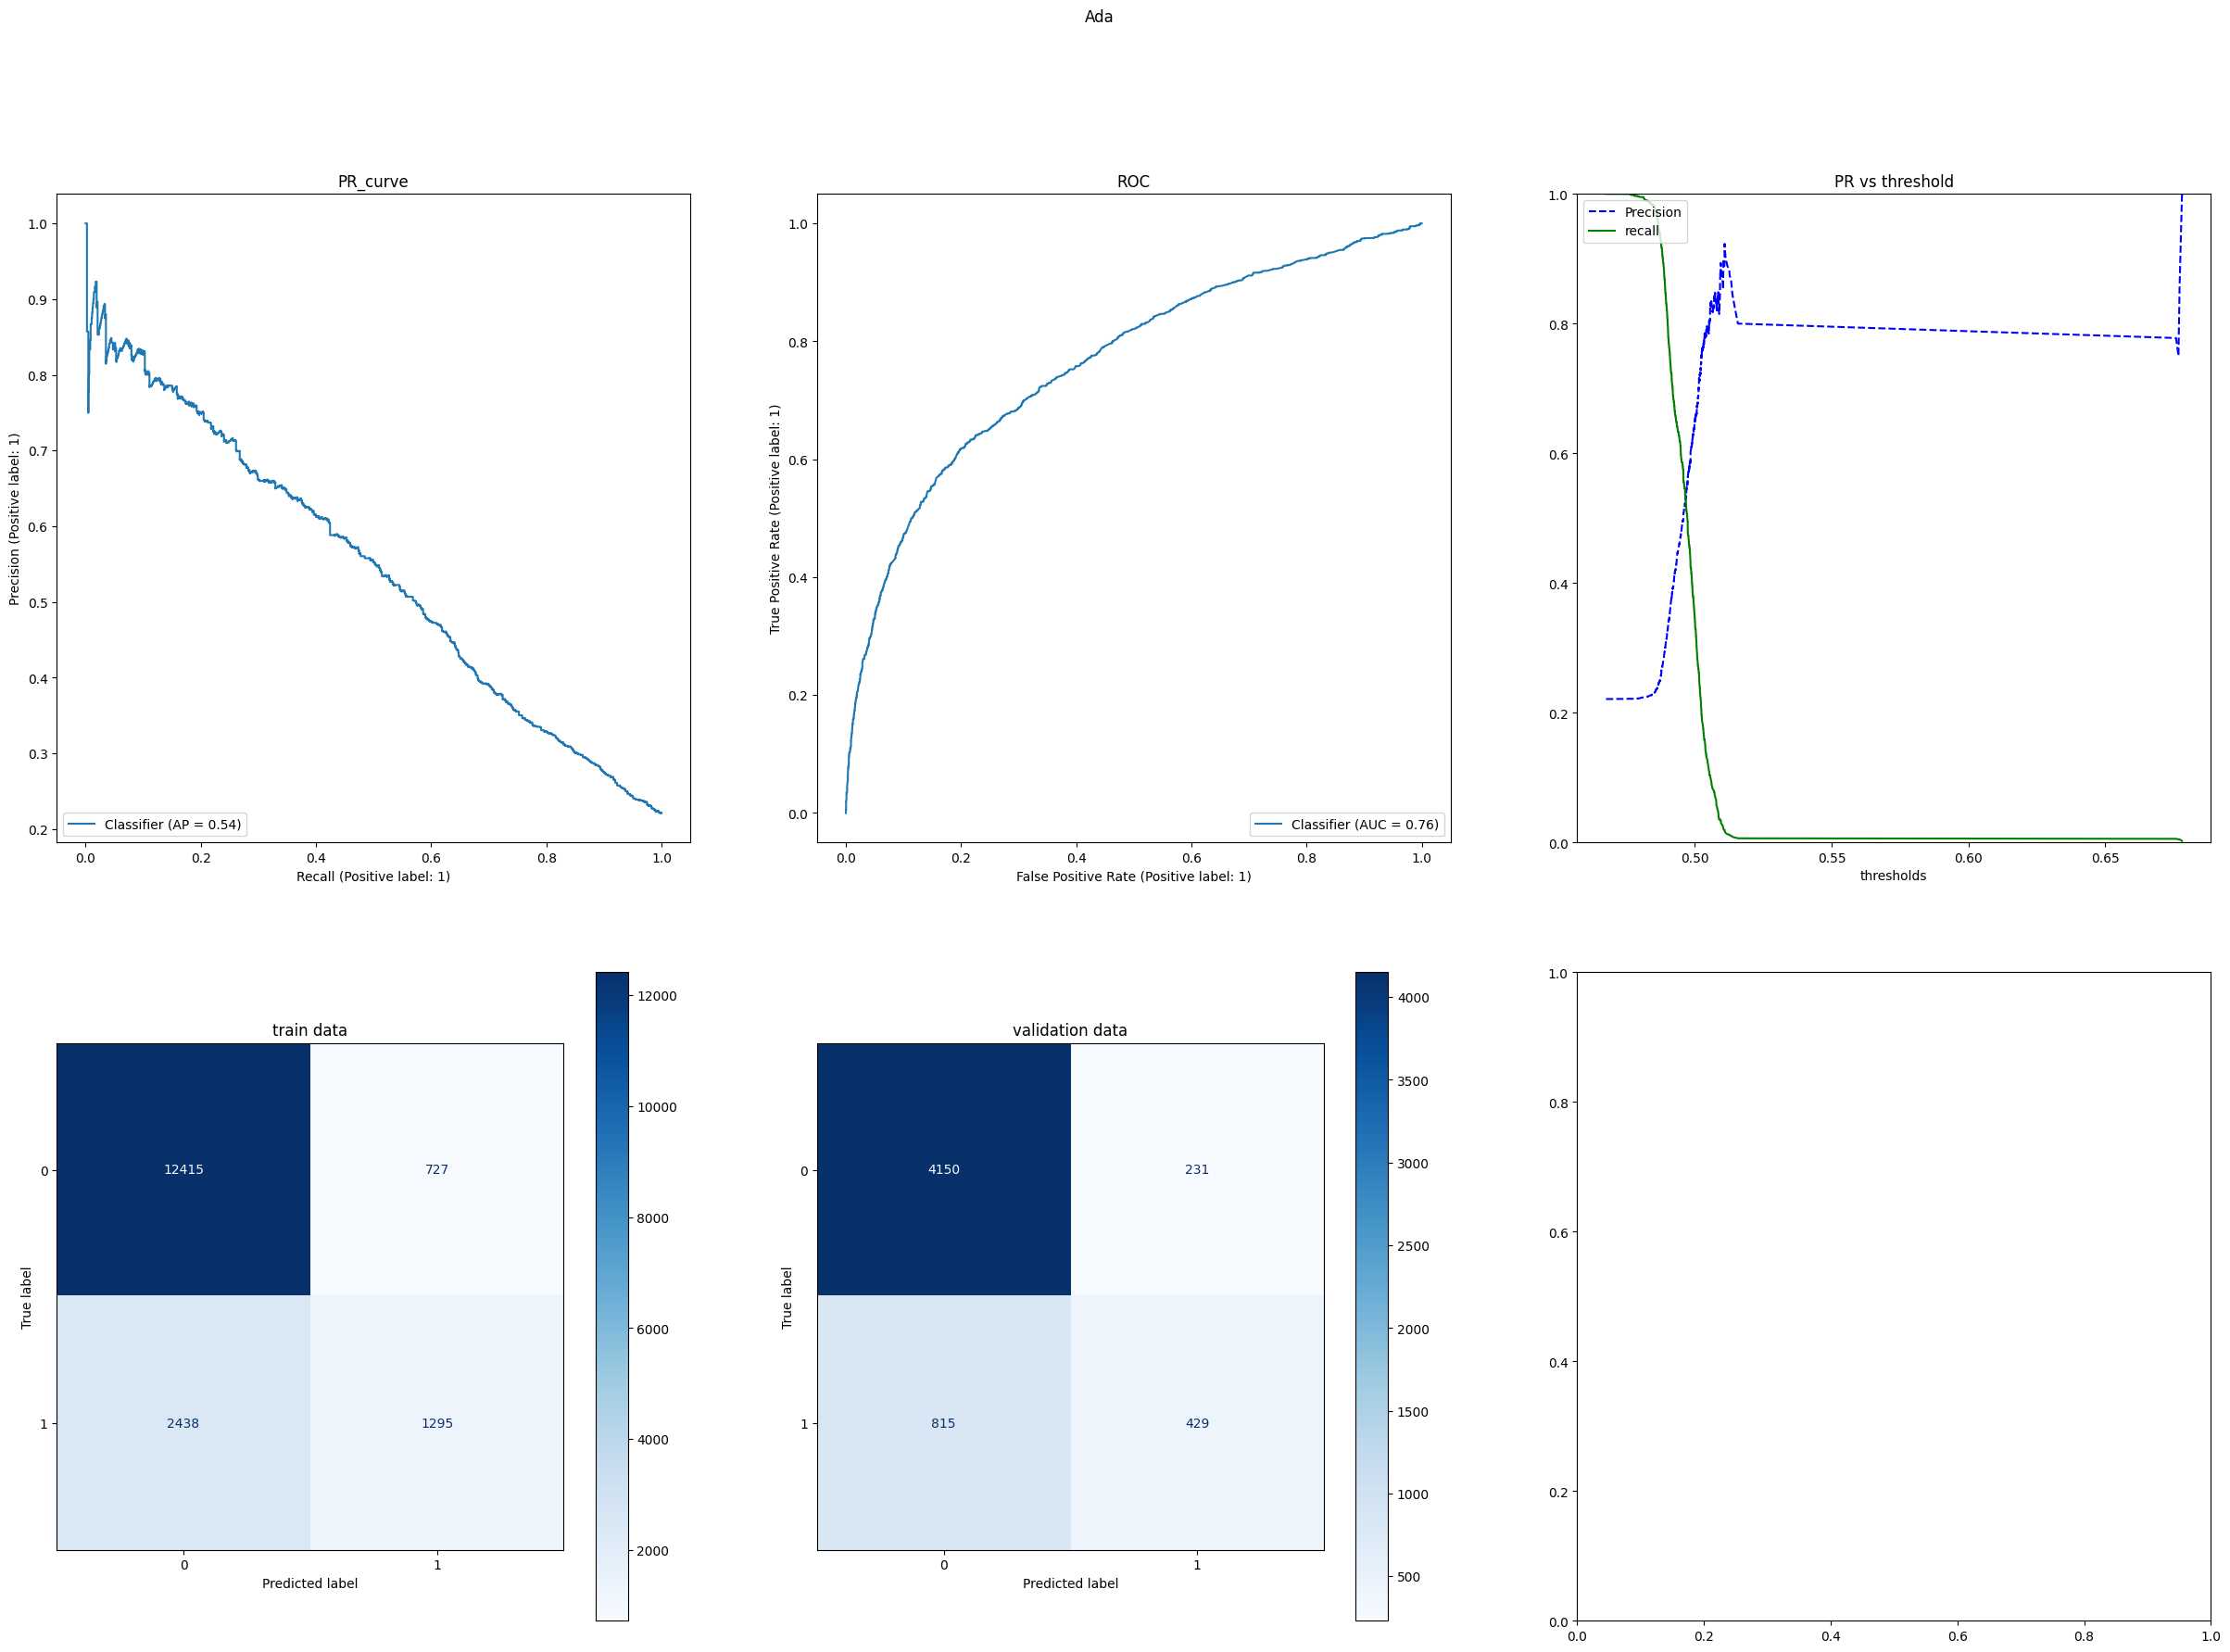

GdBoost
[[4173  208]
 [ 800  444]]

train scores
accuracy : 0.8277925925925926
precision : 0.71021860701576
recall : 0.3742298419501741
f1_score: 0.4901754385964912

Val scores
accuracy : 0.8208
precision : 0.6809815950920245
recall : 0.35691318327974275
f1_score: 0.4683544303797469


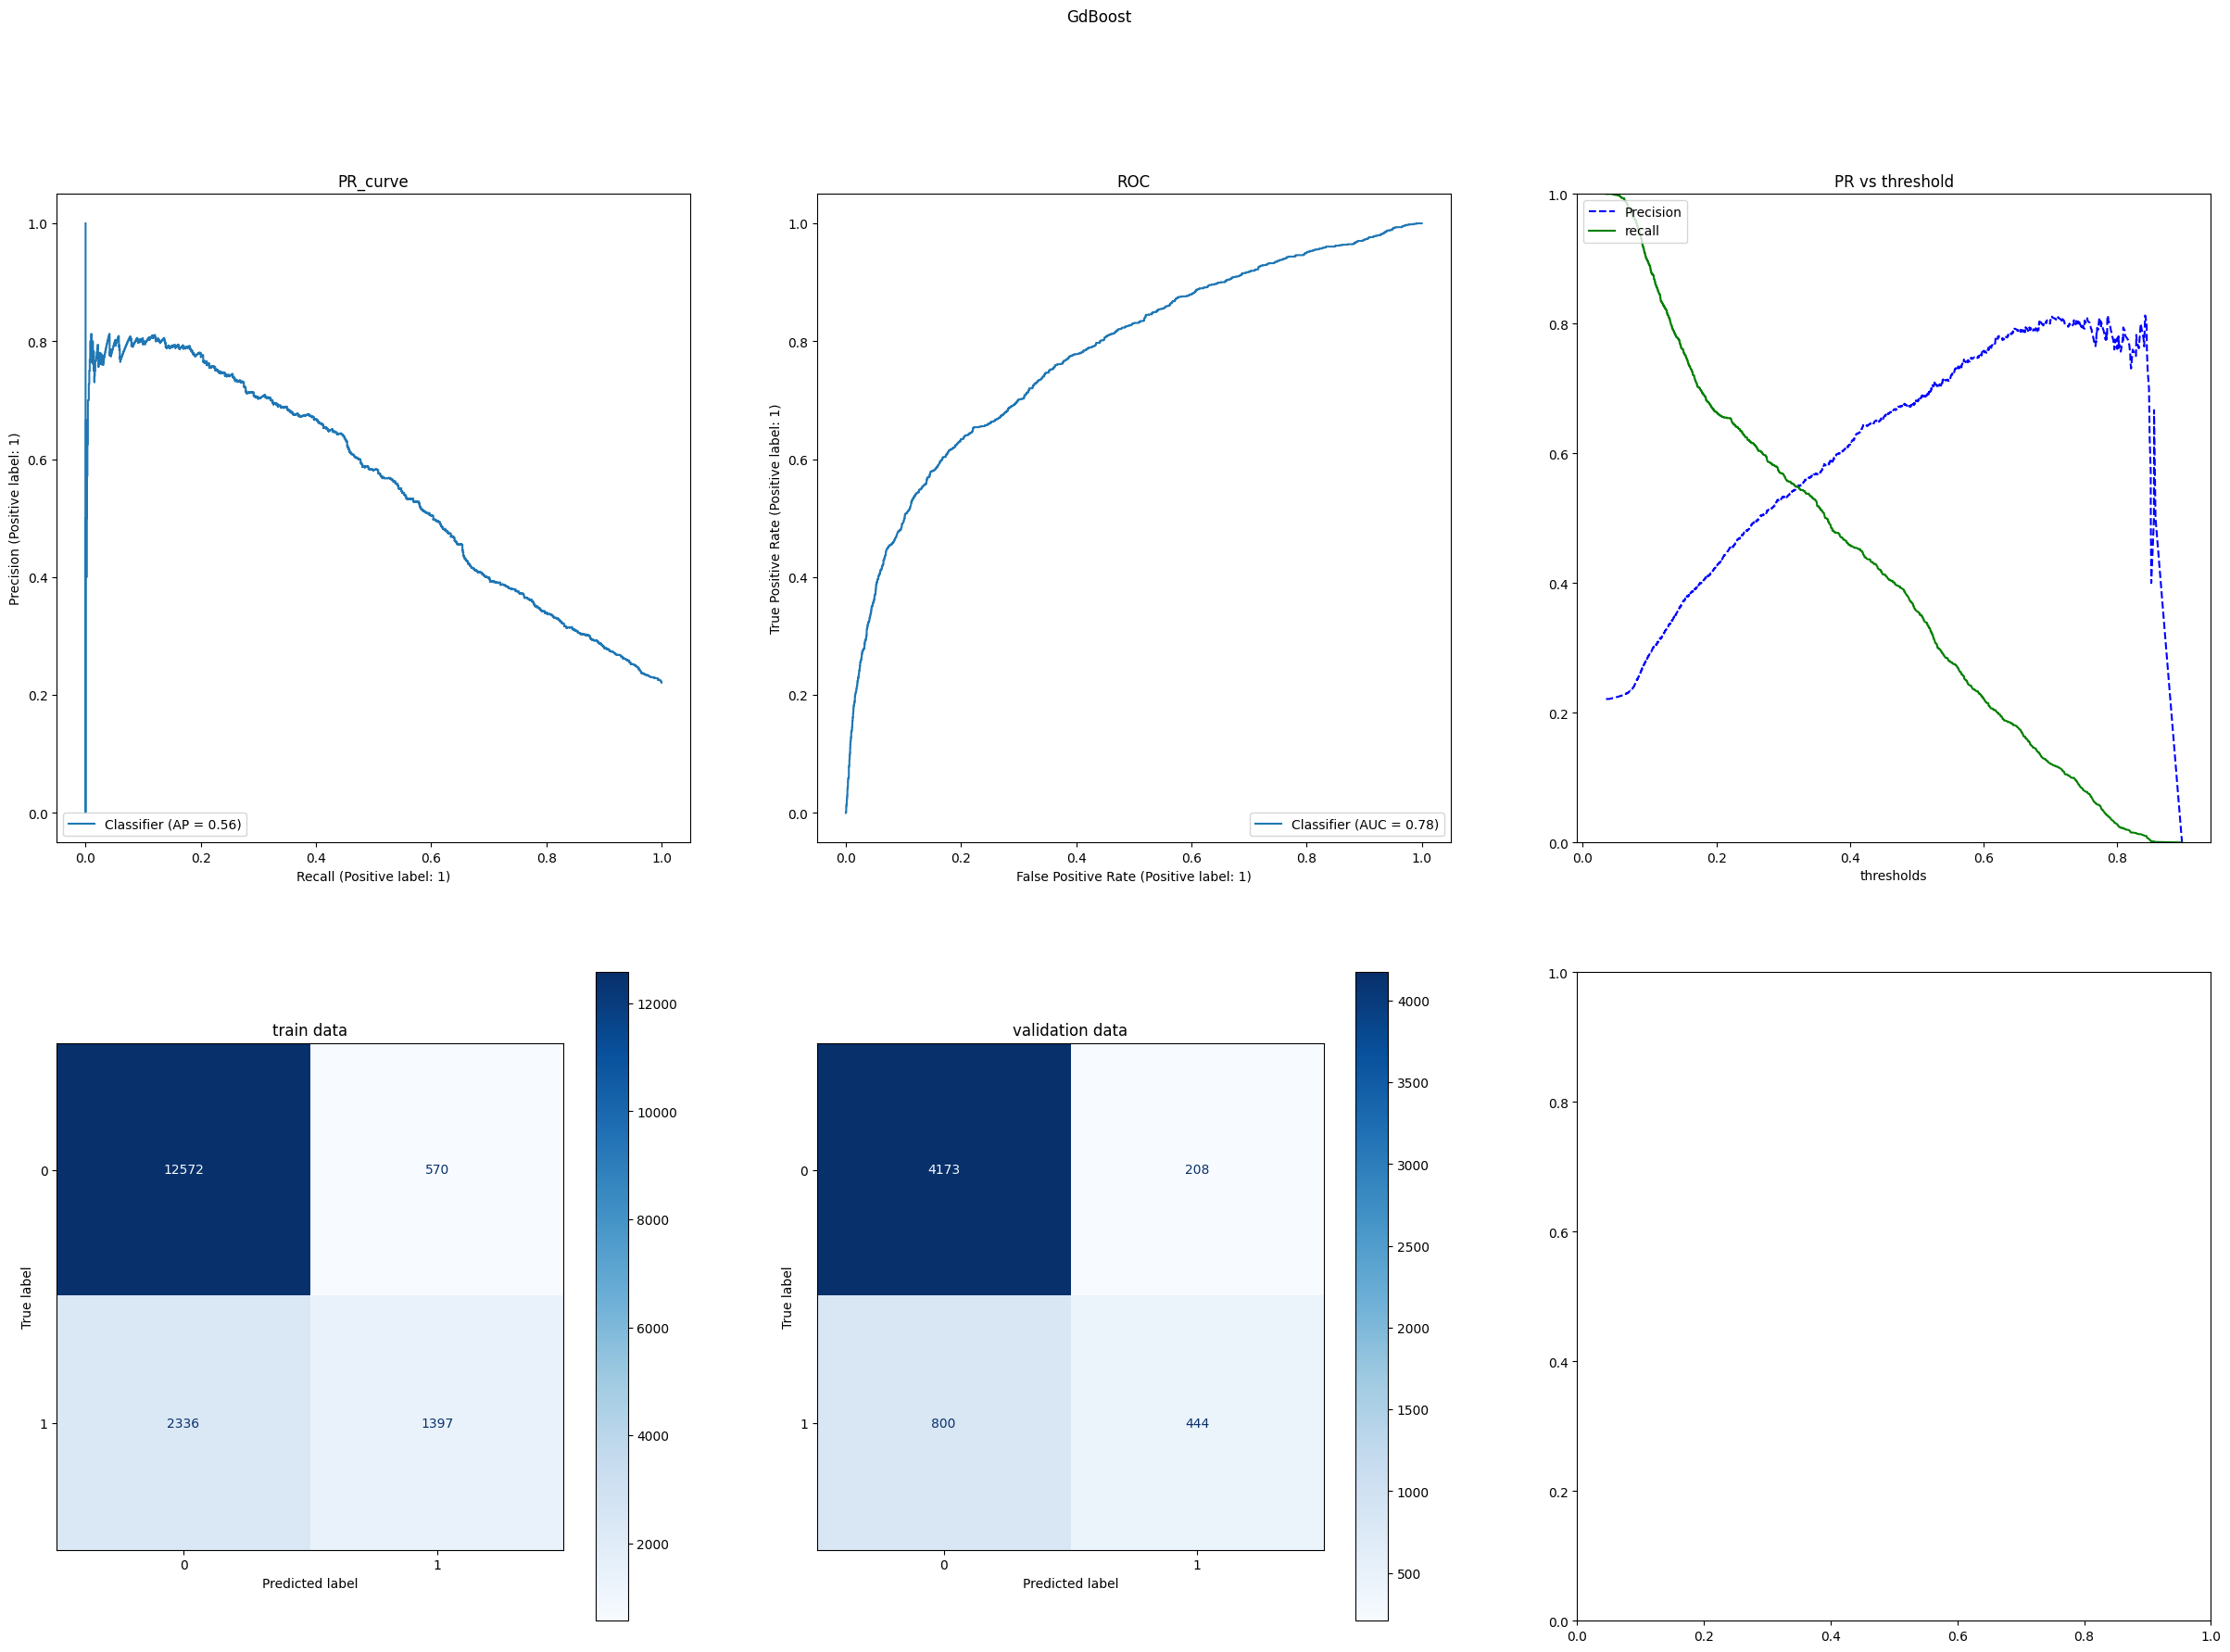

In [11]:
case_name ='t_series,non_regul'
print(case_name)
my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,



results = []
#Computation
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})



#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

raw,non_regul
Tree
[[3558  823]
 [ 723  521]]

train scores
accuracy : 0.9994666666666666
precision : 1.0
recall : 0.9975890704527189
f1_score: 0.9987930803272094

Val scores
accuracy : 0.7251555555555556
precision : 0.38764880952380953
recall : 0.4188102893890675
f1_score: 0.40262751159196286


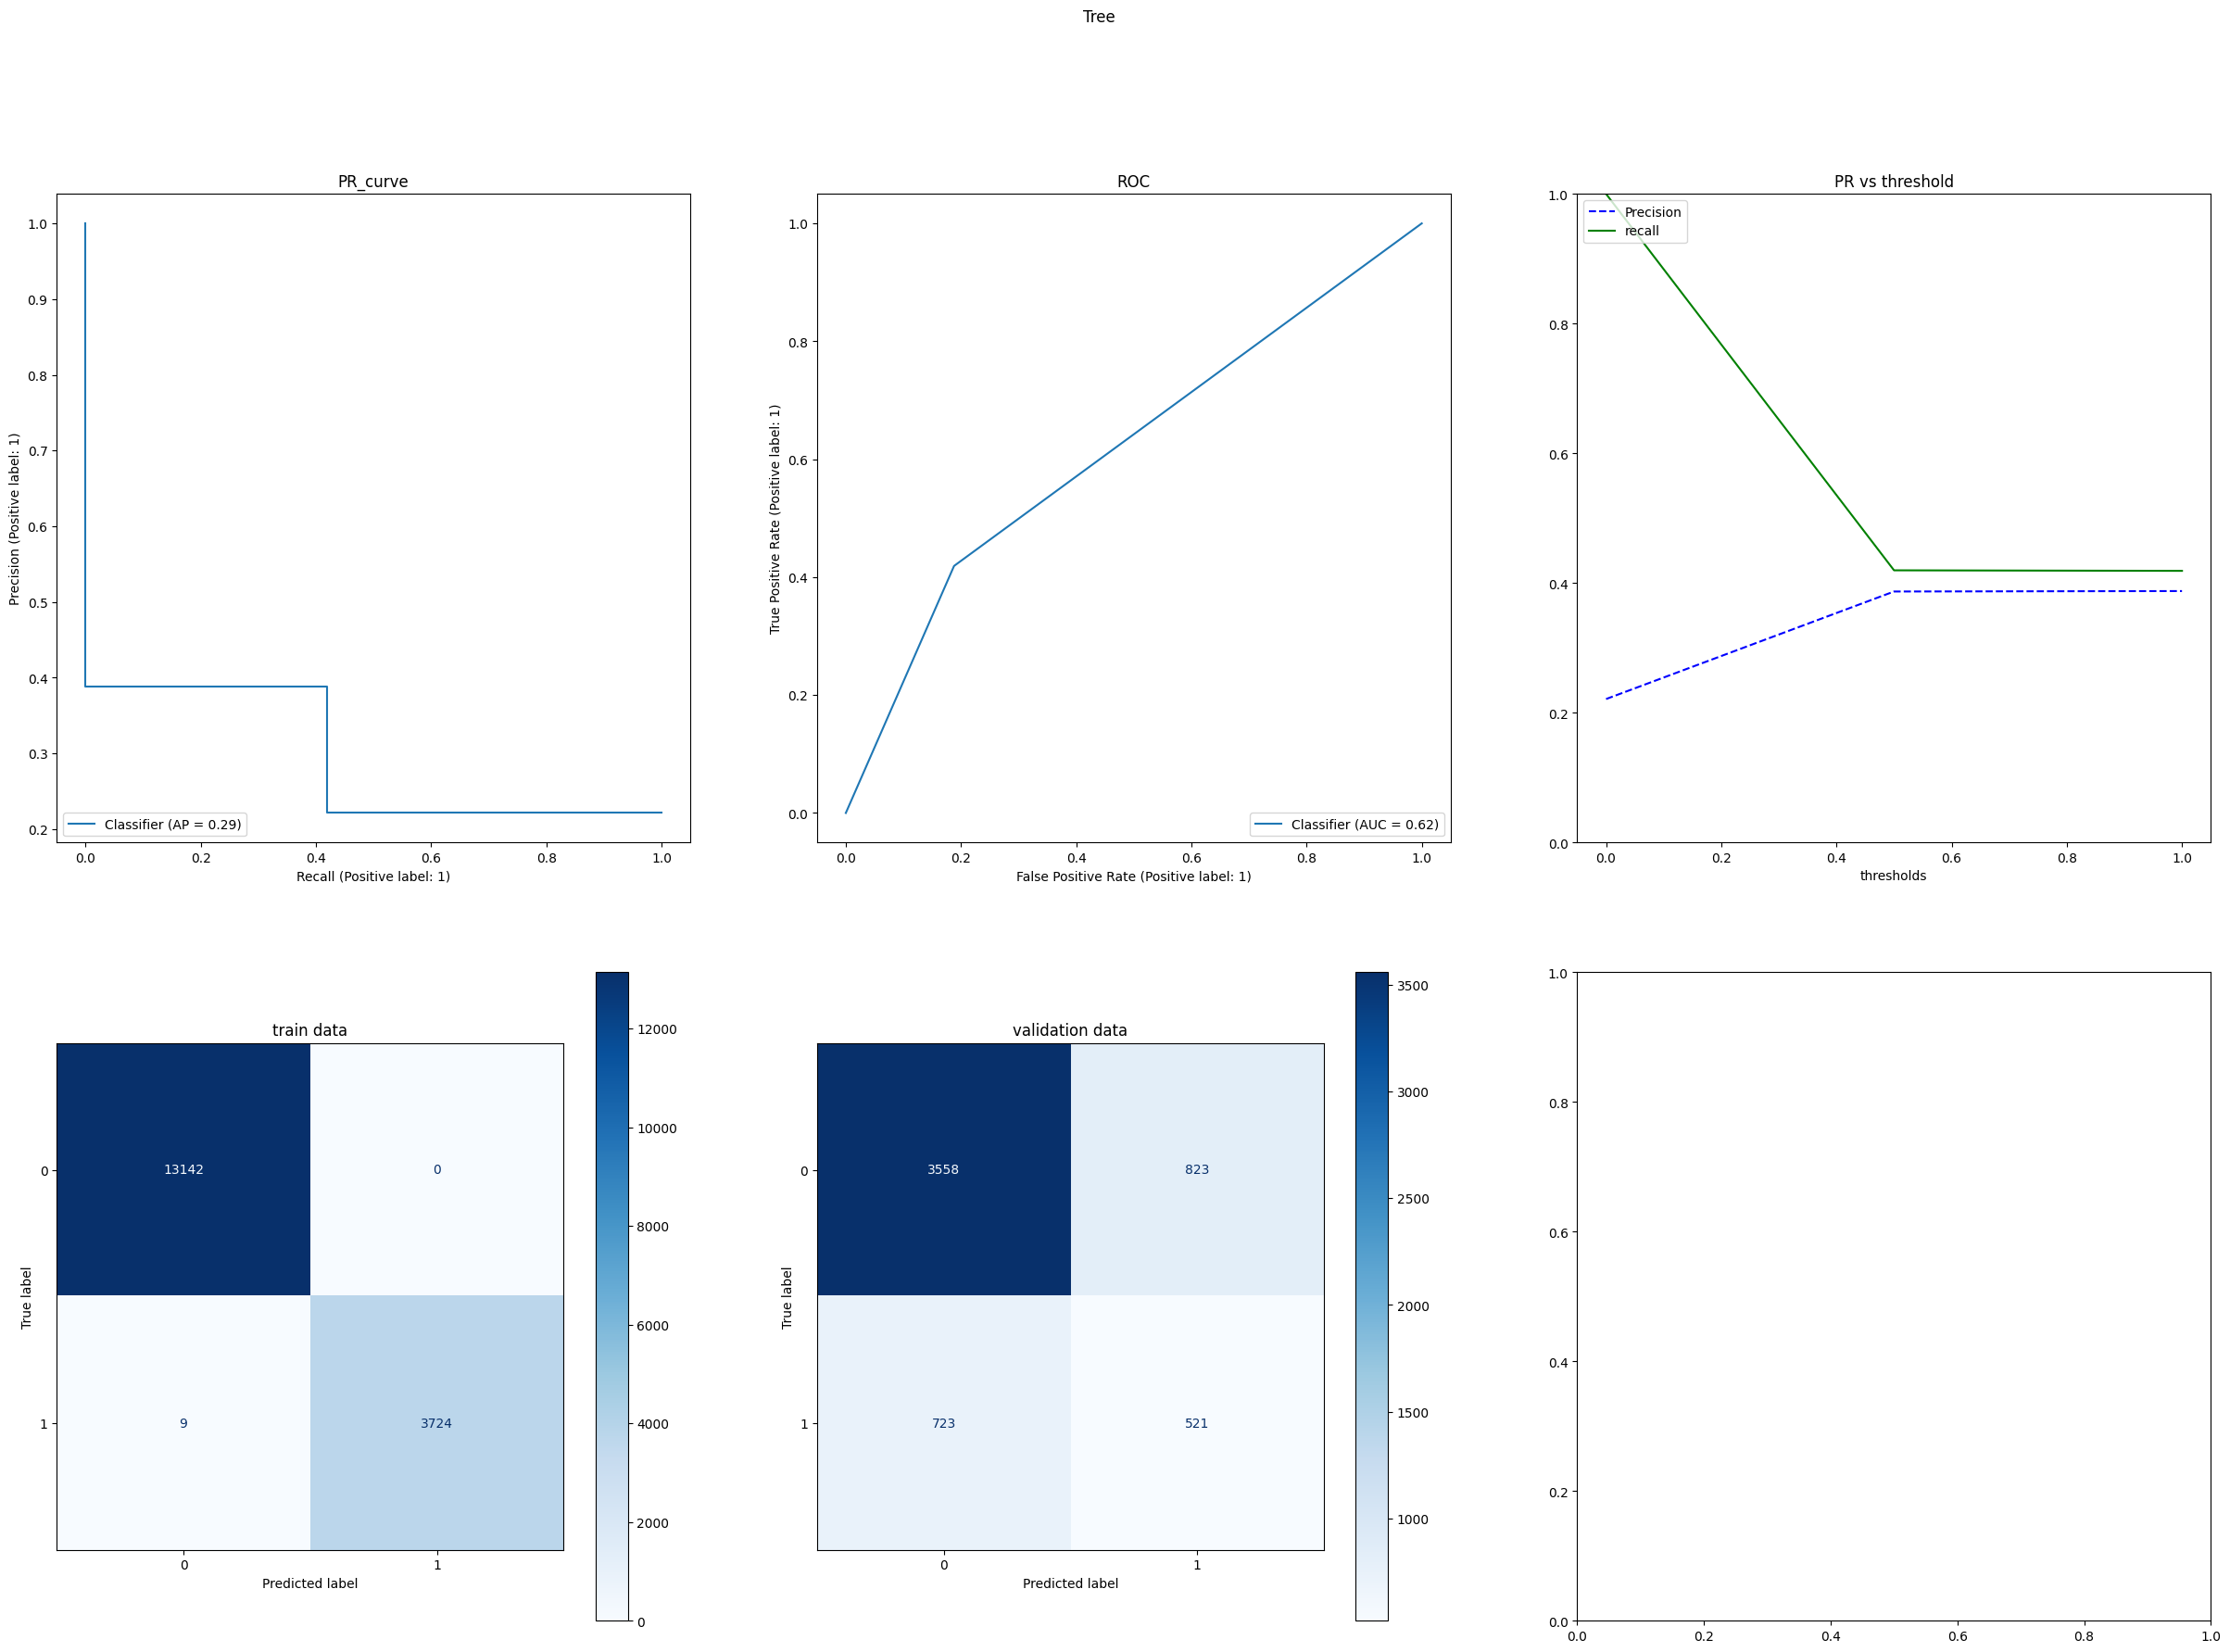

Forest
[[4153  228]
 [ 778  466]]

train scores
accuracy : 0.9994666666666666
precision : 0.999195710455764
recall : 0.998392713635146
f1_score: 0.9987940506498727

Val scores
accuracy : 0.8211555555555555
precision : 0.6714697406340058
recall : 0.3745980707395498
f1_score: 0.4809081527347781


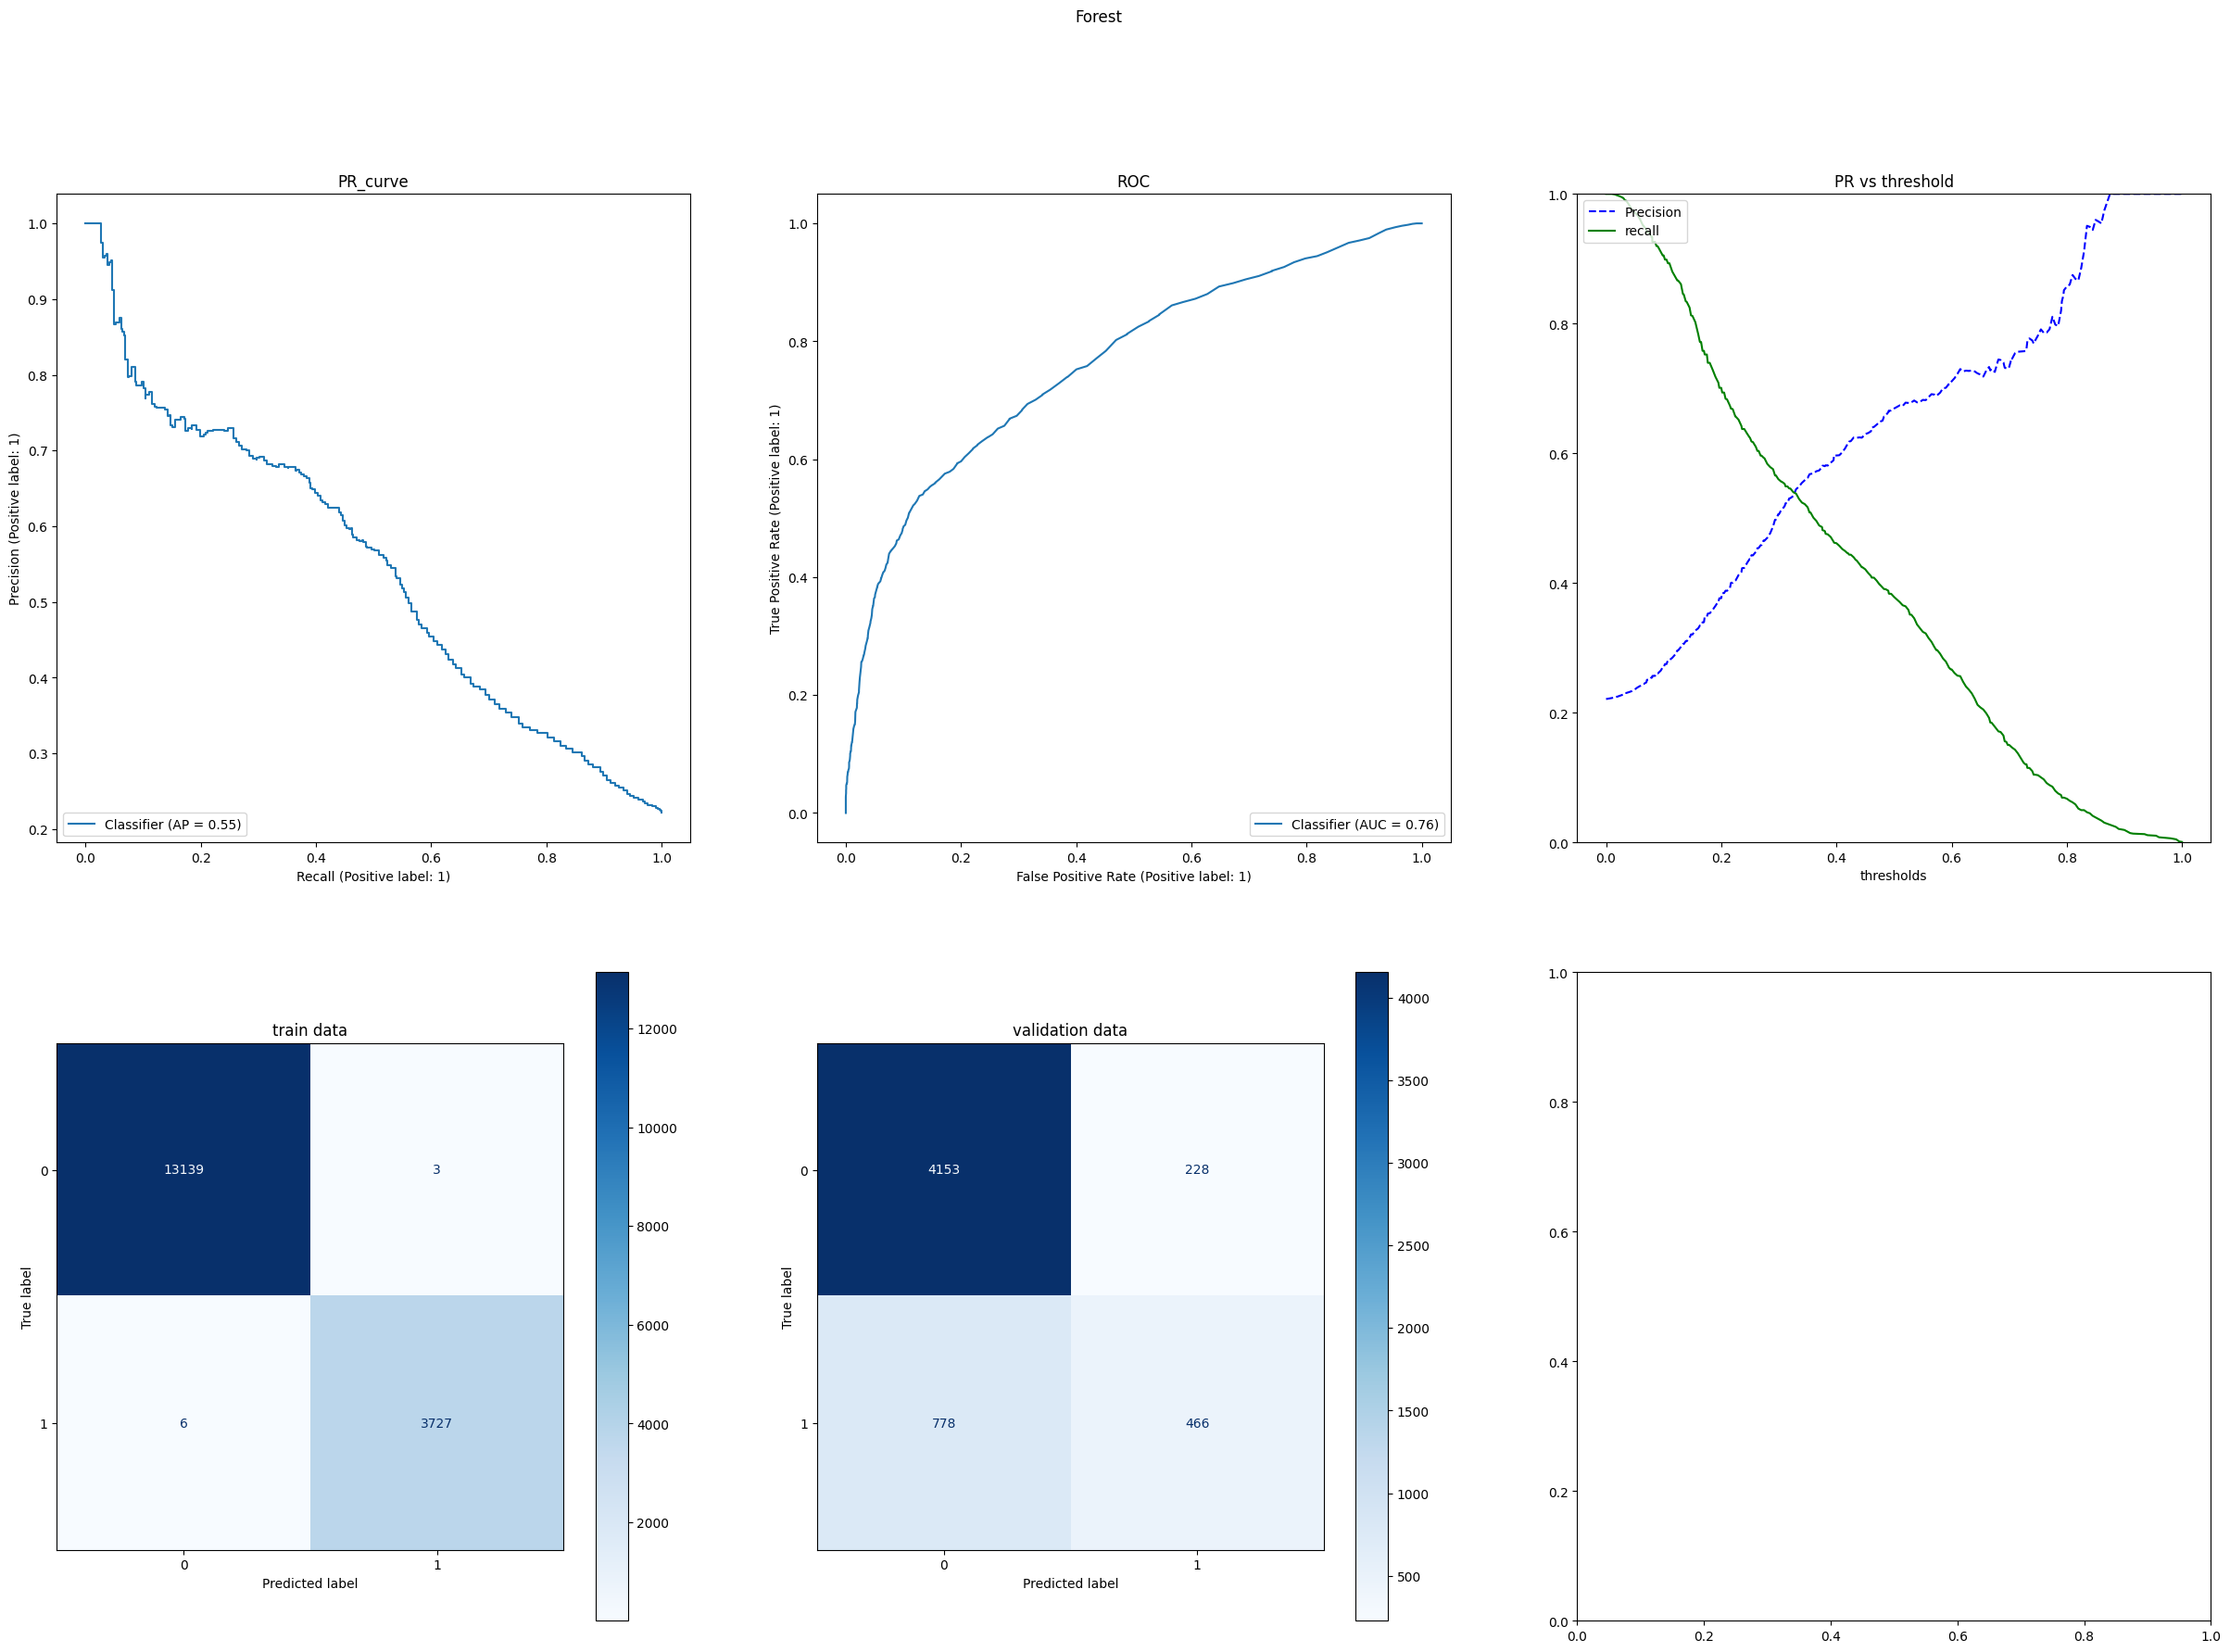

Ada
[[4191  190]
 [ 820  424]]

train scores
accuracy : 0.8199111111111111
precision : 0.6861587982832618
recall : 0.342619876774712
f1_score: 0.4570305520814722

Val scores
accuracy : 0.8204444444444444
precision : 0.6905537459283387
recall : 0.3408360128617363
f1_score: 0.45640473627556505


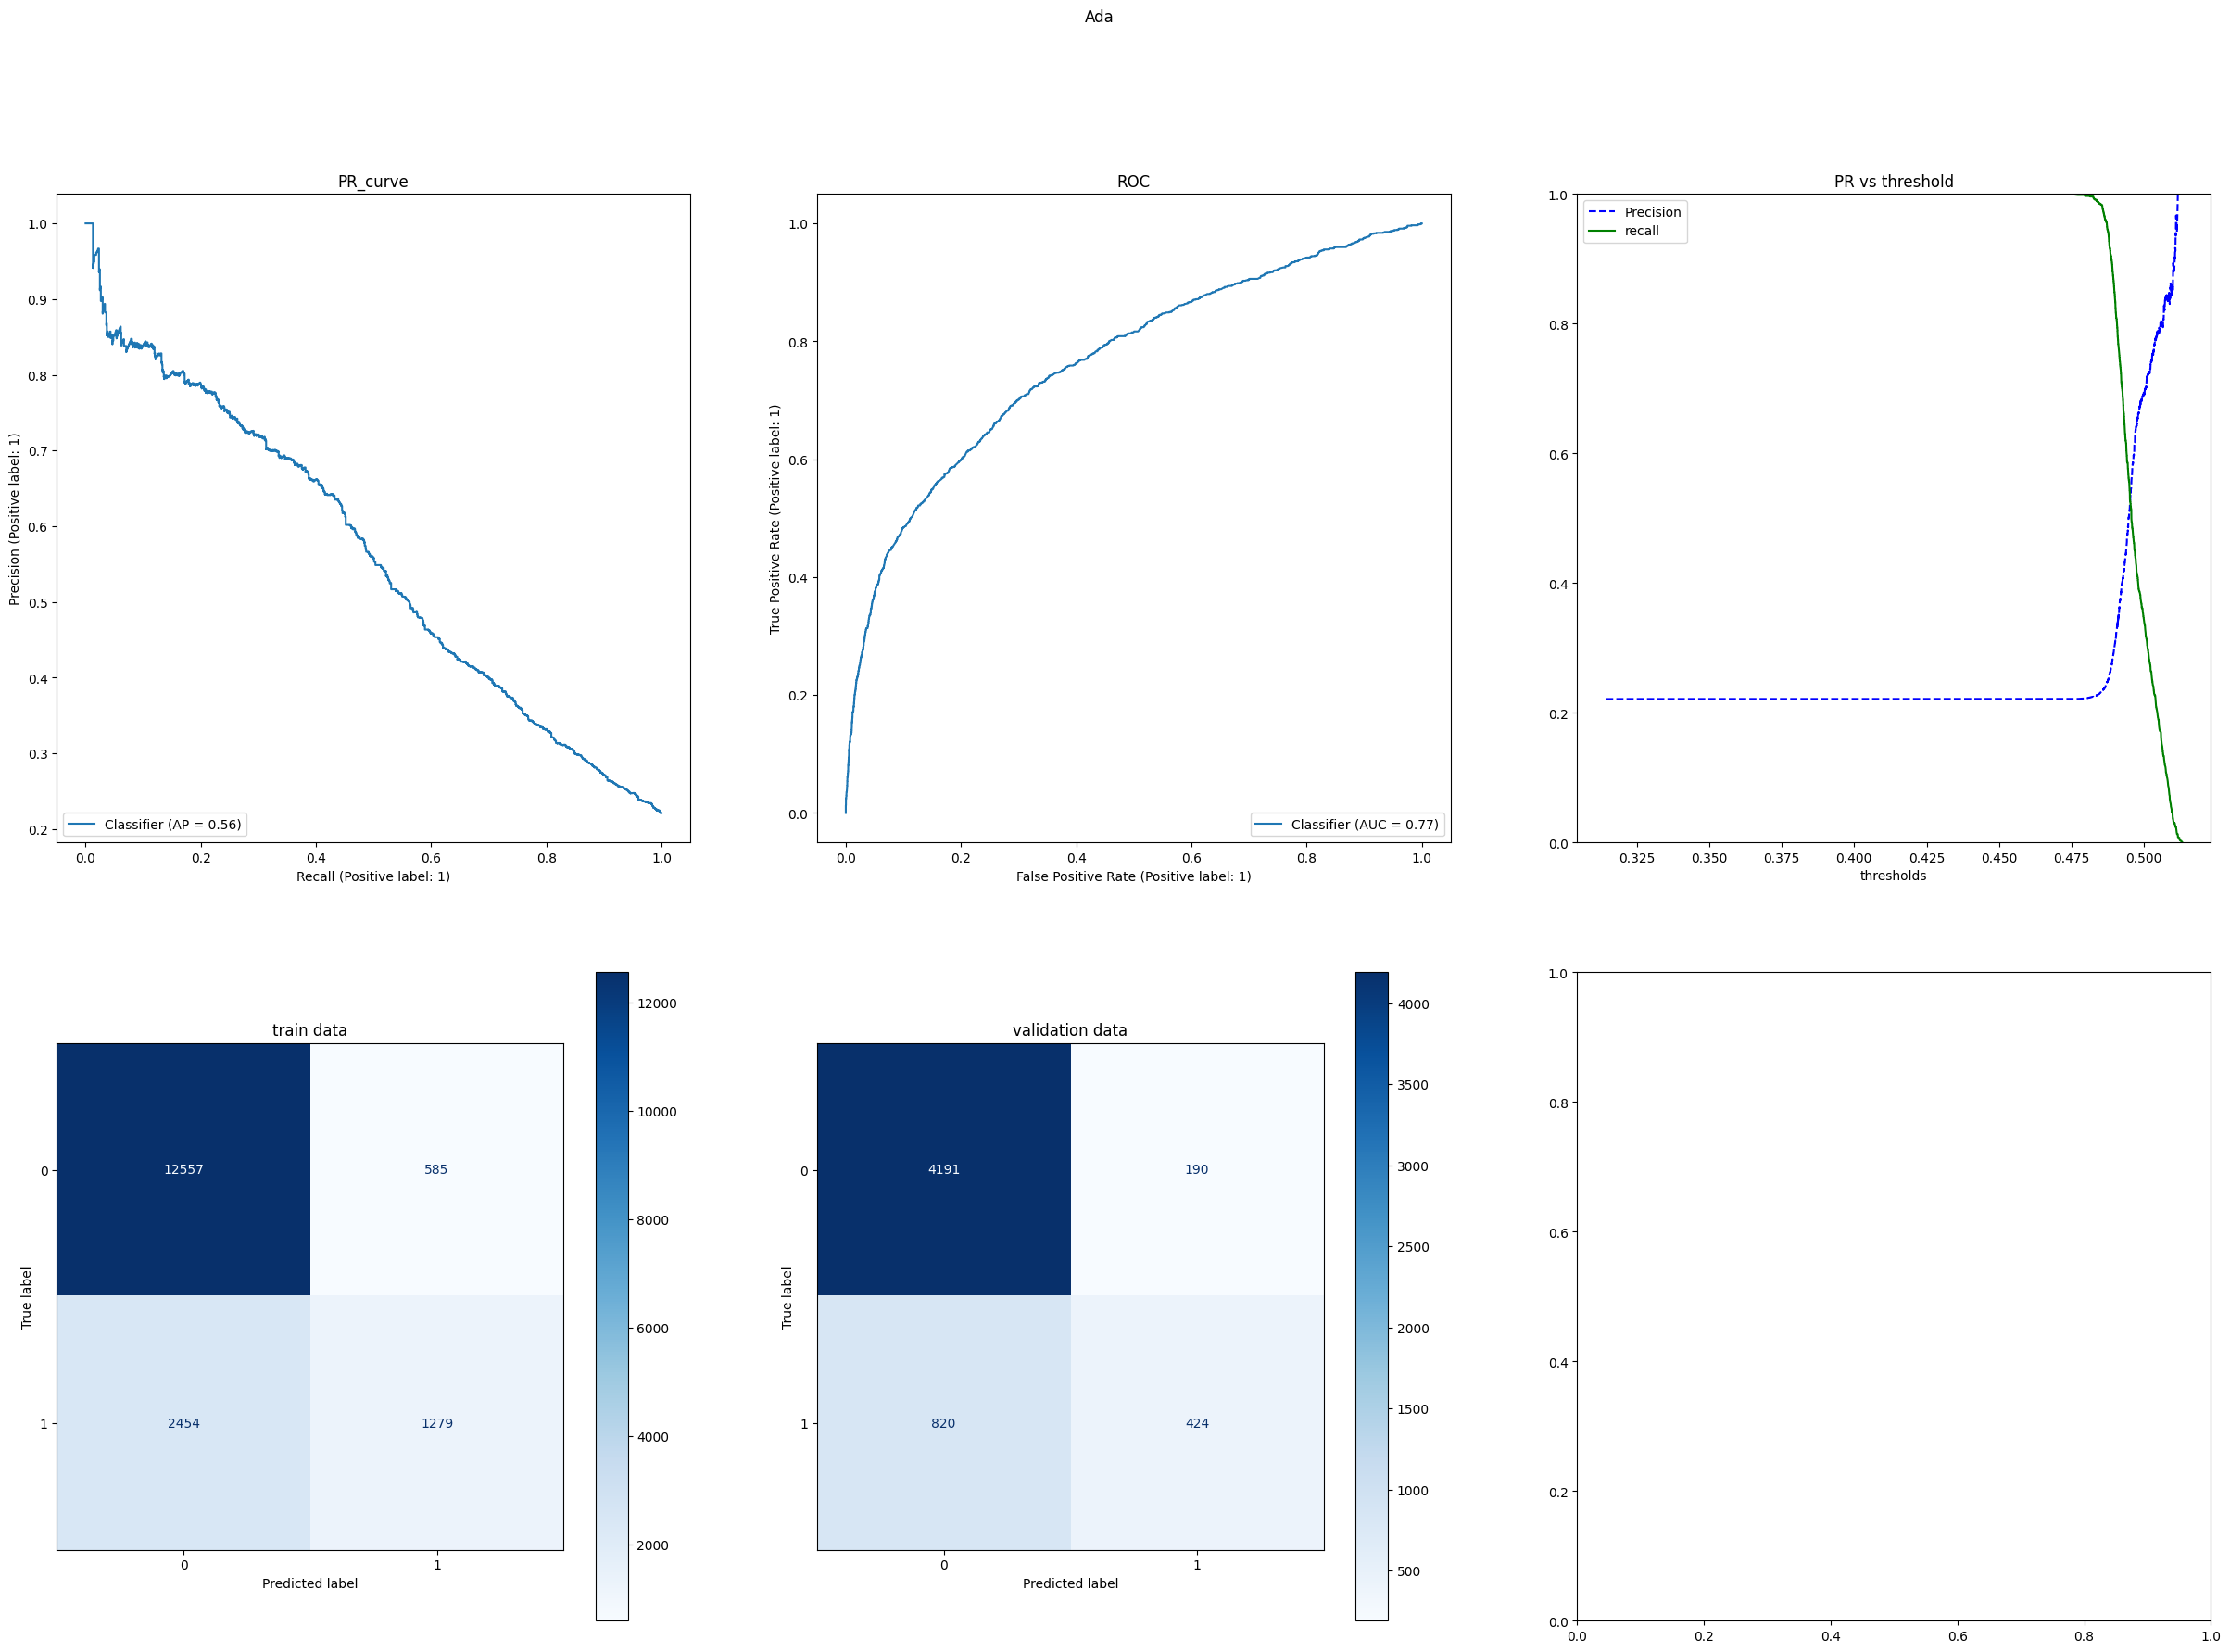

GdBoost
[[4174  207]
 [ 776  468]]

train scores
accuracy : 0.8298074074074074
precision : 0.7164404223227753
recall : 0.3817305116528261
f1_score: 0.4980775952464173

Val scores
accuracy : 0.8252444444444444
precision : 0.6933333333333334
recall : 0.3762057877813505
f1_score: 0.4877540385617509


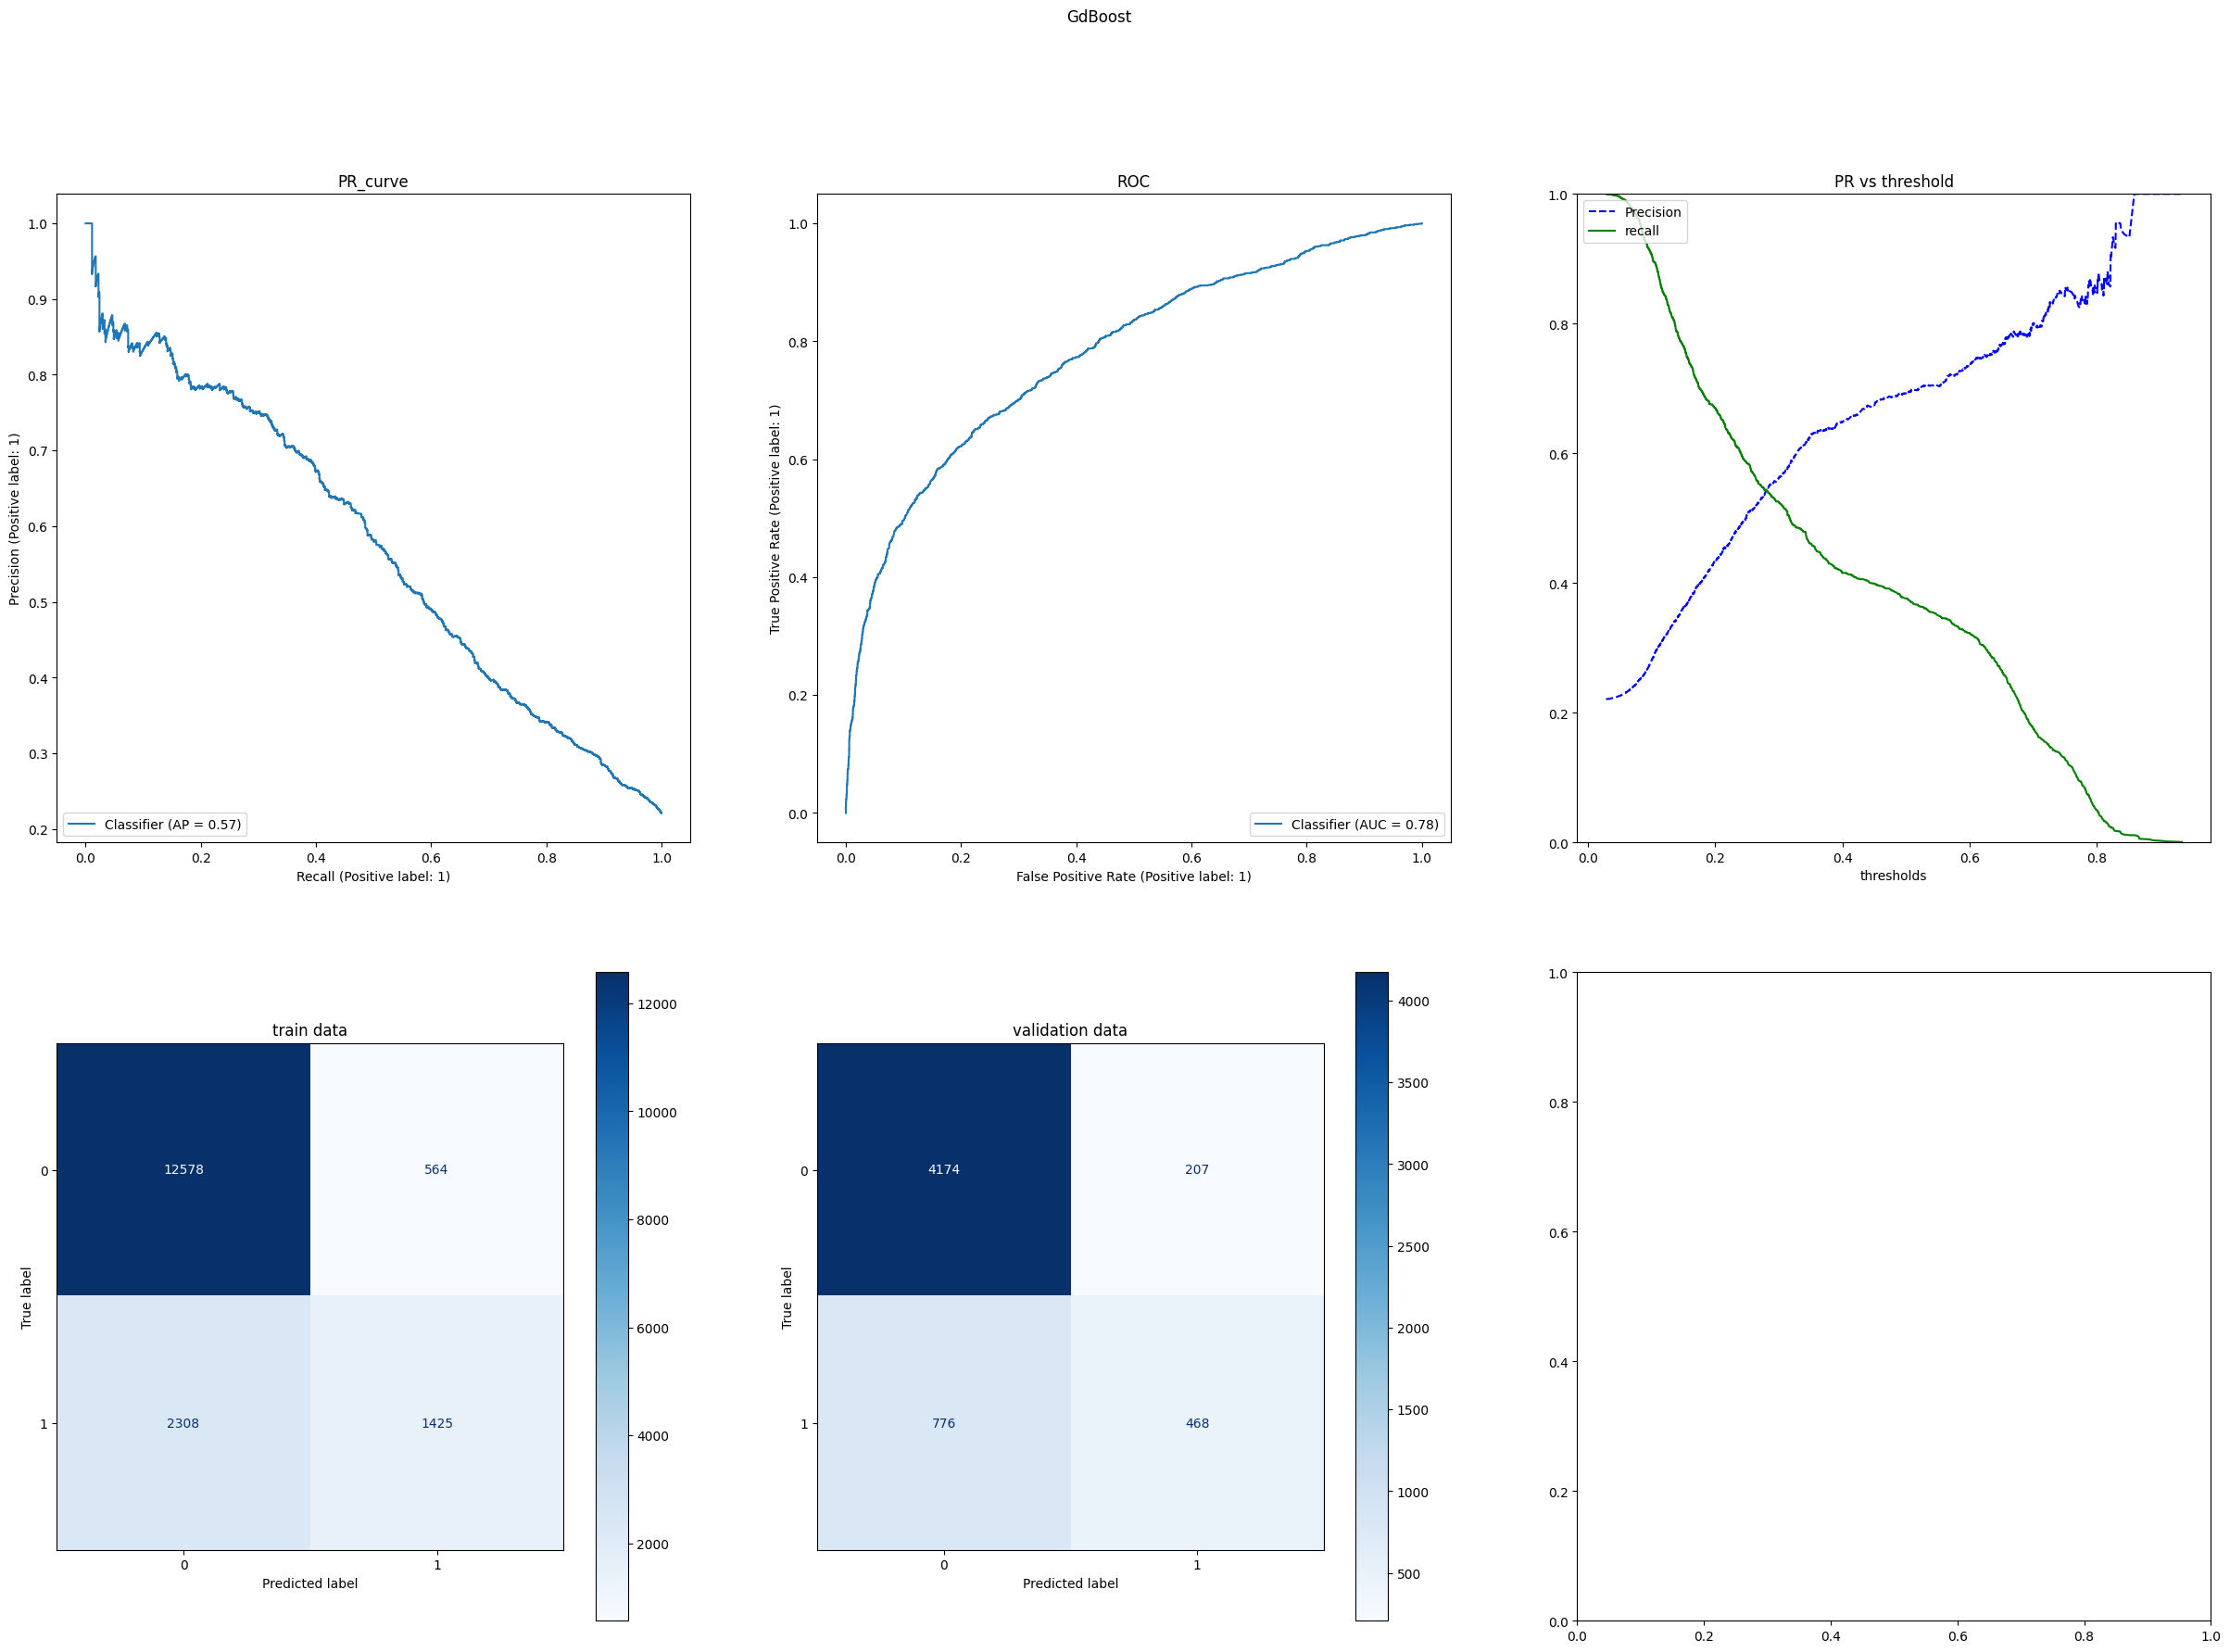

In [12]:
case_name ='raw,non_regul'
print(case_name)

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [13]:
case_name = 't_series,reg'
print(case_name)


t_series,reg


Tree
[[4167  214]
 [ 786  458]]

train scores
accuracy : 0.8224592592592592
precision : 0.6805487506124449
recall : 0.3720867934637021
f1_score: 0.4811222722549359

Val scores
accuracy : 0.8222222222222222
precision : 0.6815476190476191
recall : 0.36816720257234725
f1_score: 0.47807933194154484


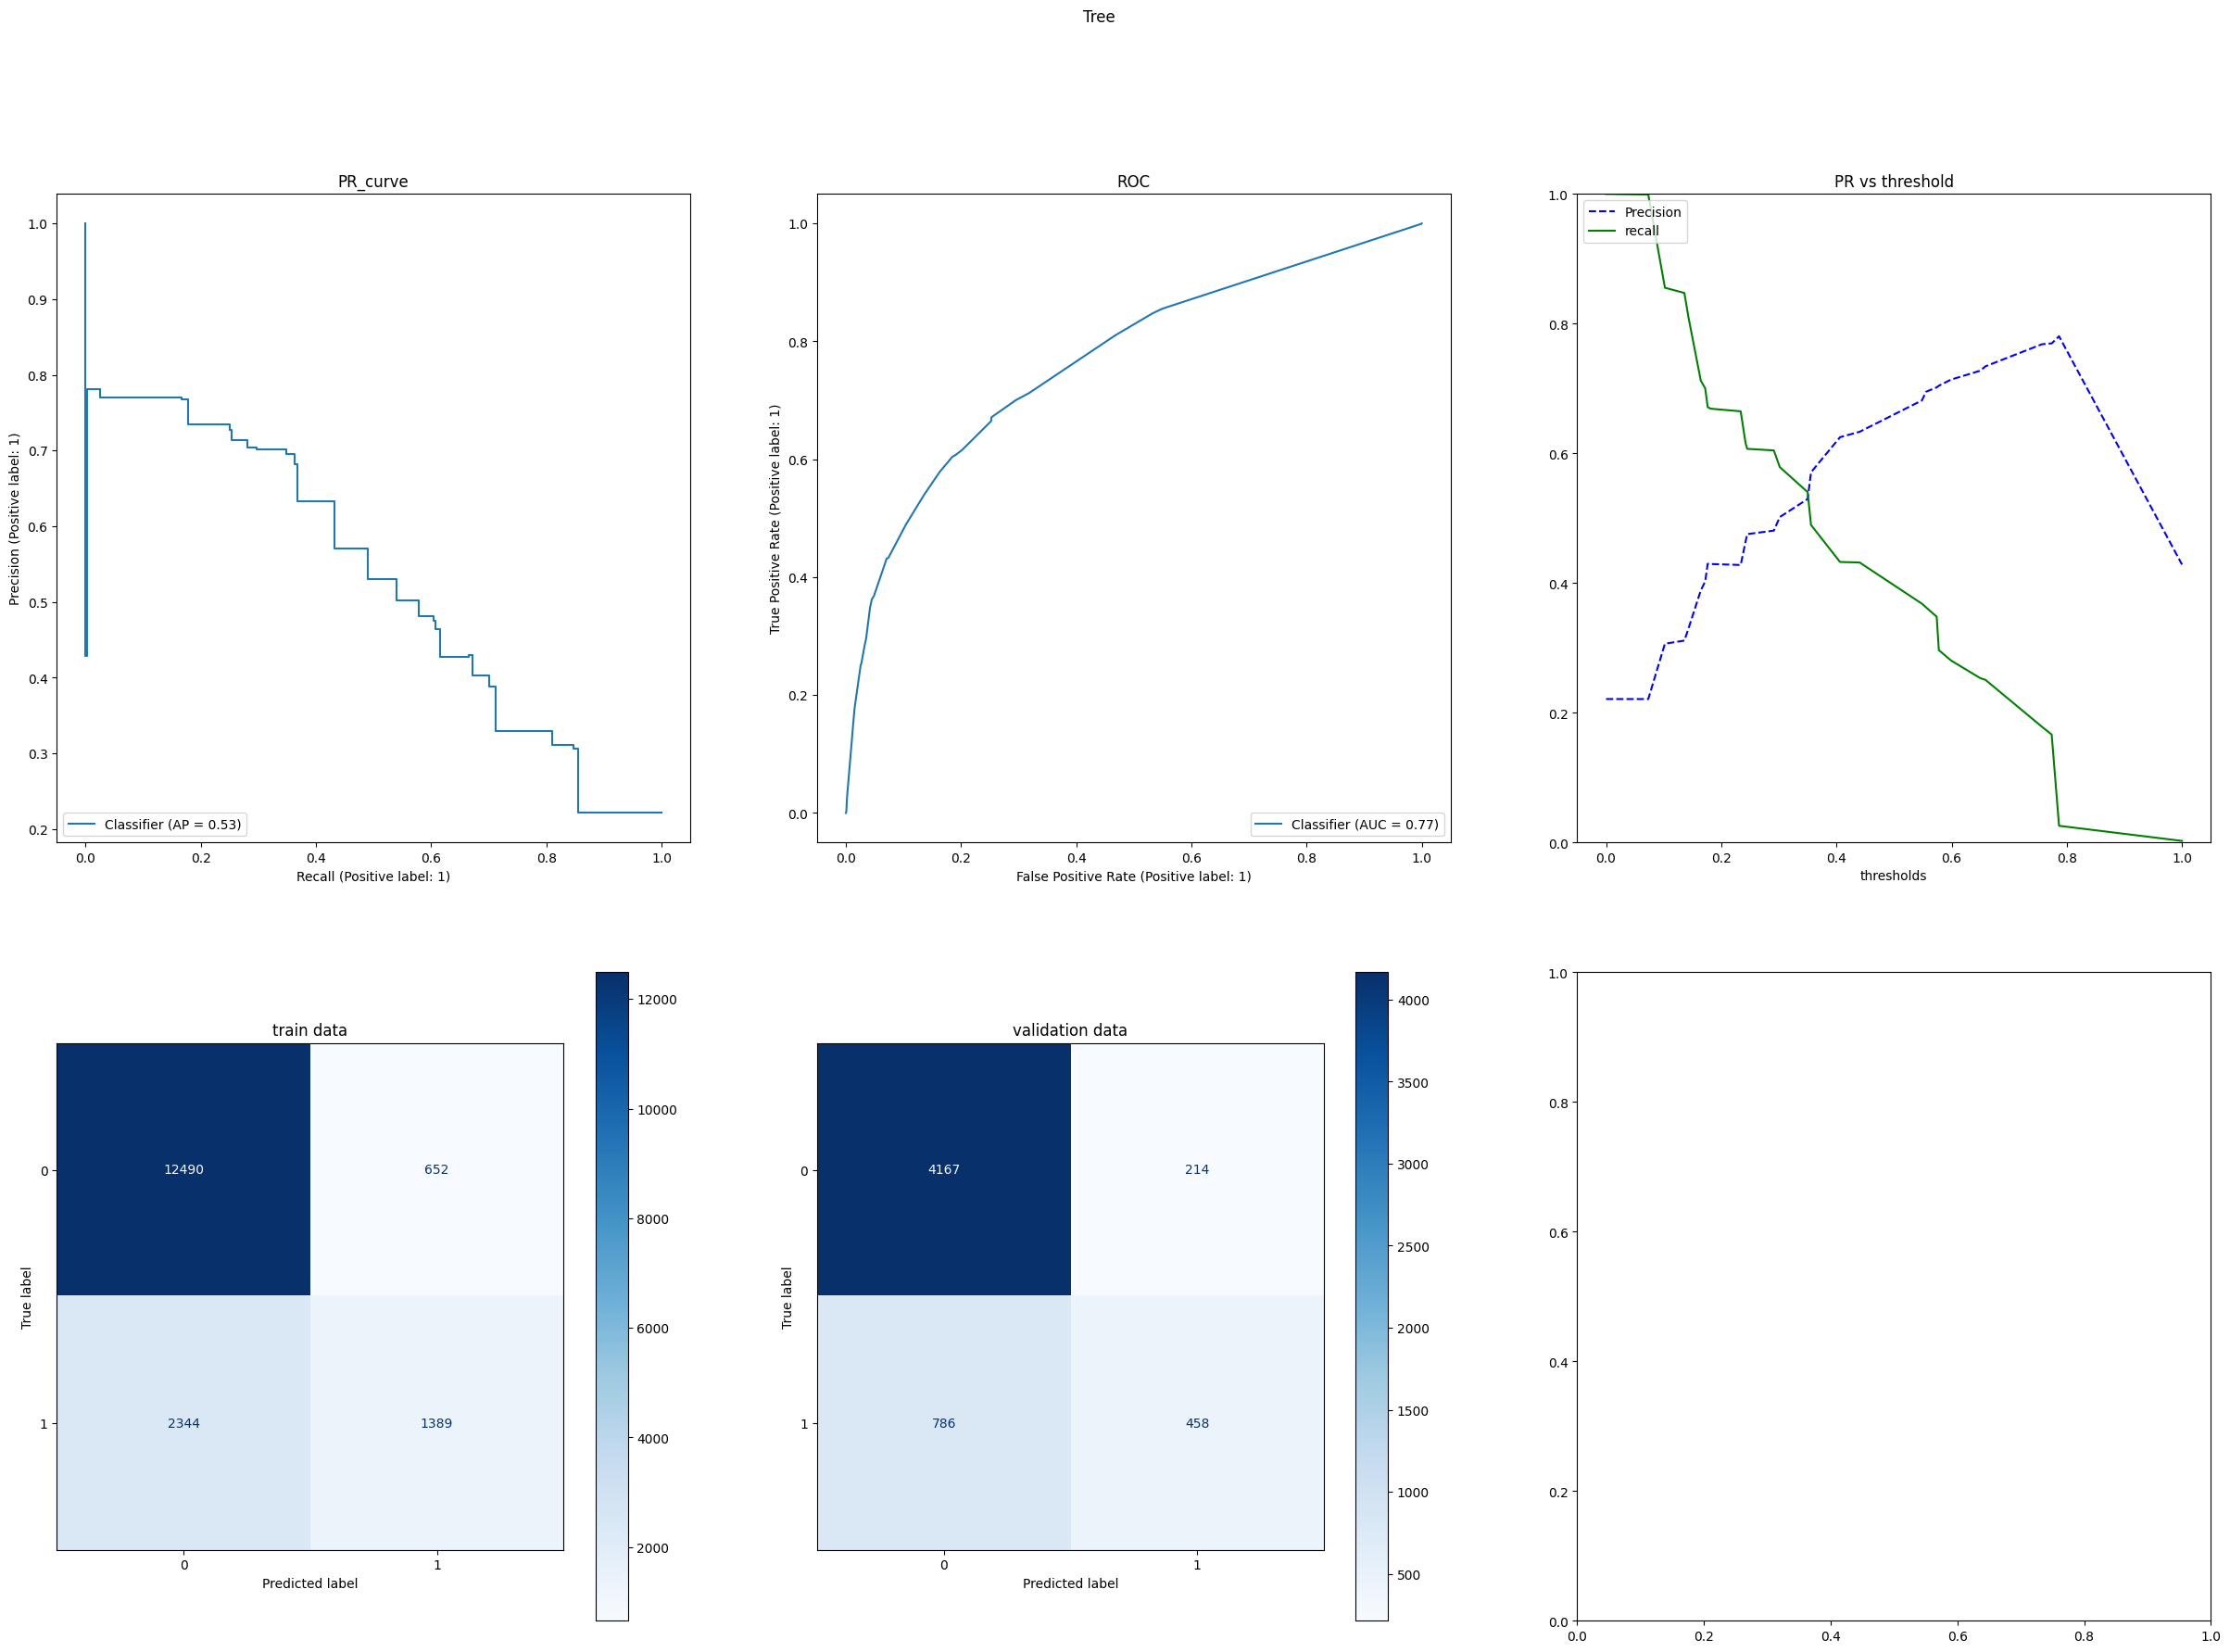

Forest
[[4220  161]
 [ 920  324]]

train scores
accuracy : 0.8111407407407407
precision : 0.6952789699570815
recall : 0.2603803911063488
f1_score: 0.3788735139349055

Val scores
accuracy : 0.8078222222222222
precision : 0.668041237113402
recall : 0.2604501607717042
f1_score: 0.37478311162521694


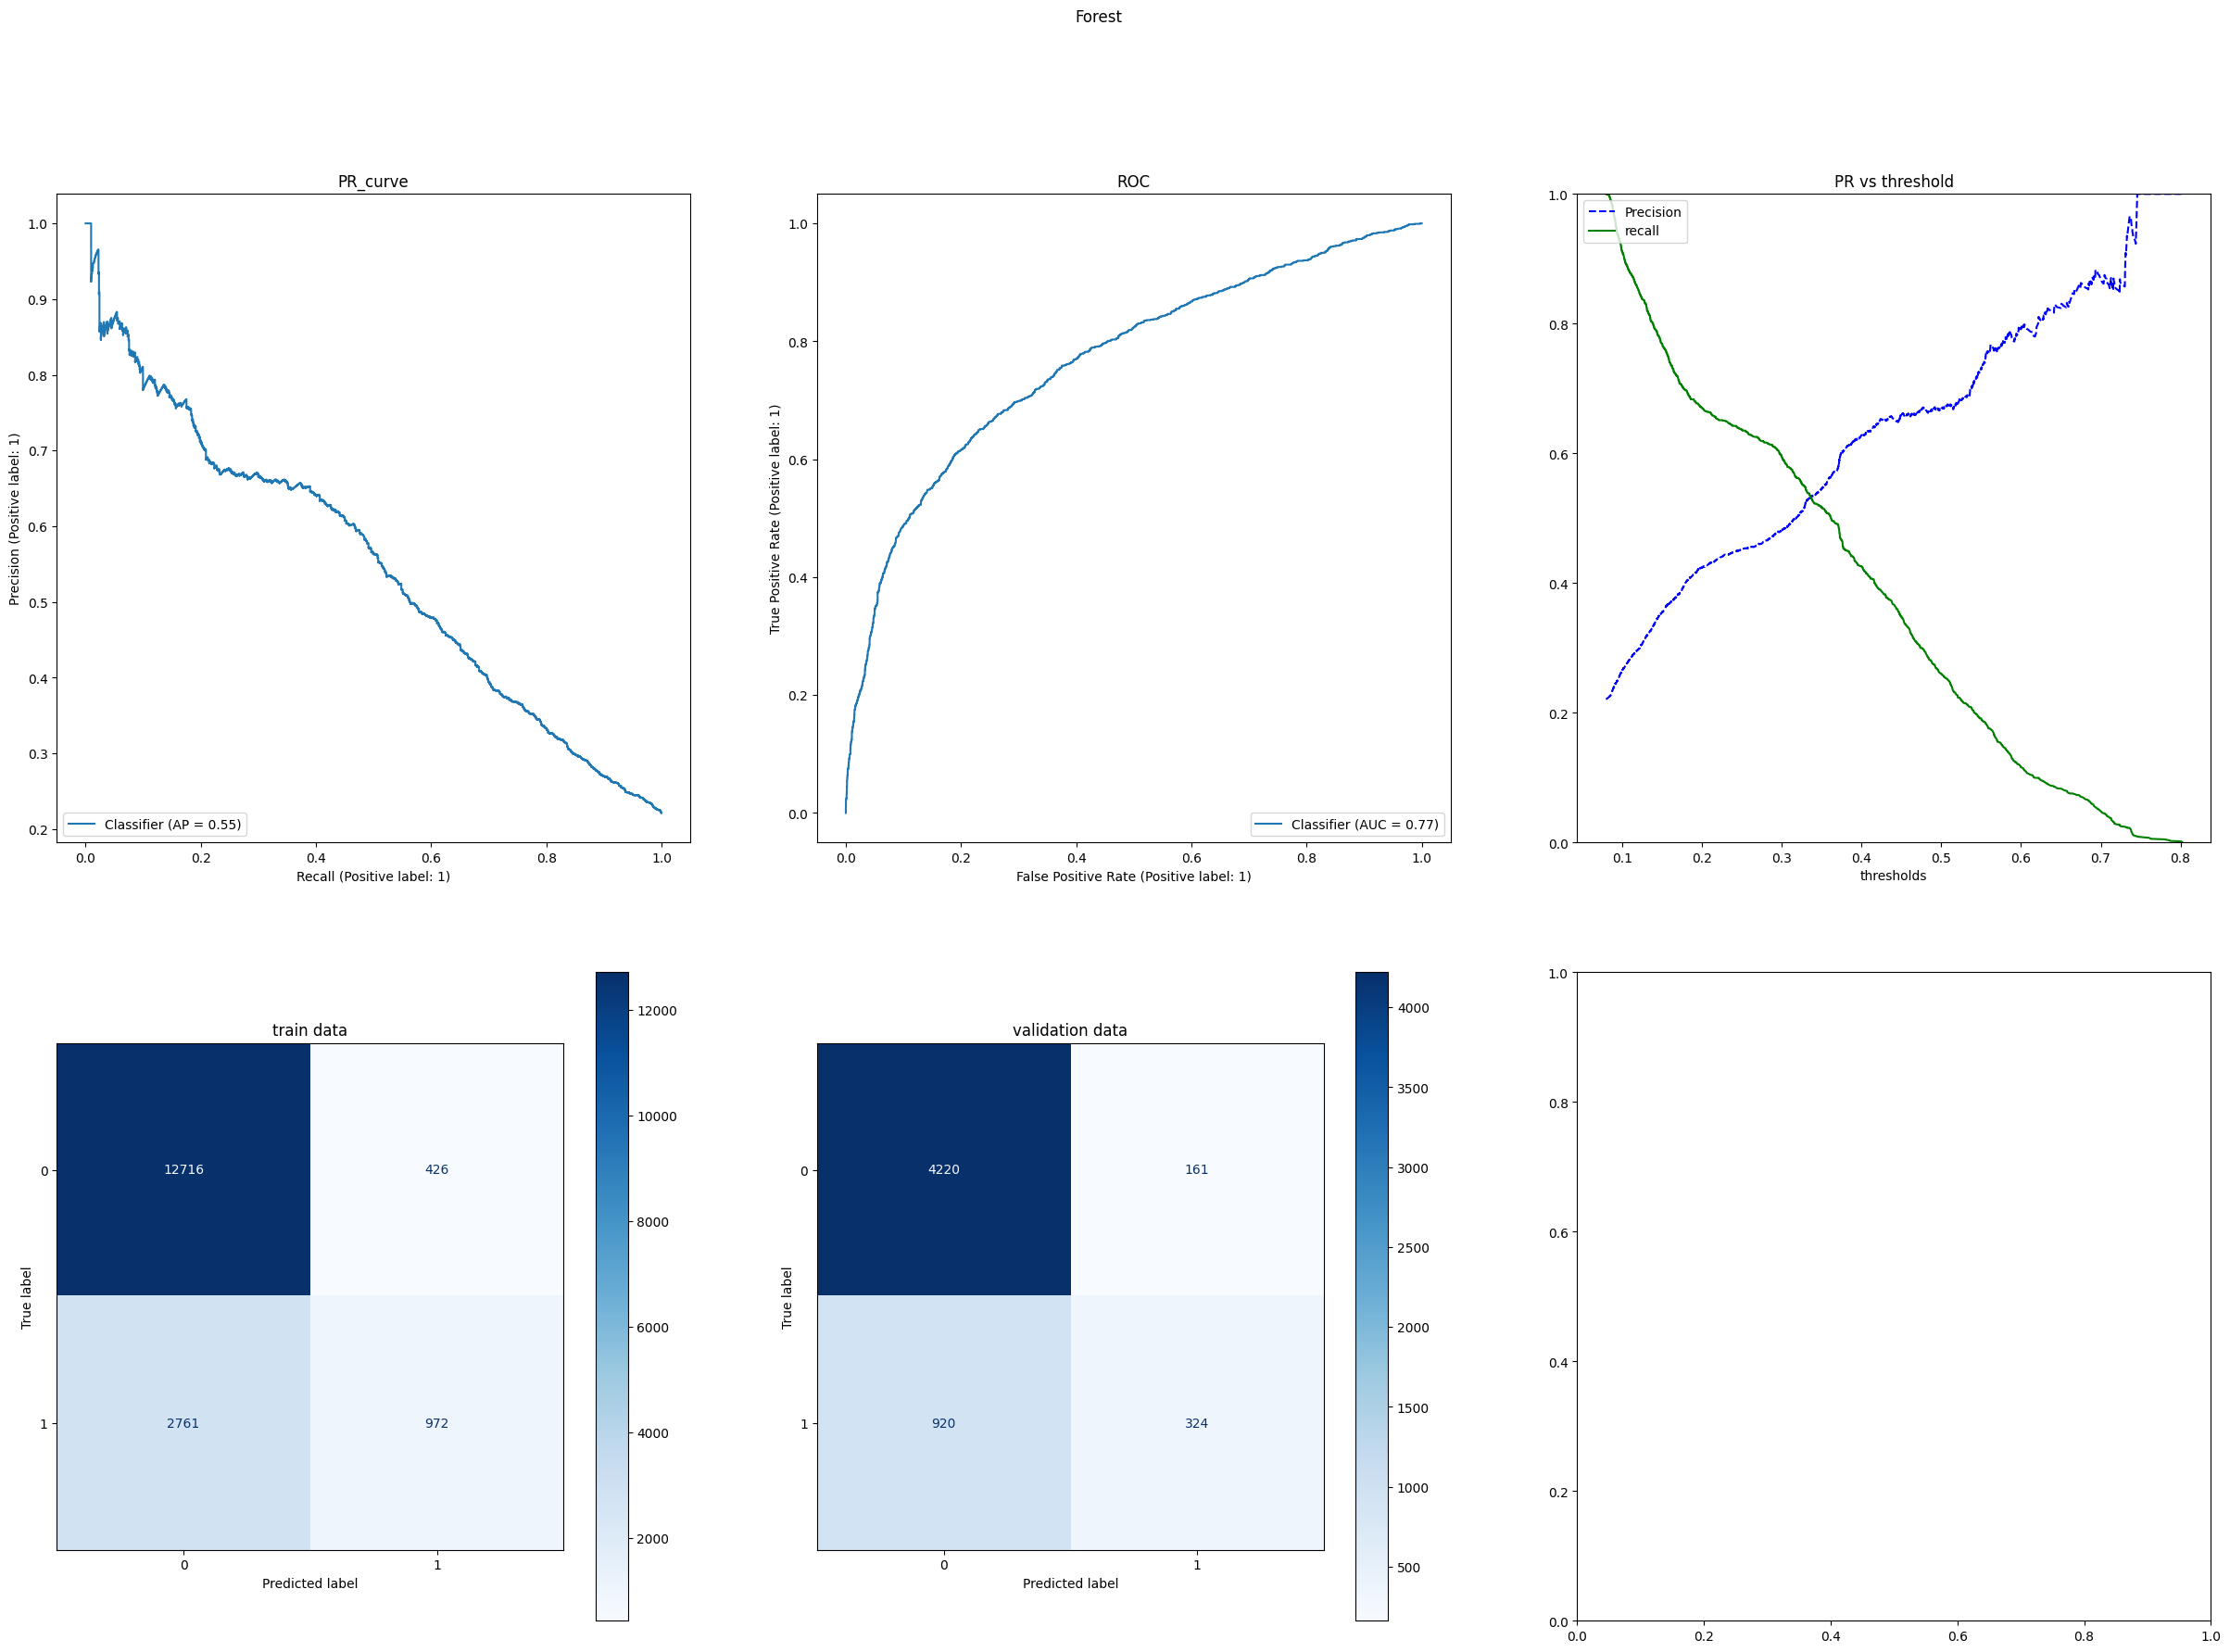

Ada
[[4215  166]
 [ 915  329]]

train scores
accuracy : 0.8083555555555556
precision : 0.6662225183211192
recall : 0.2678810608090008
f1_score: 0.38211692777990064

Val scores
accuracy : 0.8078222222222222
precision : 0.6646464646464646
recall : 0.2644694533762058
f1_score: 0.3783783783783784


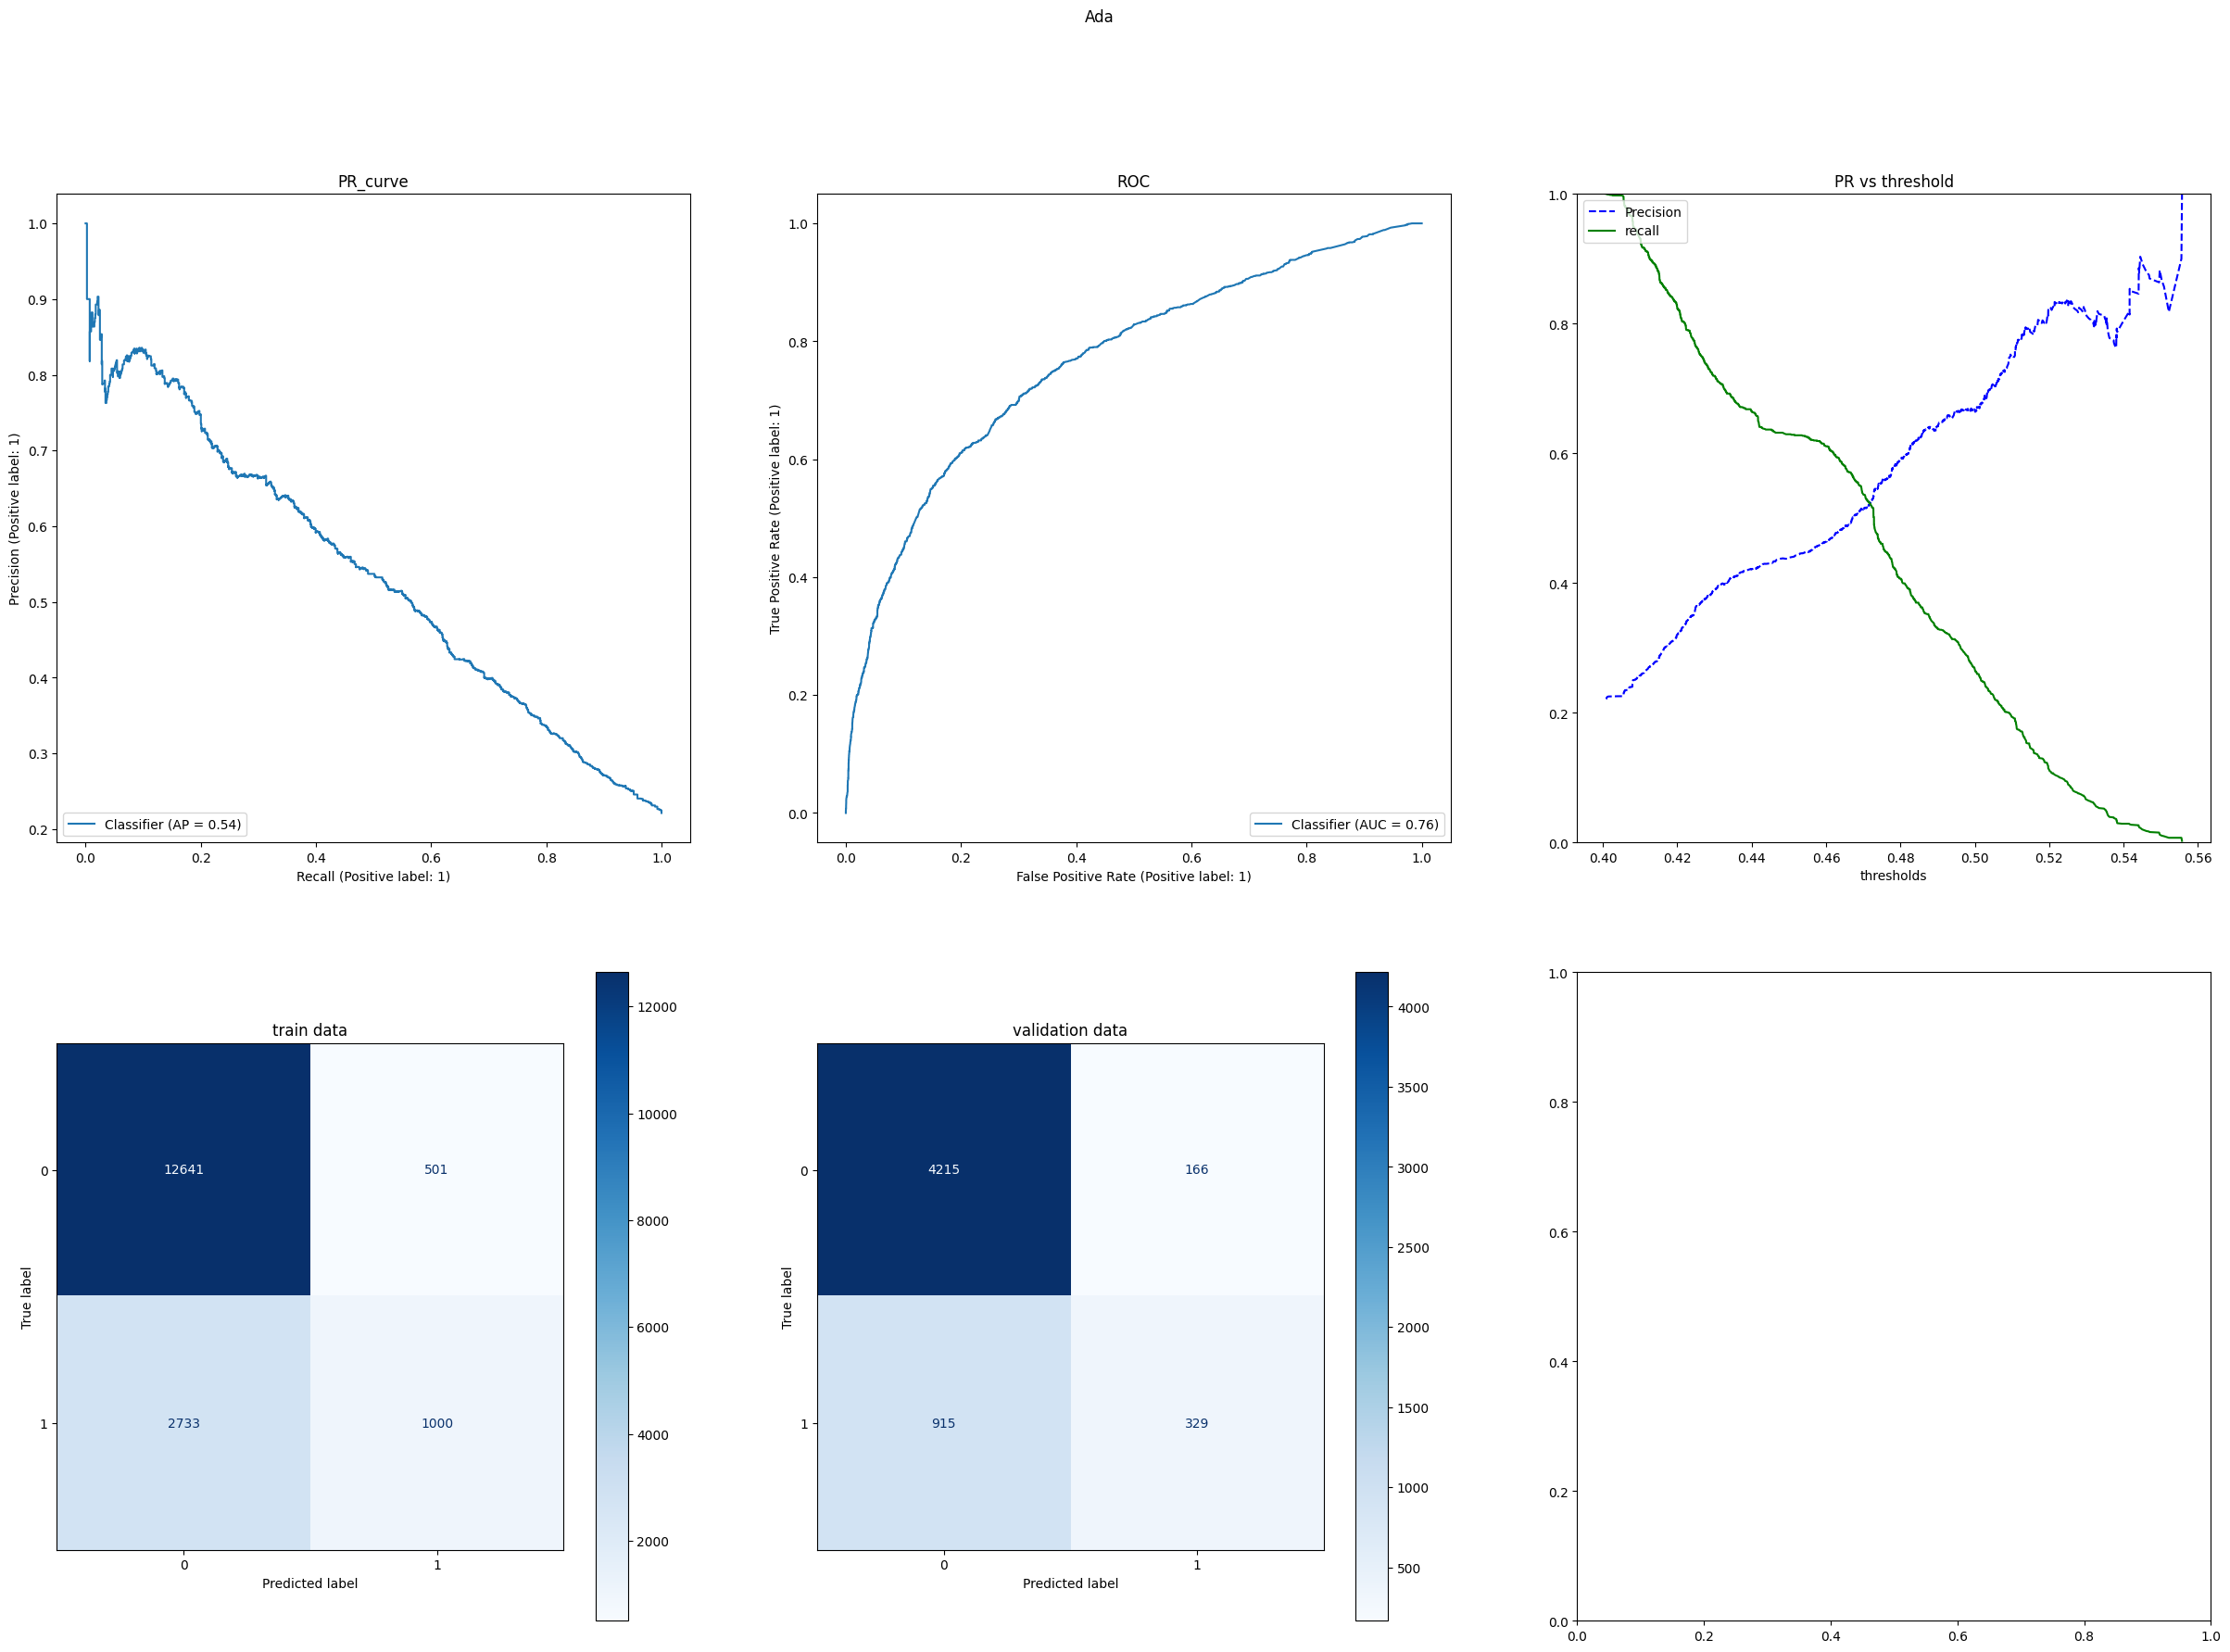

GdBoost
[[4245  136]
 [ 938  306]]

train scores
accuracy : 0.8085333333333333
precision : 0.6881559220389805
recall : 0.24591481382266273
f1_score: 0.3623445825932504

Val scores
accuracy : 0.8090666666666667
precision : 0.6923076923076923
recall : 0.2459807073954984
f1_score: 0.3629893238434164


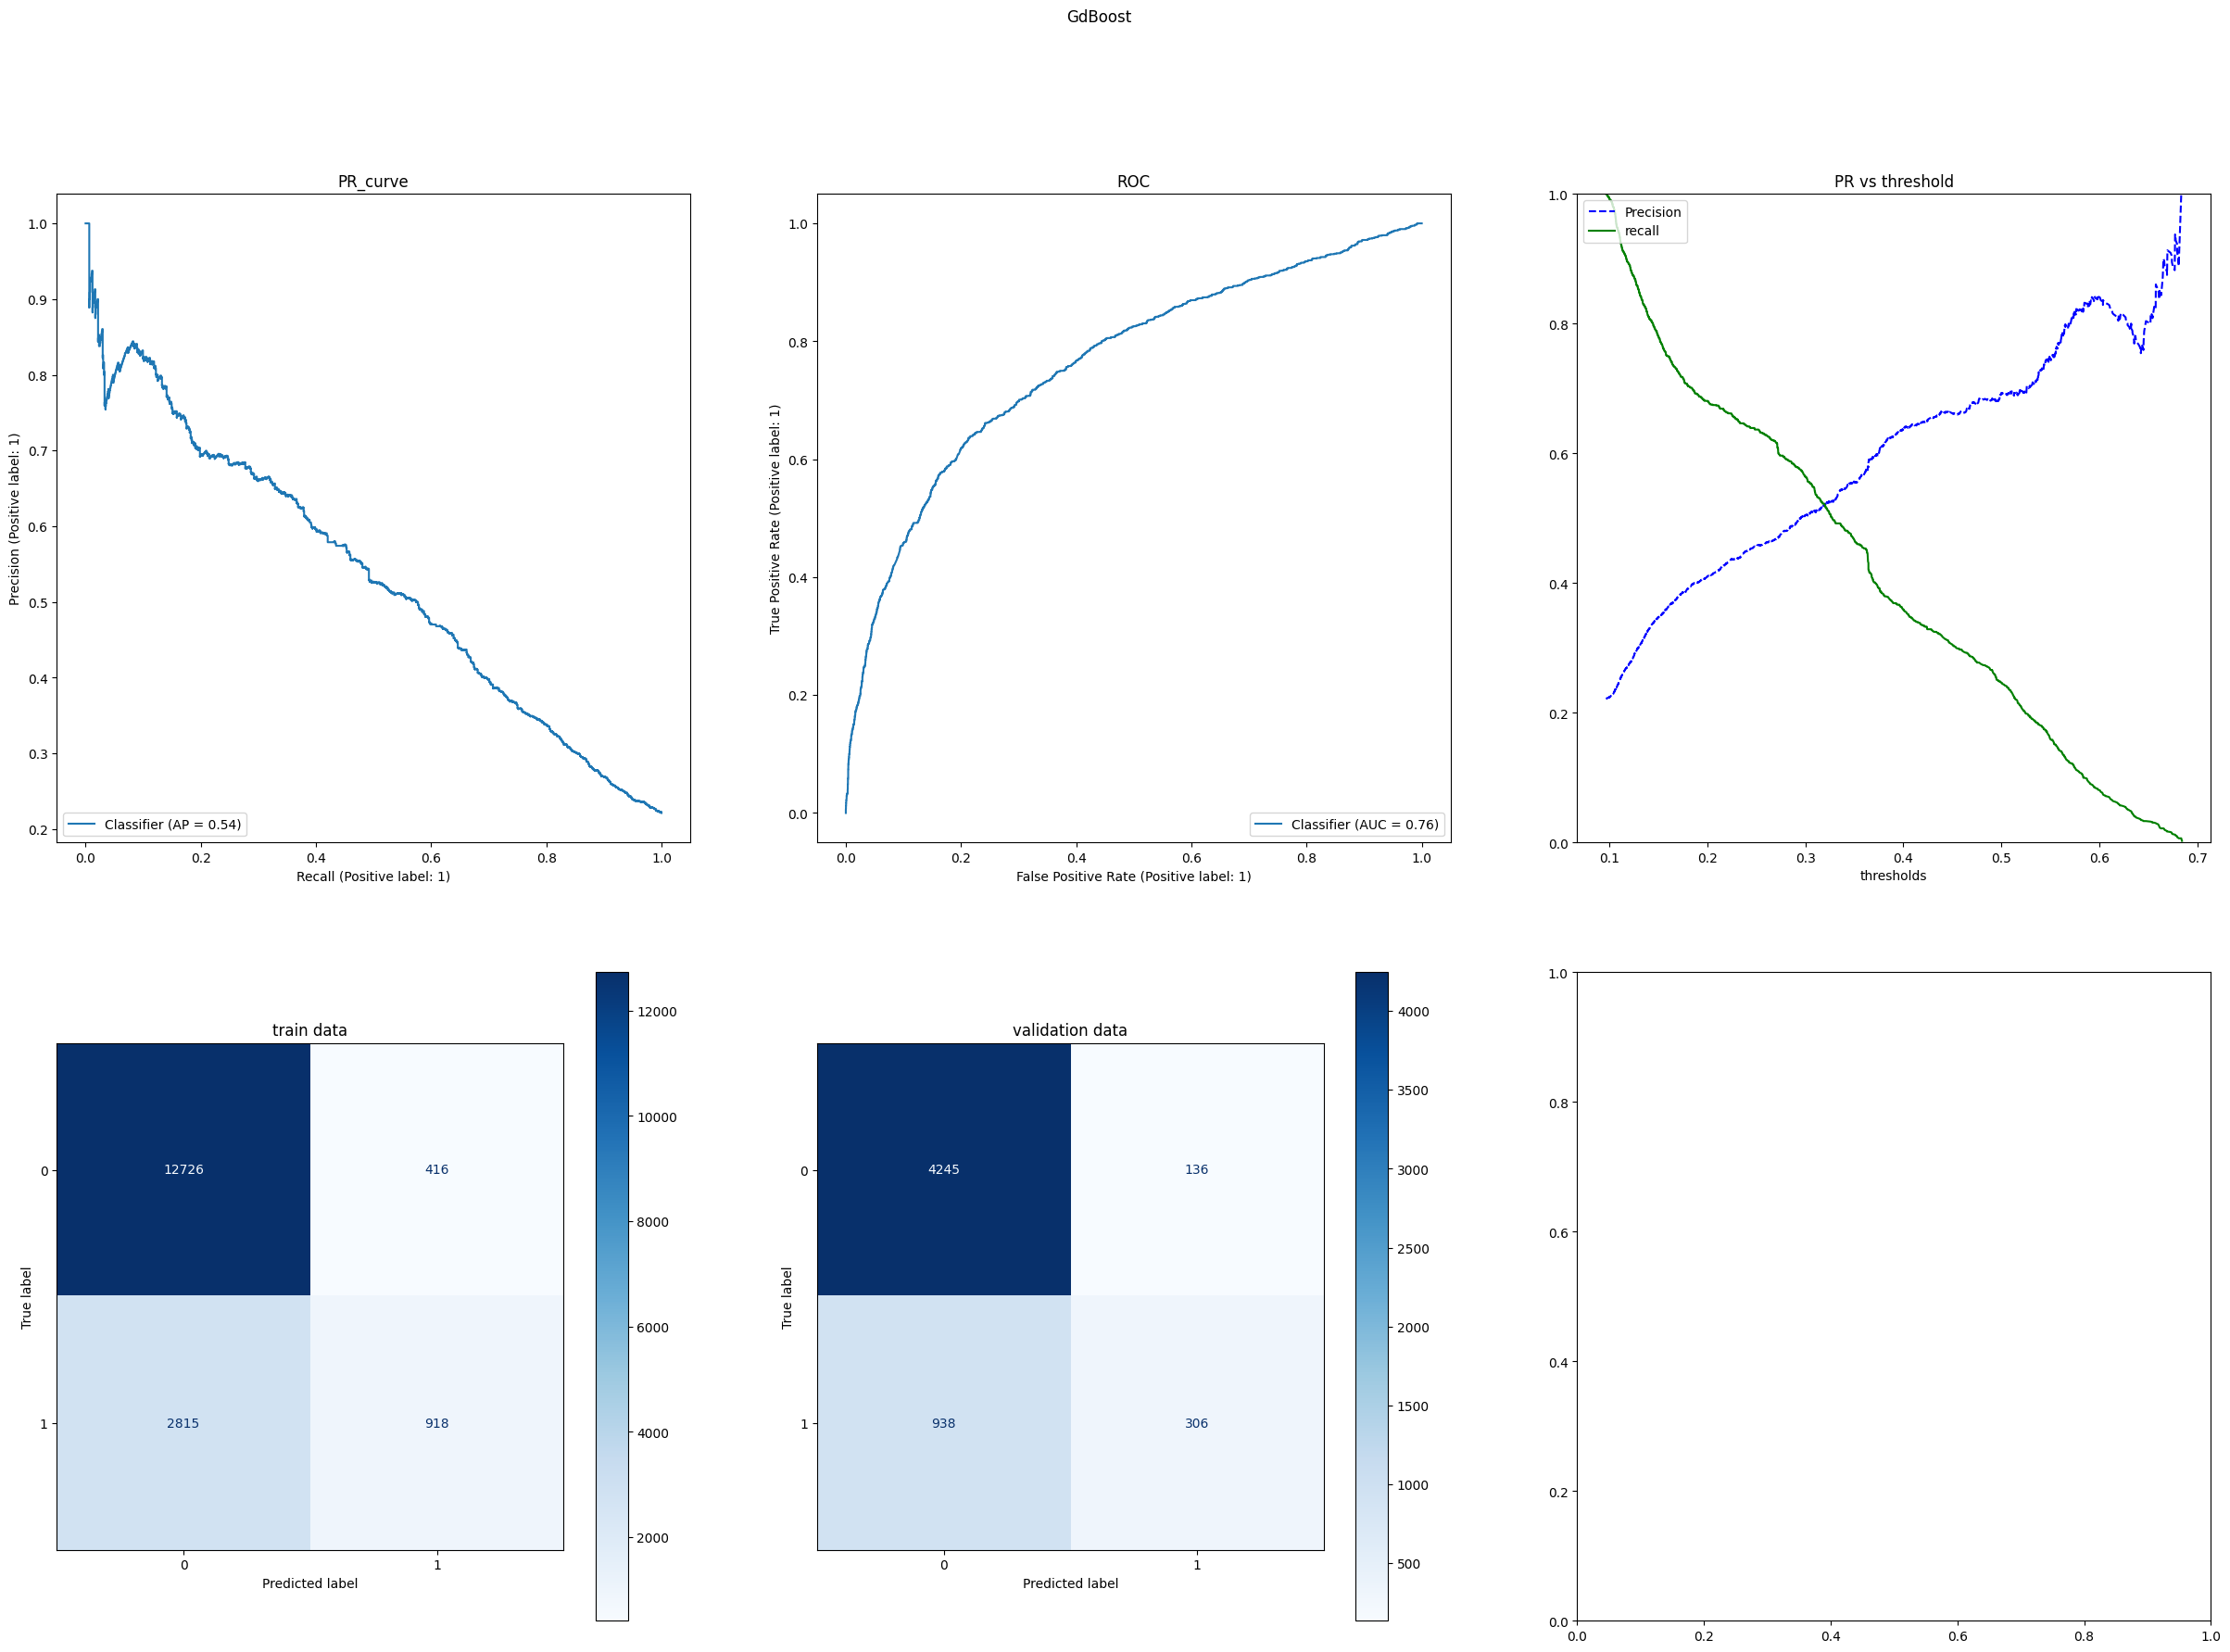

In [14]:

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(max_depth=5,
                            random_state=42),
    RandomForestClassifier(n_estimators=500,
                            max_depth=5,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=600,
                        learning_rate=0.01,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=600,
                                learning_rate=0.005,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [15]:
case_name ='raw,reg'

print(case_name)

raw,reg


Tree
[[4190  191]
 [ 803  441]]

train scores
accuracy : 0.8261925925925926
precision : 0.7049180327868853
recall : 0.3686043396731851
f1_score: 0.48408091468777487

Val scores
accuracy : 0.8232888888888888
precision : 0.6977848101265823
recall : 0.3545016077170418
f1_score: 0.47014925373134325


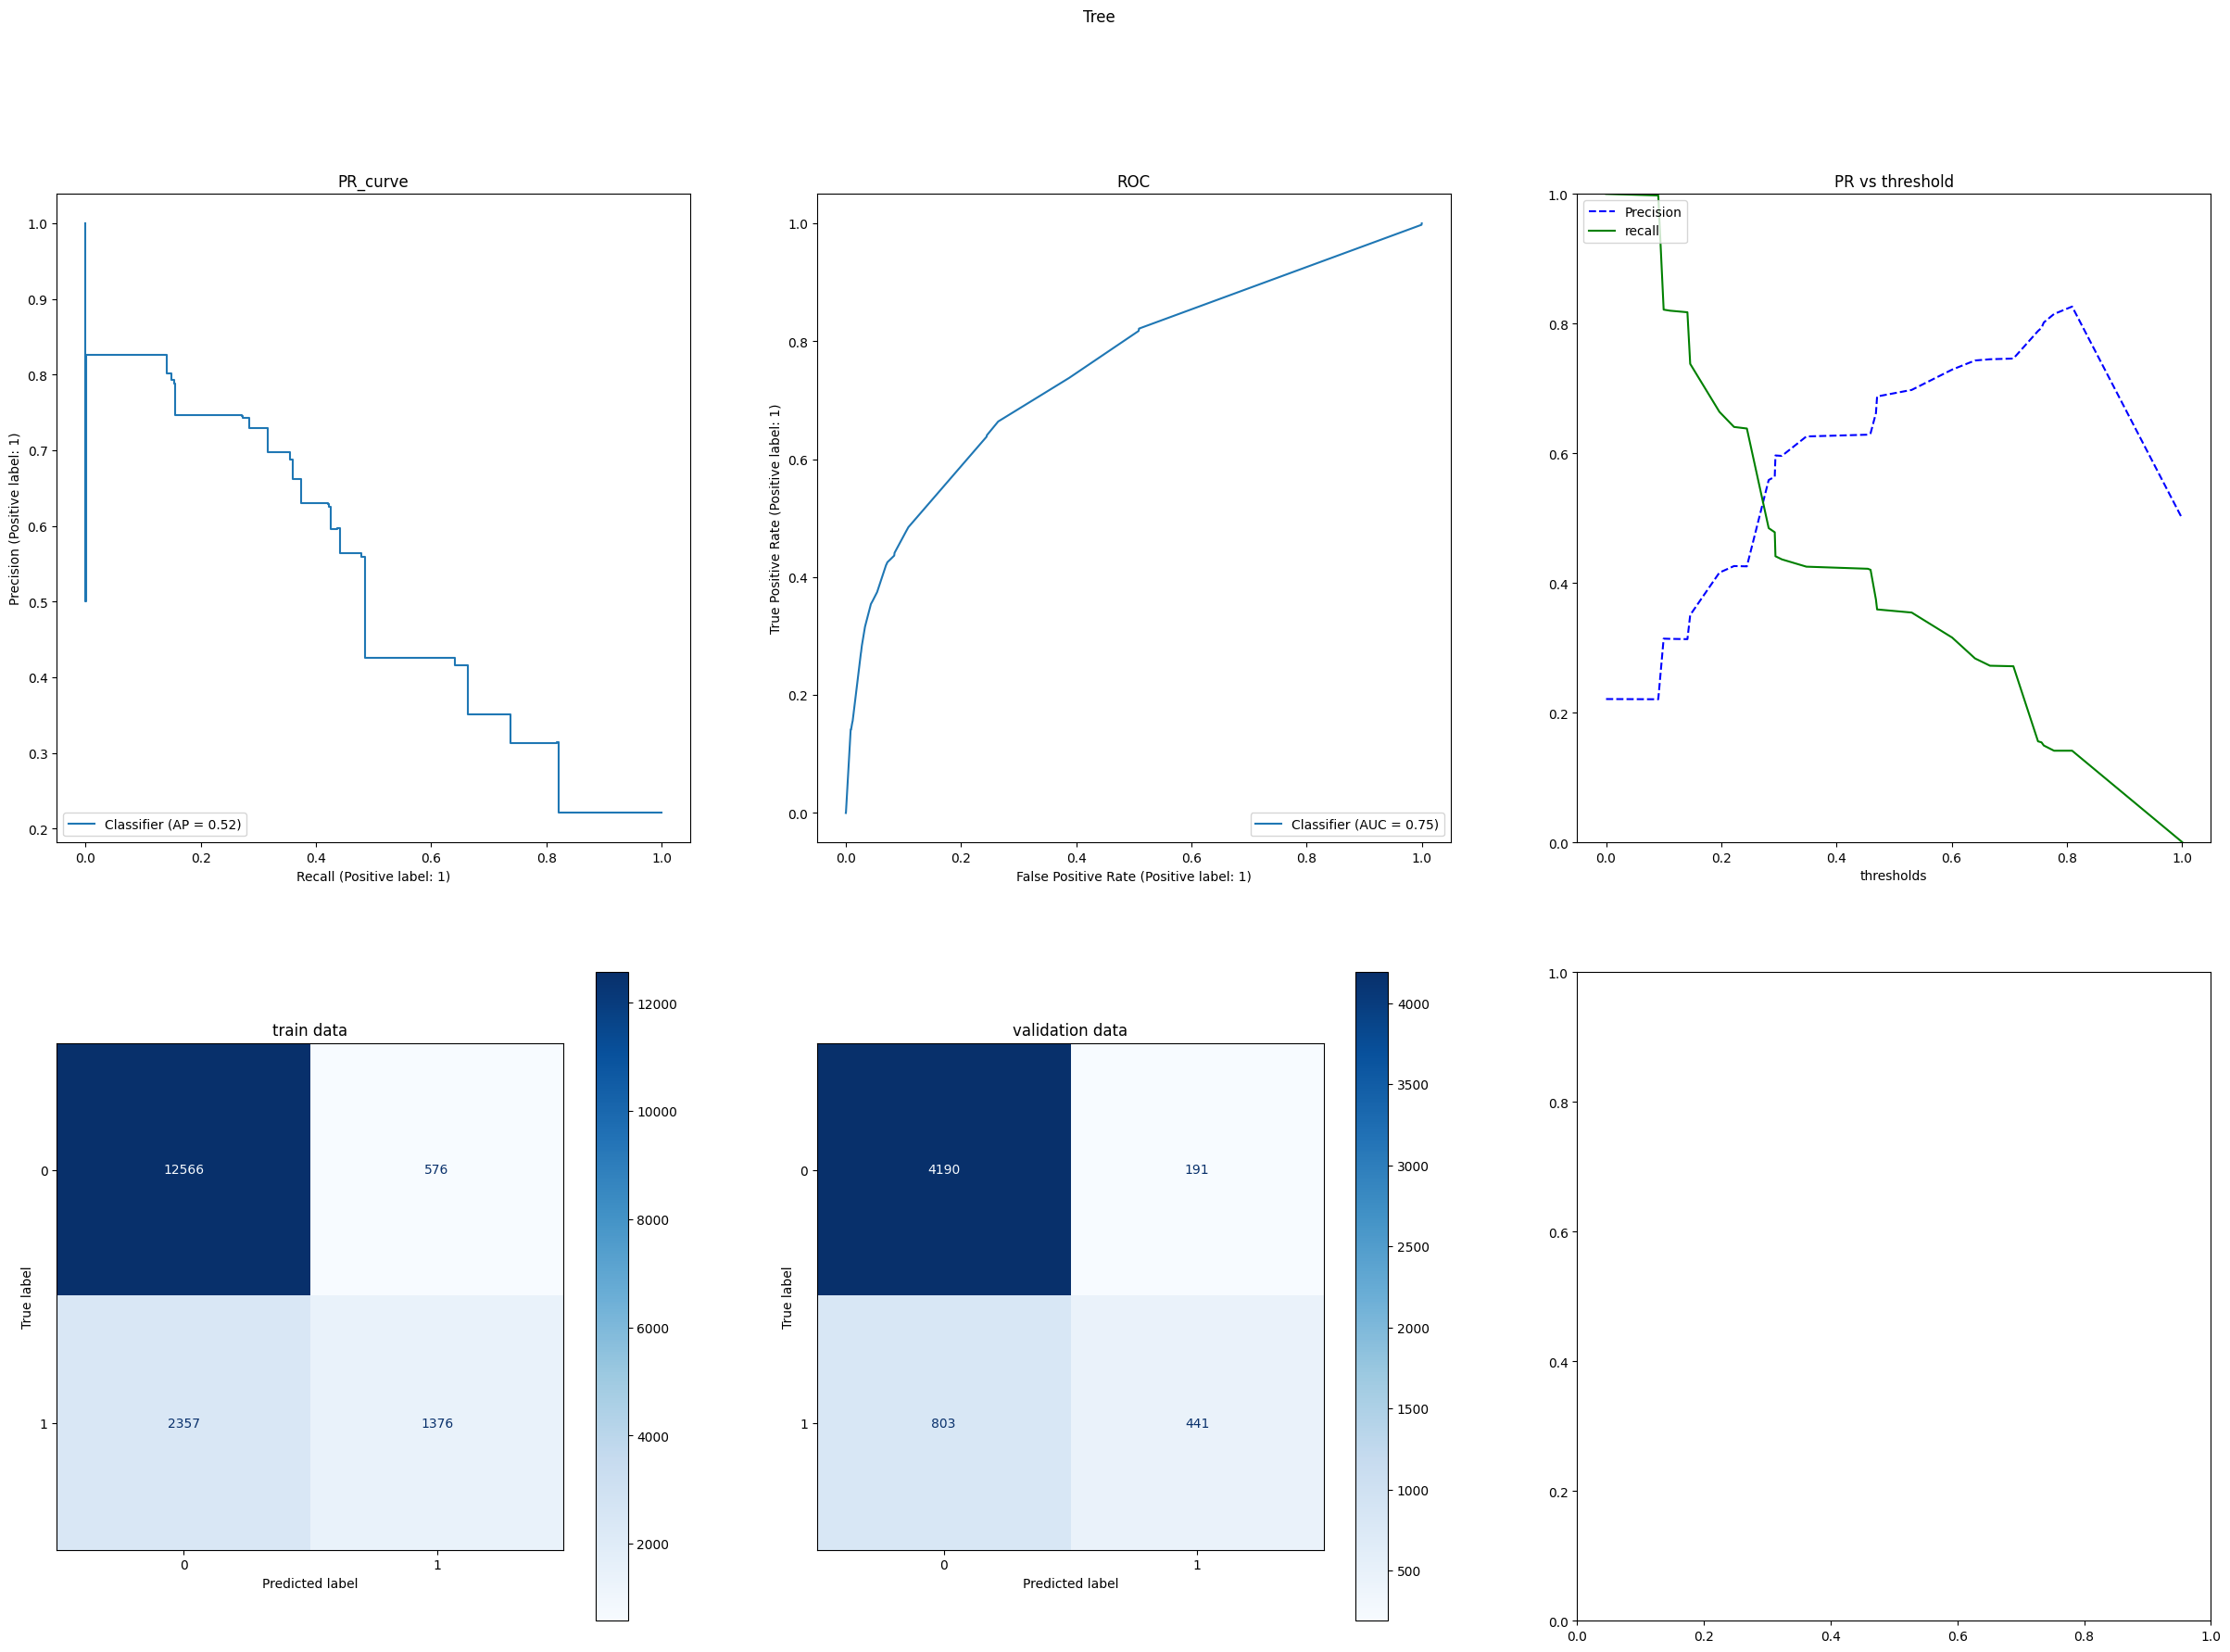

Forest
[[4236  145]
 [ 880  364]]

train scores
accuracy : 0.8177777777777778
precision : 0.71875
recall : 0.28957942673452985
f1_score: 0.41283177391636433

Val scores
accuracy : 0.8177777777777778
precision : 0.7151277013752456
recall : 0.29260450160771706
f1_score: 0.4152880775812892


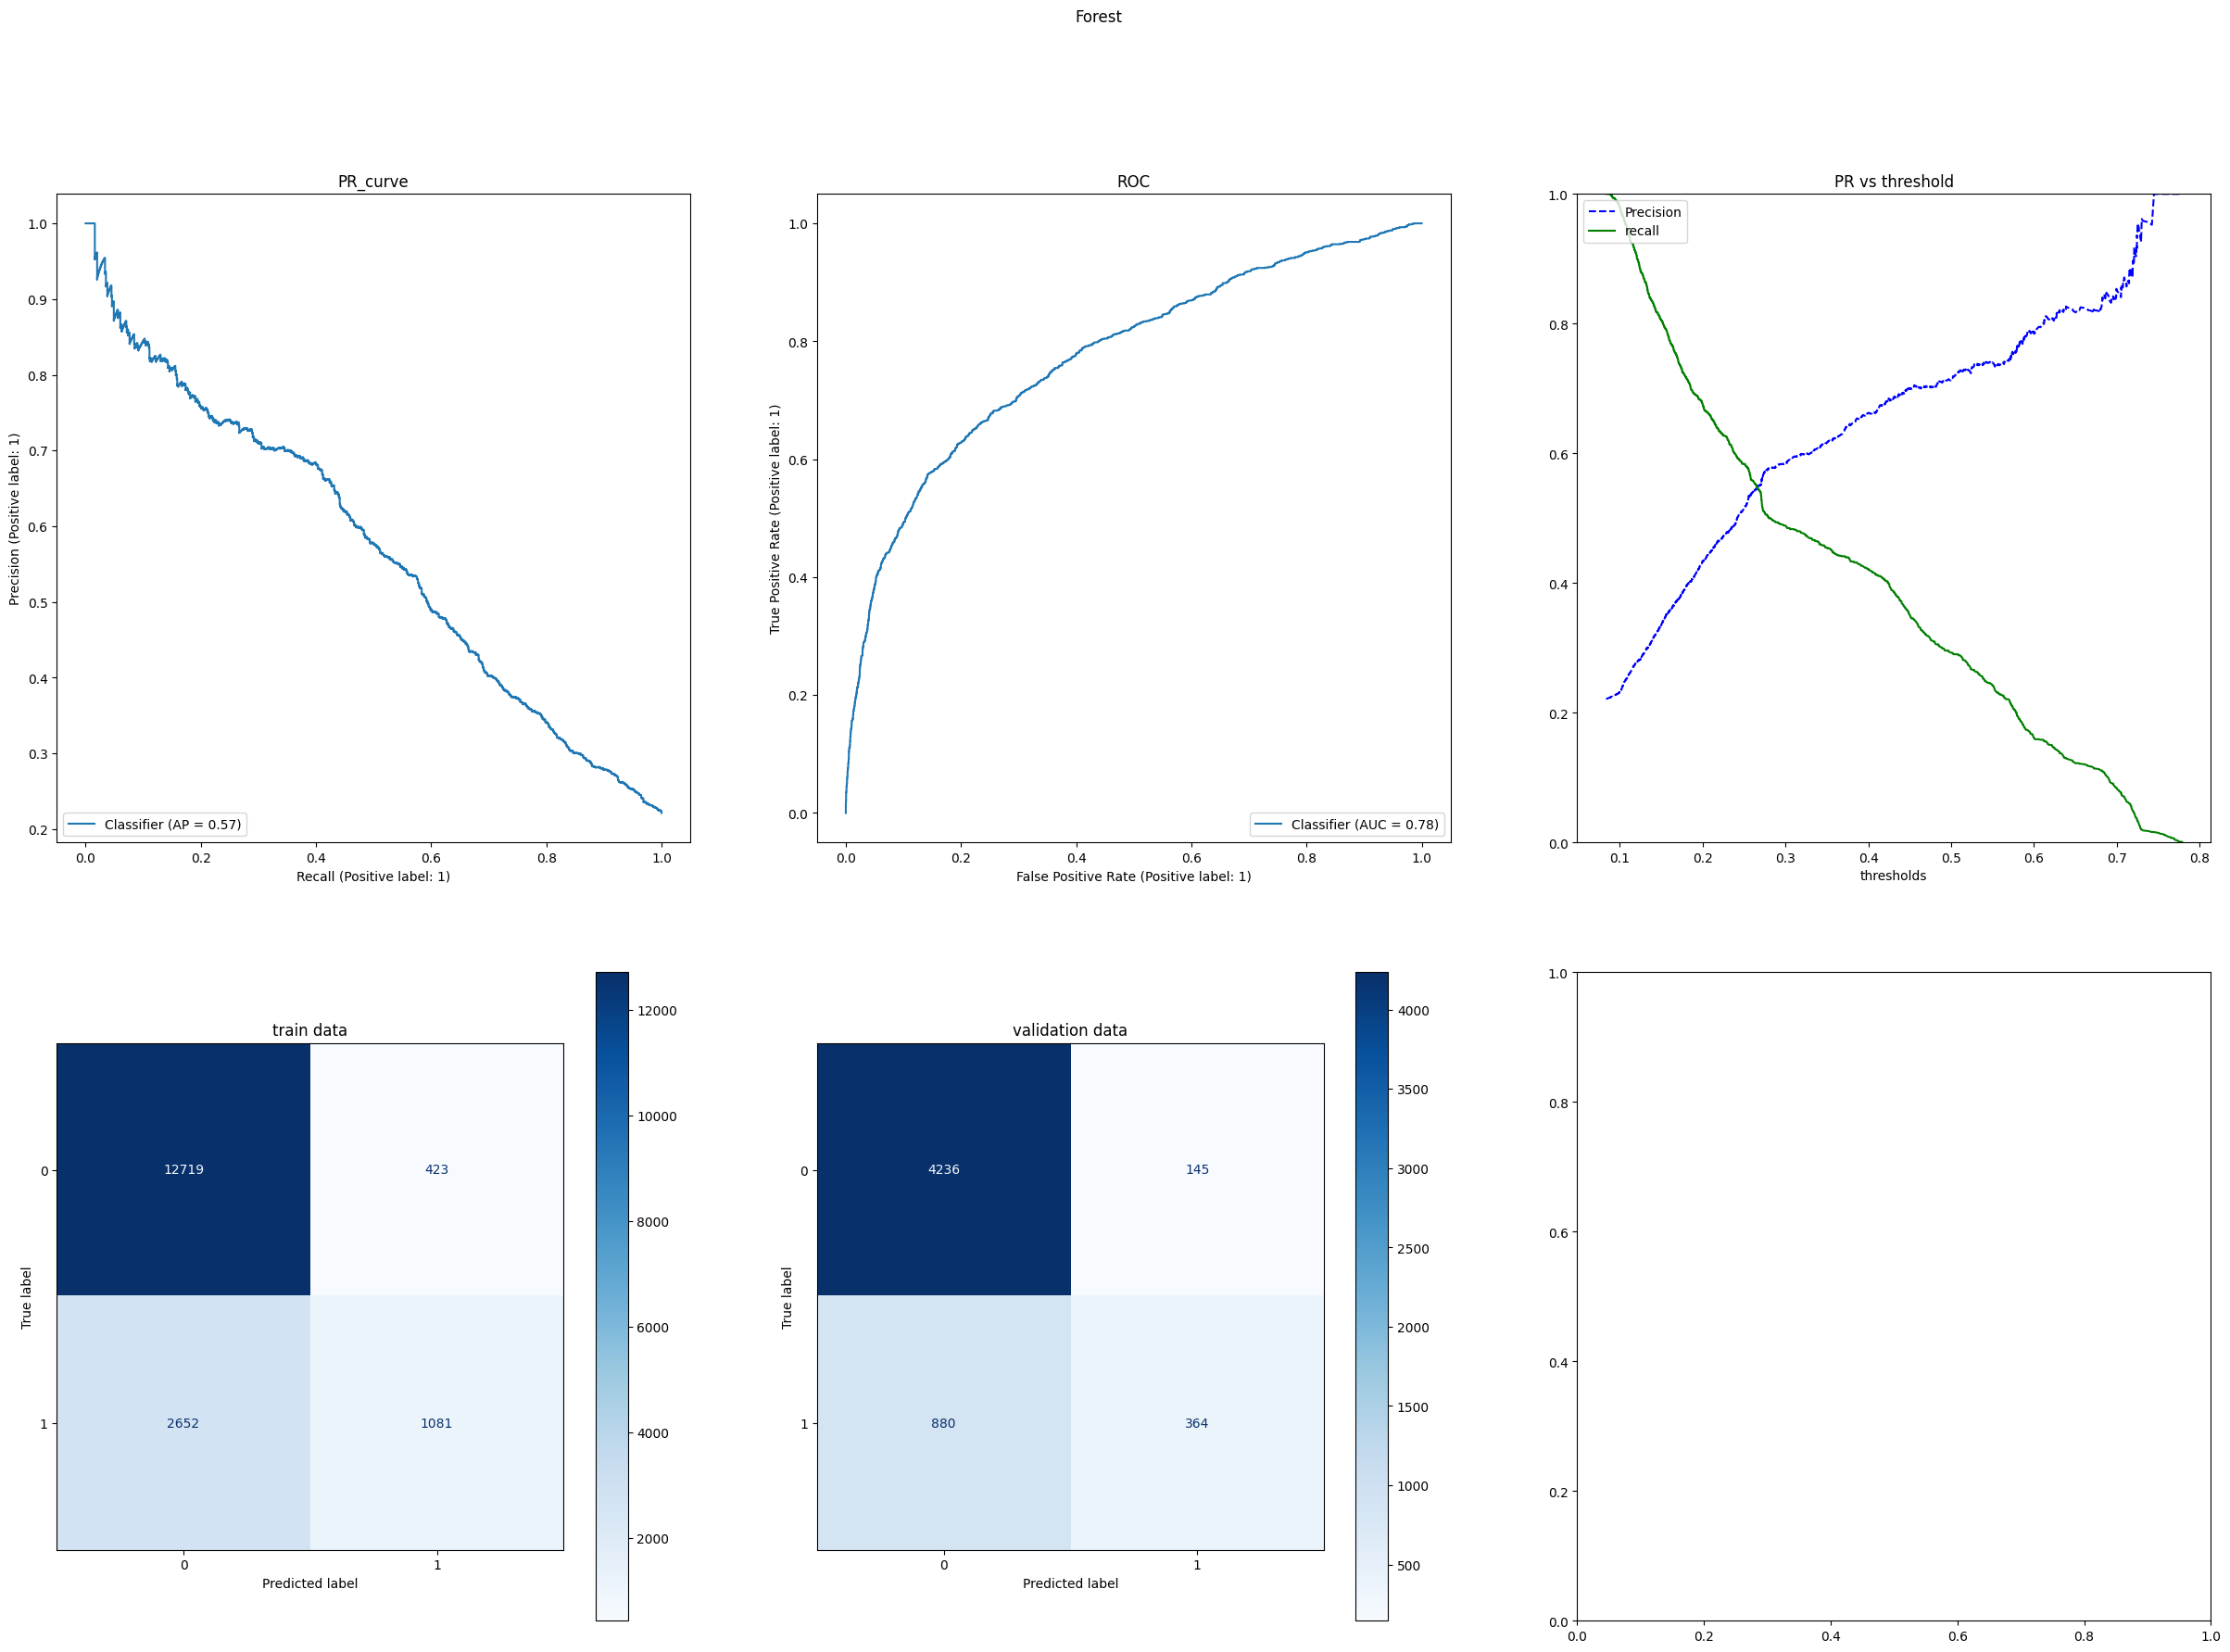

Ada
[[4229  152]
 [ 848  396]]

train scores
accuracy : 0.8172444444444444
precision : 0.693500298151461
recall : 0.31154567372086794
f1_score: 0.42994454713493535

Val scores
accuracy : 0.8222222222222222
precision : 0.7226277372262774
recall : 0.3183279742765273
f1_score: 0.4419642857142857


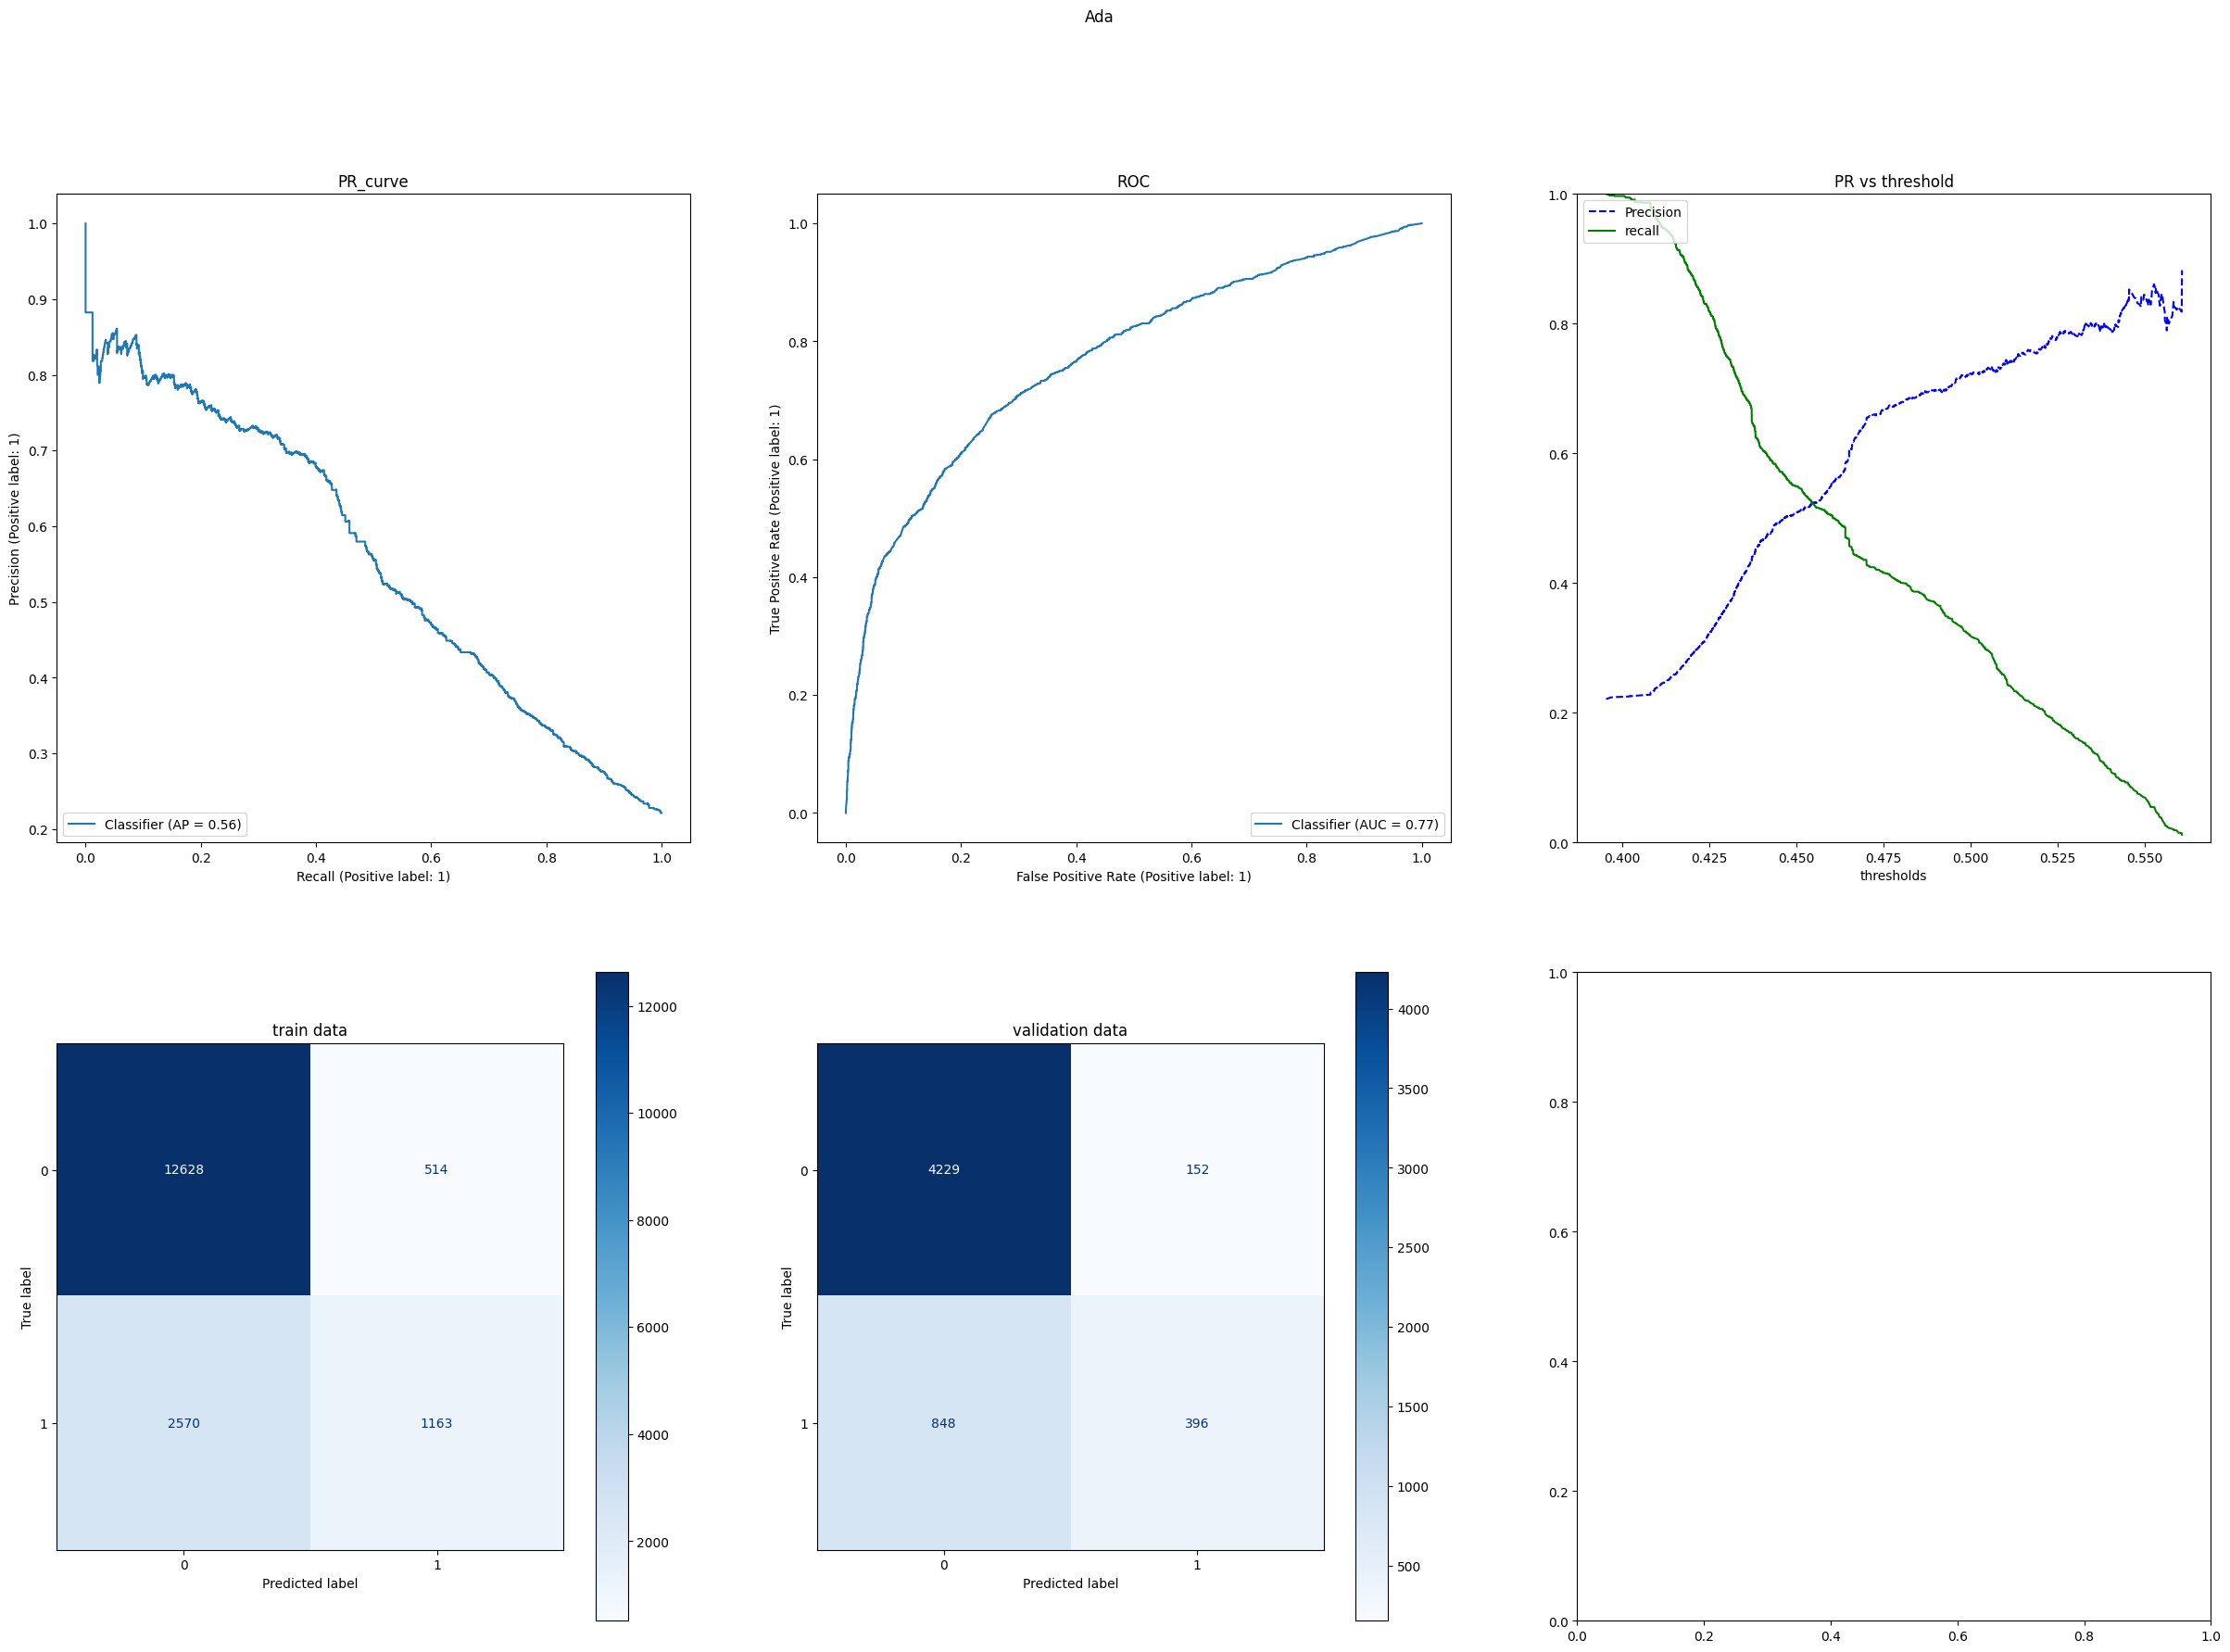

GdBoost
[[4246  135]
 [ 901  343]]

train scores
accuracy : 0.8118518518518518
precision : 0.6978723404255319
recall : 0.2635949638360568
f1_score: 0.38265603733229636

Val scores
accuracy : 0.8158222222222222
precision : 0.7175732217573222
recall : 0.2757234726688103
f1_score: 0.3983739837398374


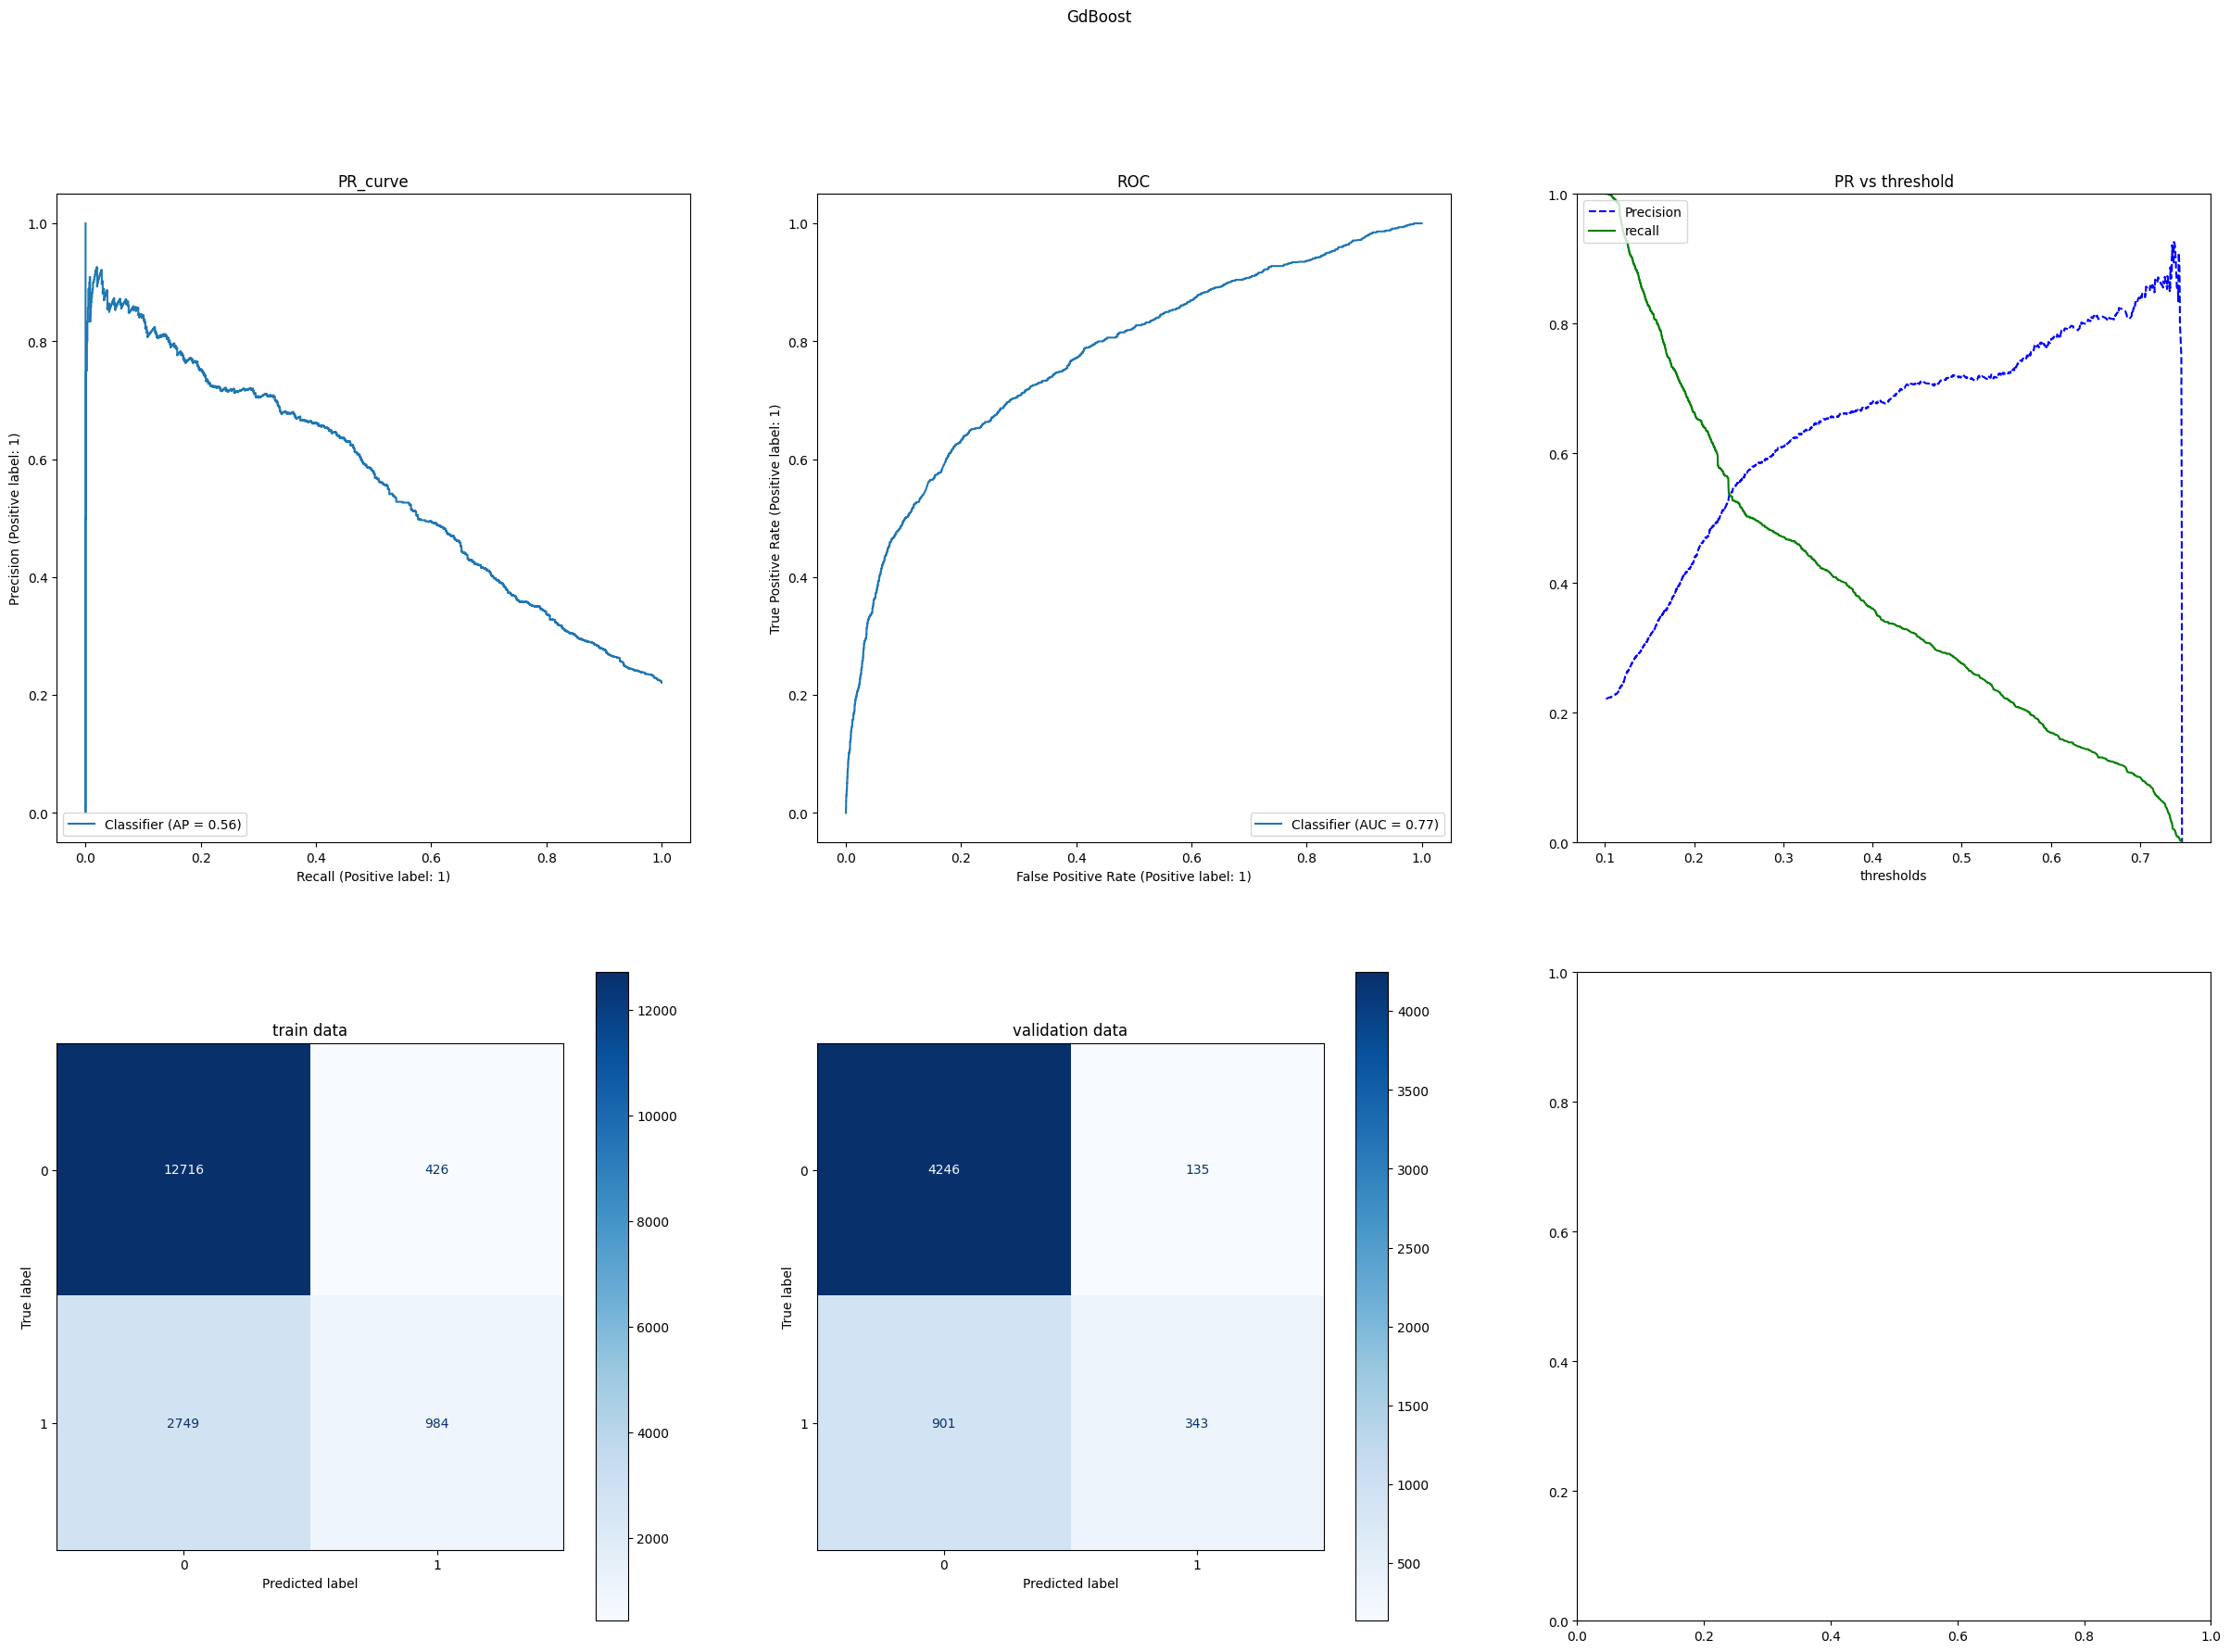

In [17]:

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(max_depth=5,
                            random_state=42),
    RandomForestClassifier(n_estimators=500,
                            max_depth=5,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=600,
                        learning_rate=0.01,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=600,
                                learning_rate=0.005,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [18]:
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[USAGE,DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,PAY,BILL])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,PAY,BILL])
my_elementary_trans_5 = ElementaryExtractor([USAGE,DIFF])


extractors = [NonTsPass(),
               length_5_bop,
                length_6_bop,
                my_elementary_trans_5,
                my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor
A = my_base_transform.fit_transform(X_train)

In [19]:
case_name = 'non_log,raw,reg'

print(case_name)

non_log,raw,reg


Tree
[[4190  191]
 [ 803  441]]

train scores
accuracy : 0.8261925925925926
precision : 0.7049180327868853
recall : 0.3686043396731851
f1_score: 0.48408091468777487

Val scores
accuracy : 0.8232888888888888
precision : 0.6977848101265823
recall : 0.3545016077170418
f1_score: 0.47014925373134325


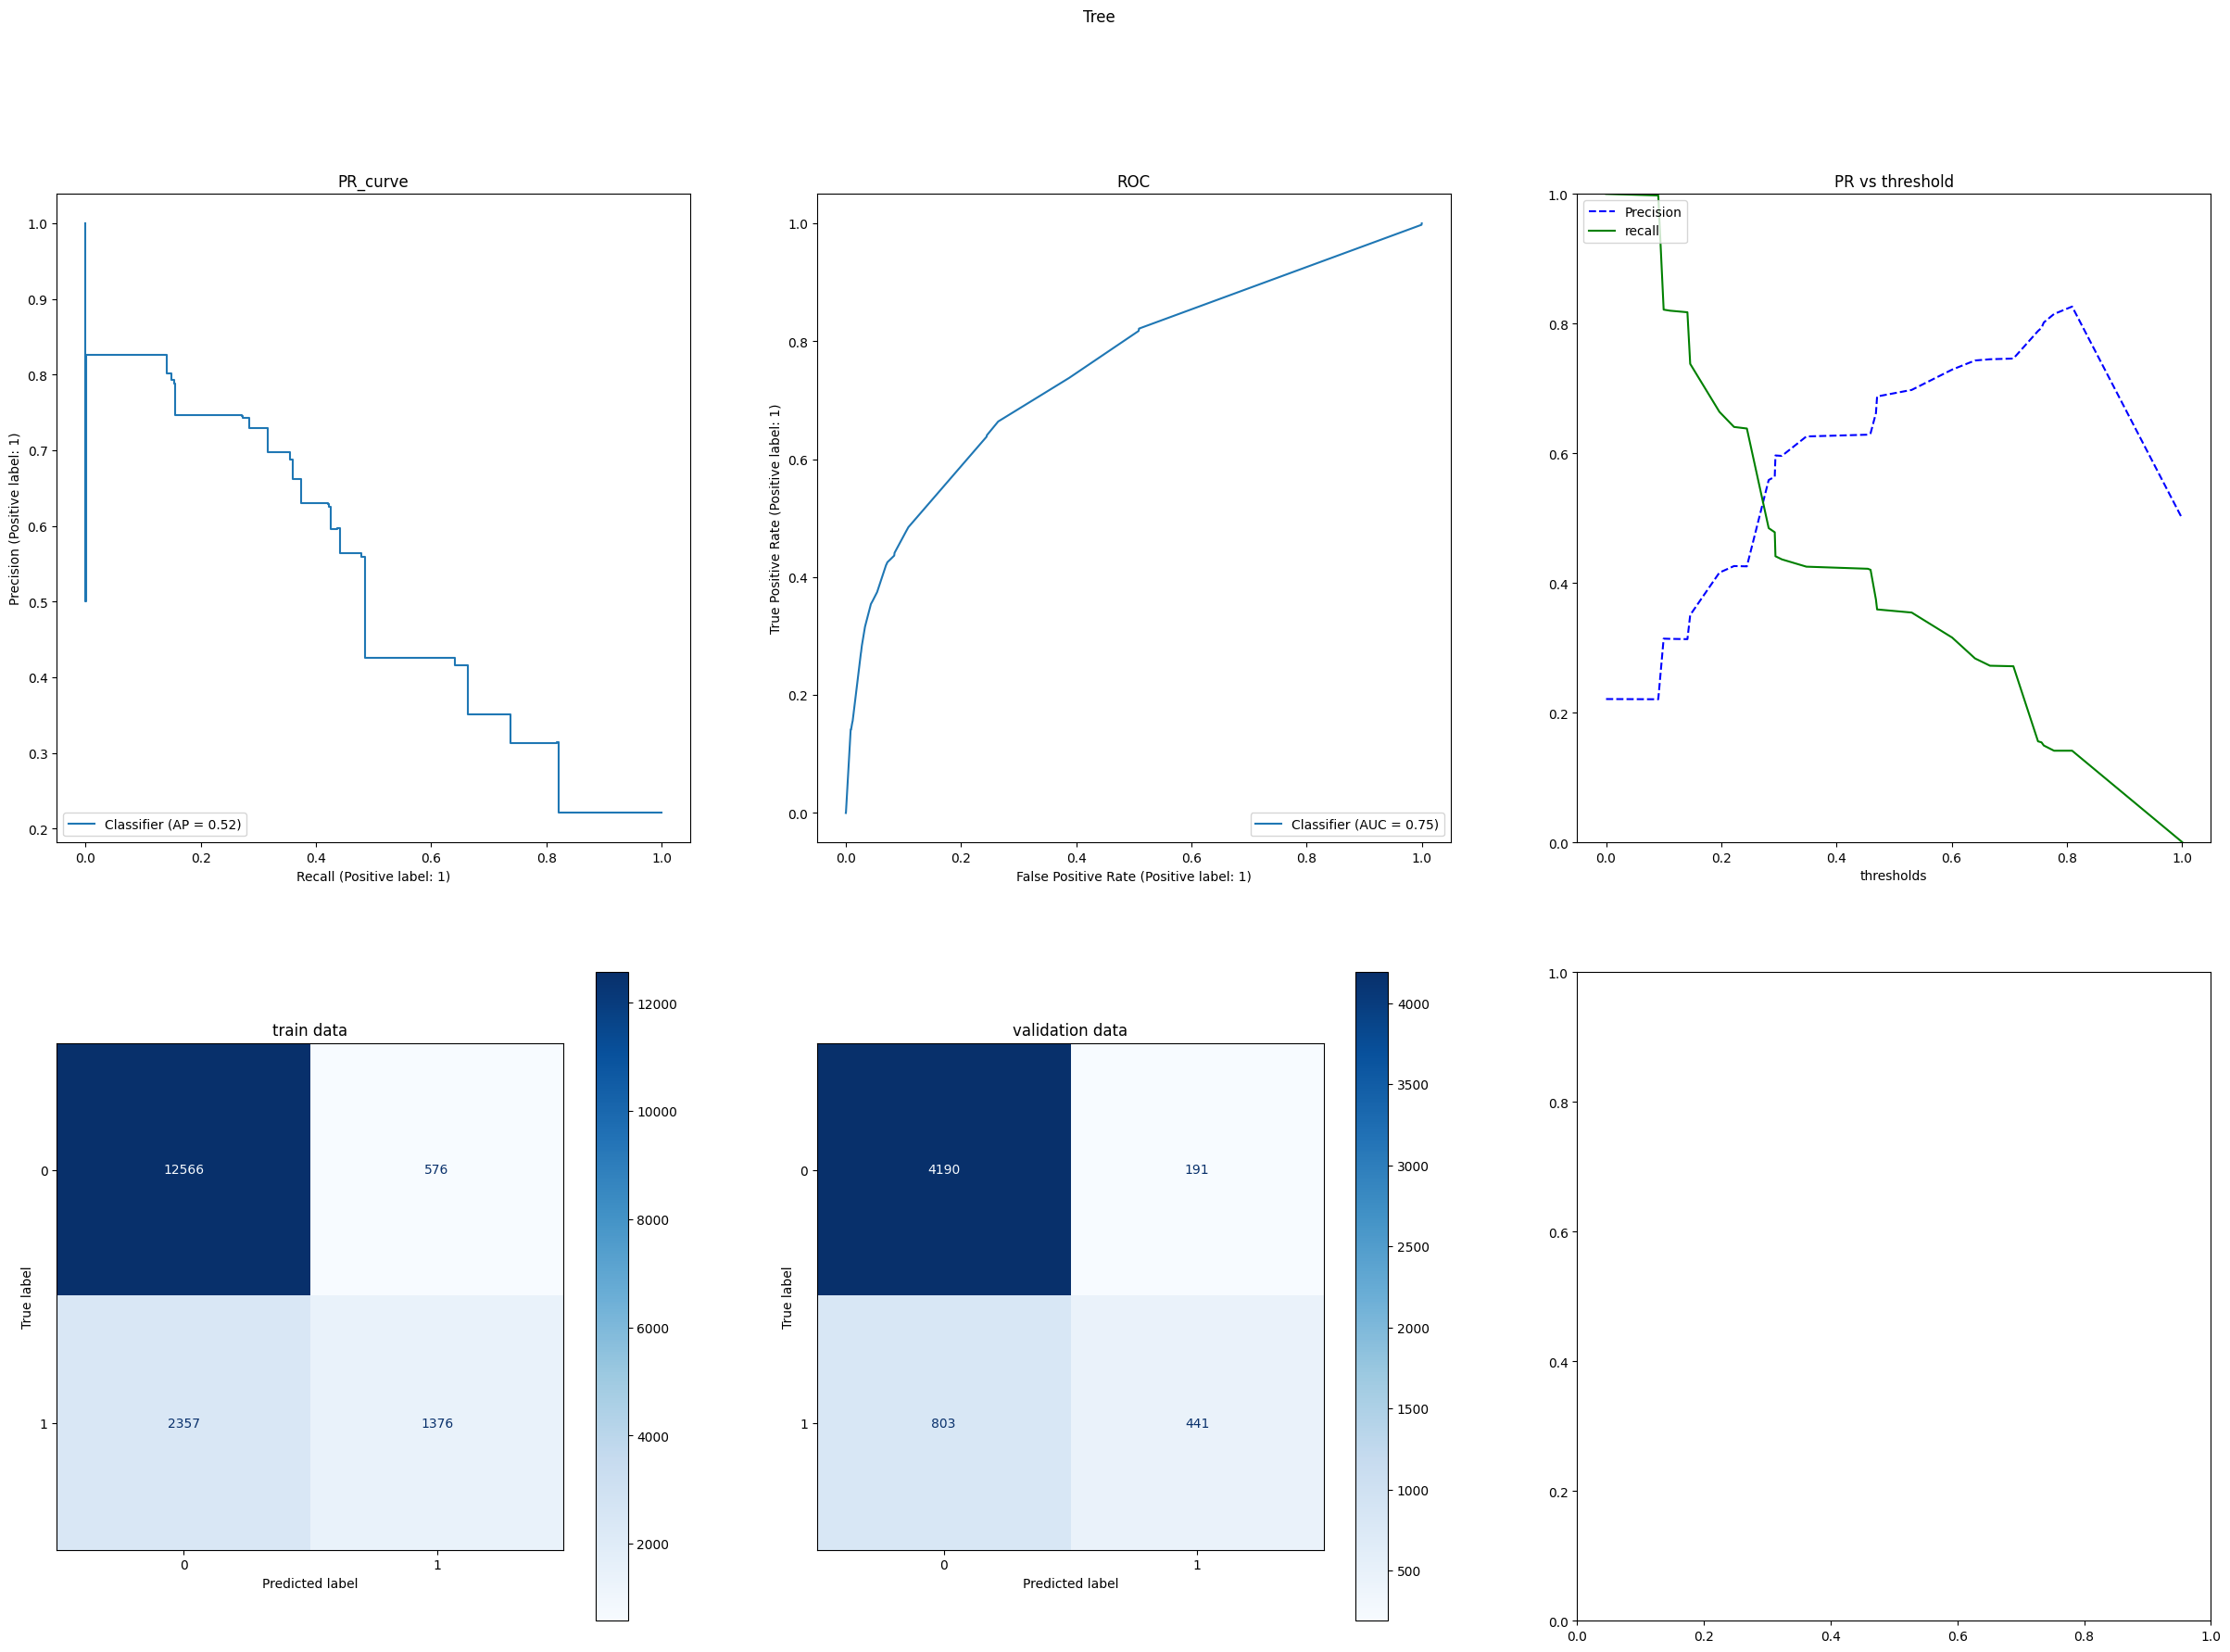

Forest
[[4236  145]
 [ 880  364]]

train scores
accuracy : 0.8177777777777778
precision : 0.71875
recall : 0.28957942673452985
f1_score: 0.41283177391636433

Val scores
accuracy : 0.8177777777777778
precision : 0.7151277013752456
recall : 0.29260450160771706
f1_score: 0.4152880775812892


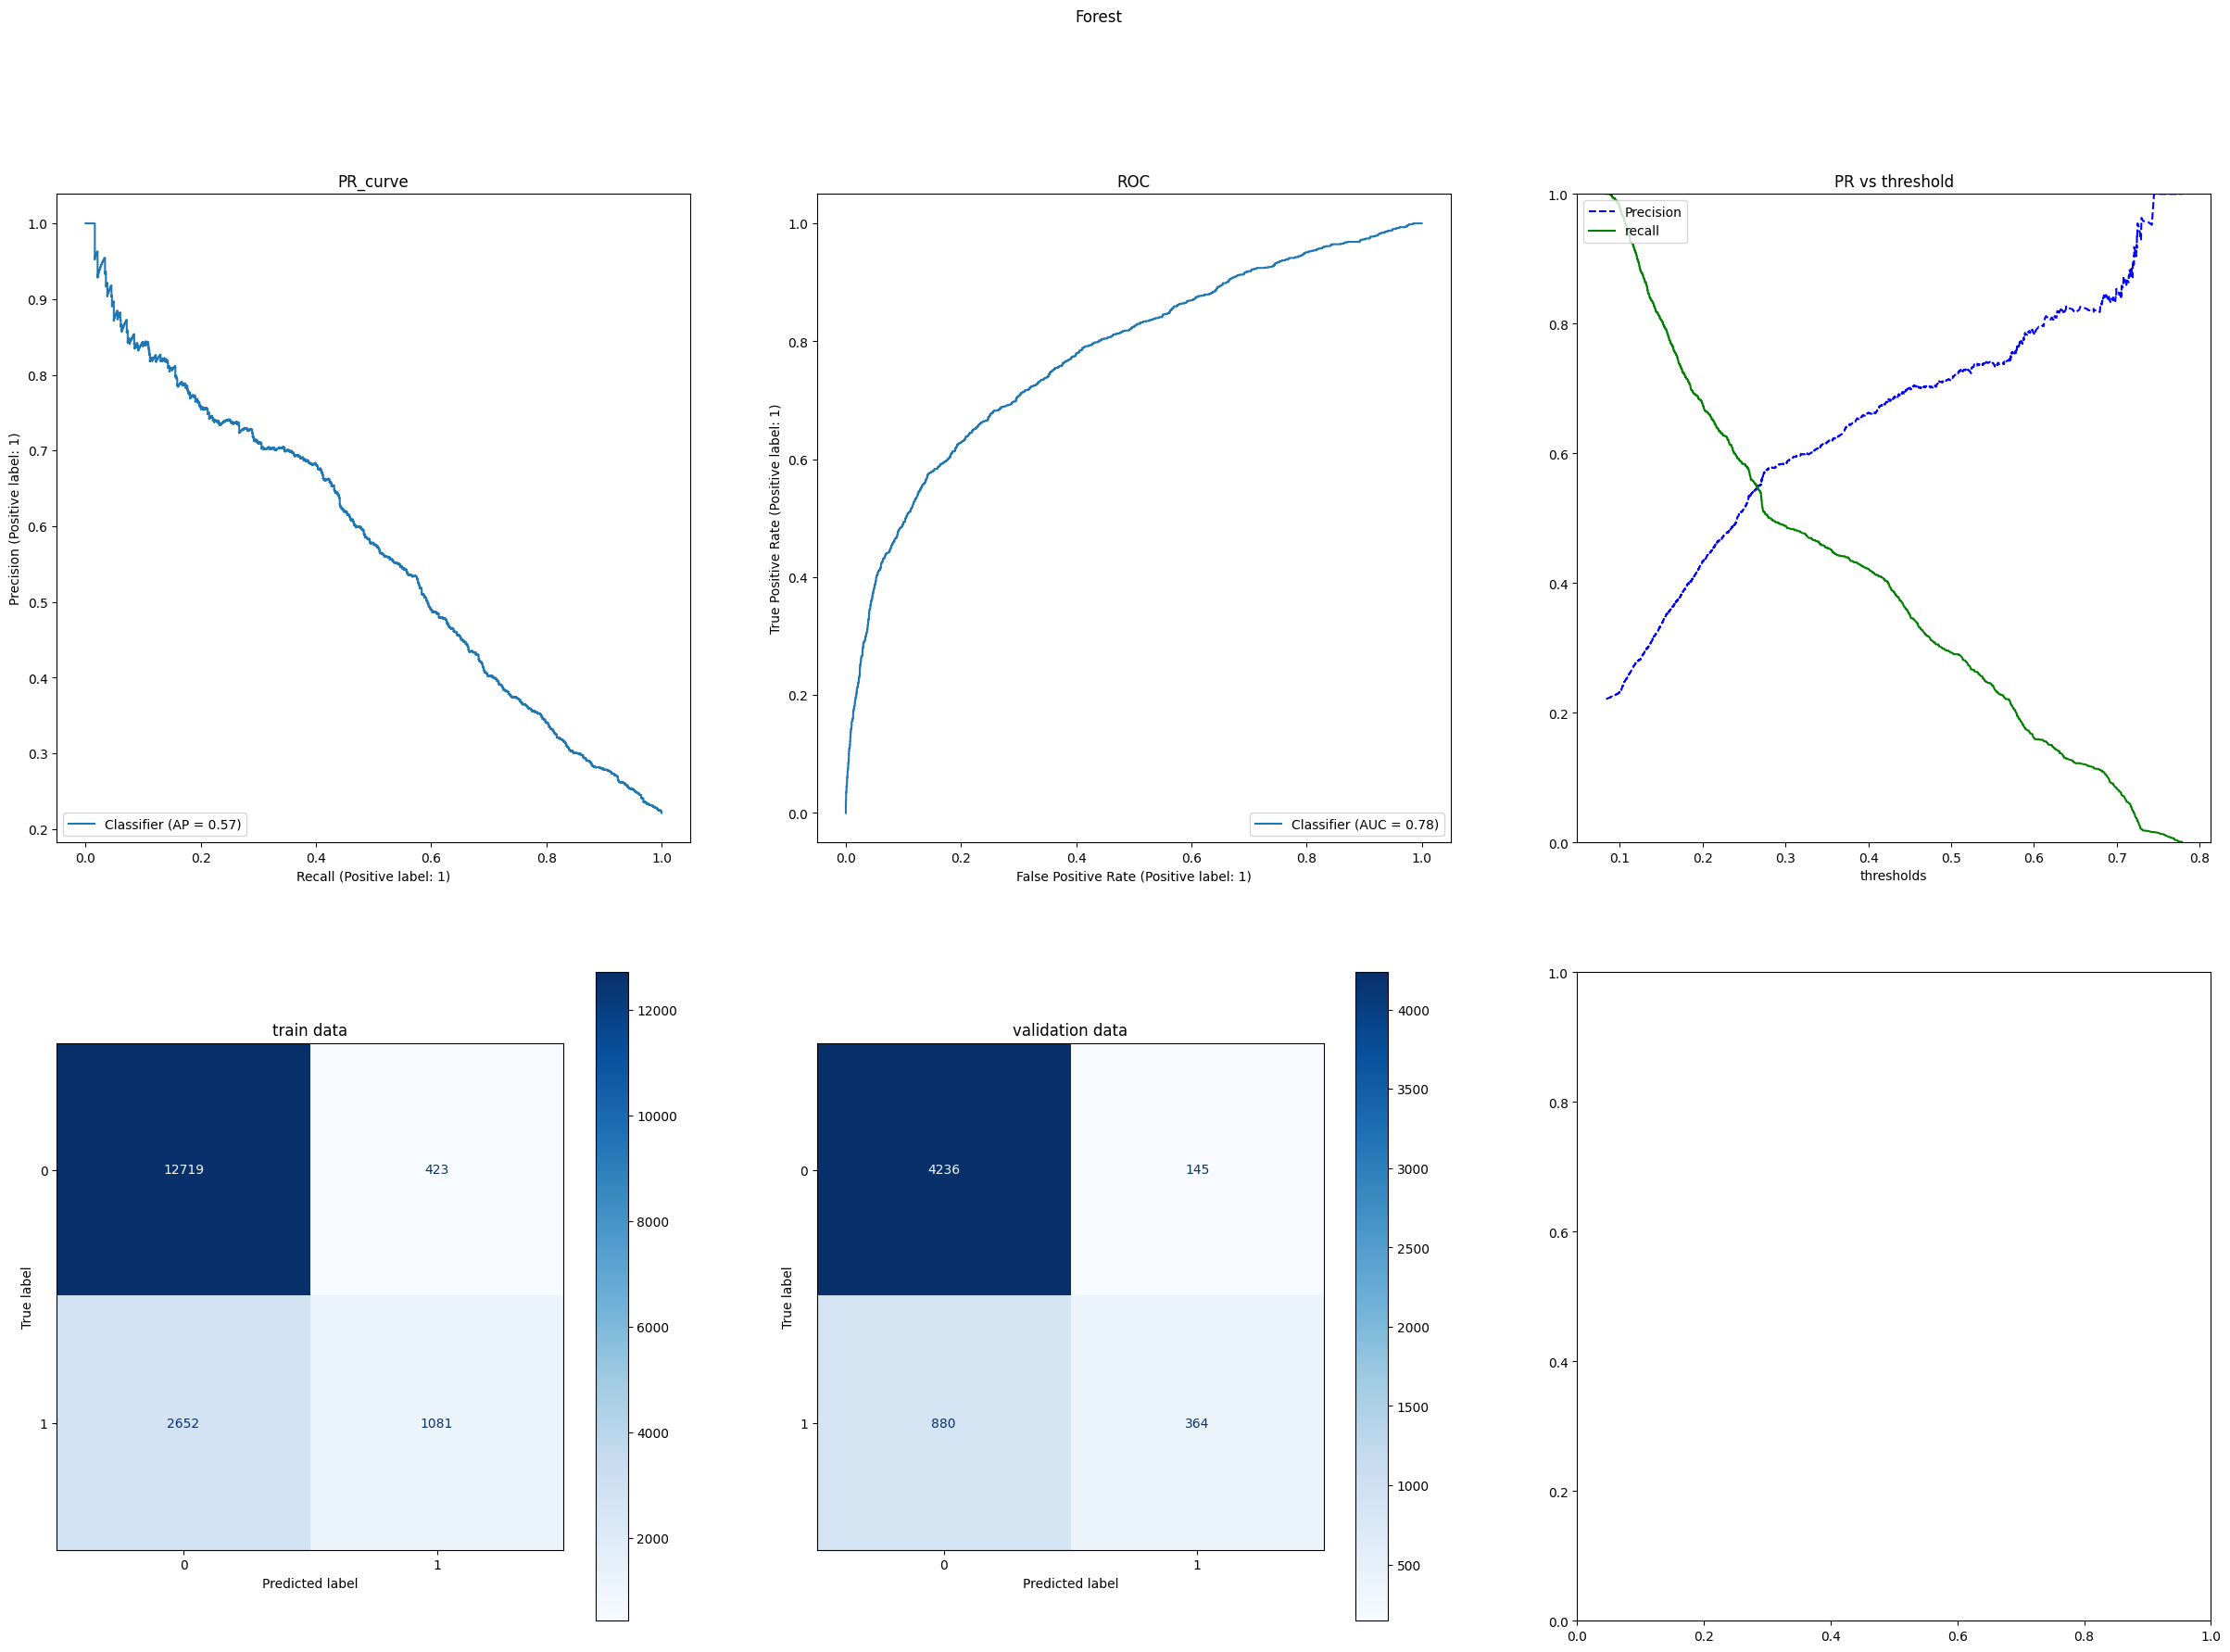

Ada
[[4229  152]
 [ 848  396]]

train scores
accuracy : 0.8172444444444444
precision : 0.693500298151461
recall : 0.31154567372086794
f1_score: 0.42994454713493535

Val scores
accuracy : 0.8222222222222222
precision : 0.7226277372262774
recall : 0.3183279742765273
f1_score: 0.4419642857142857


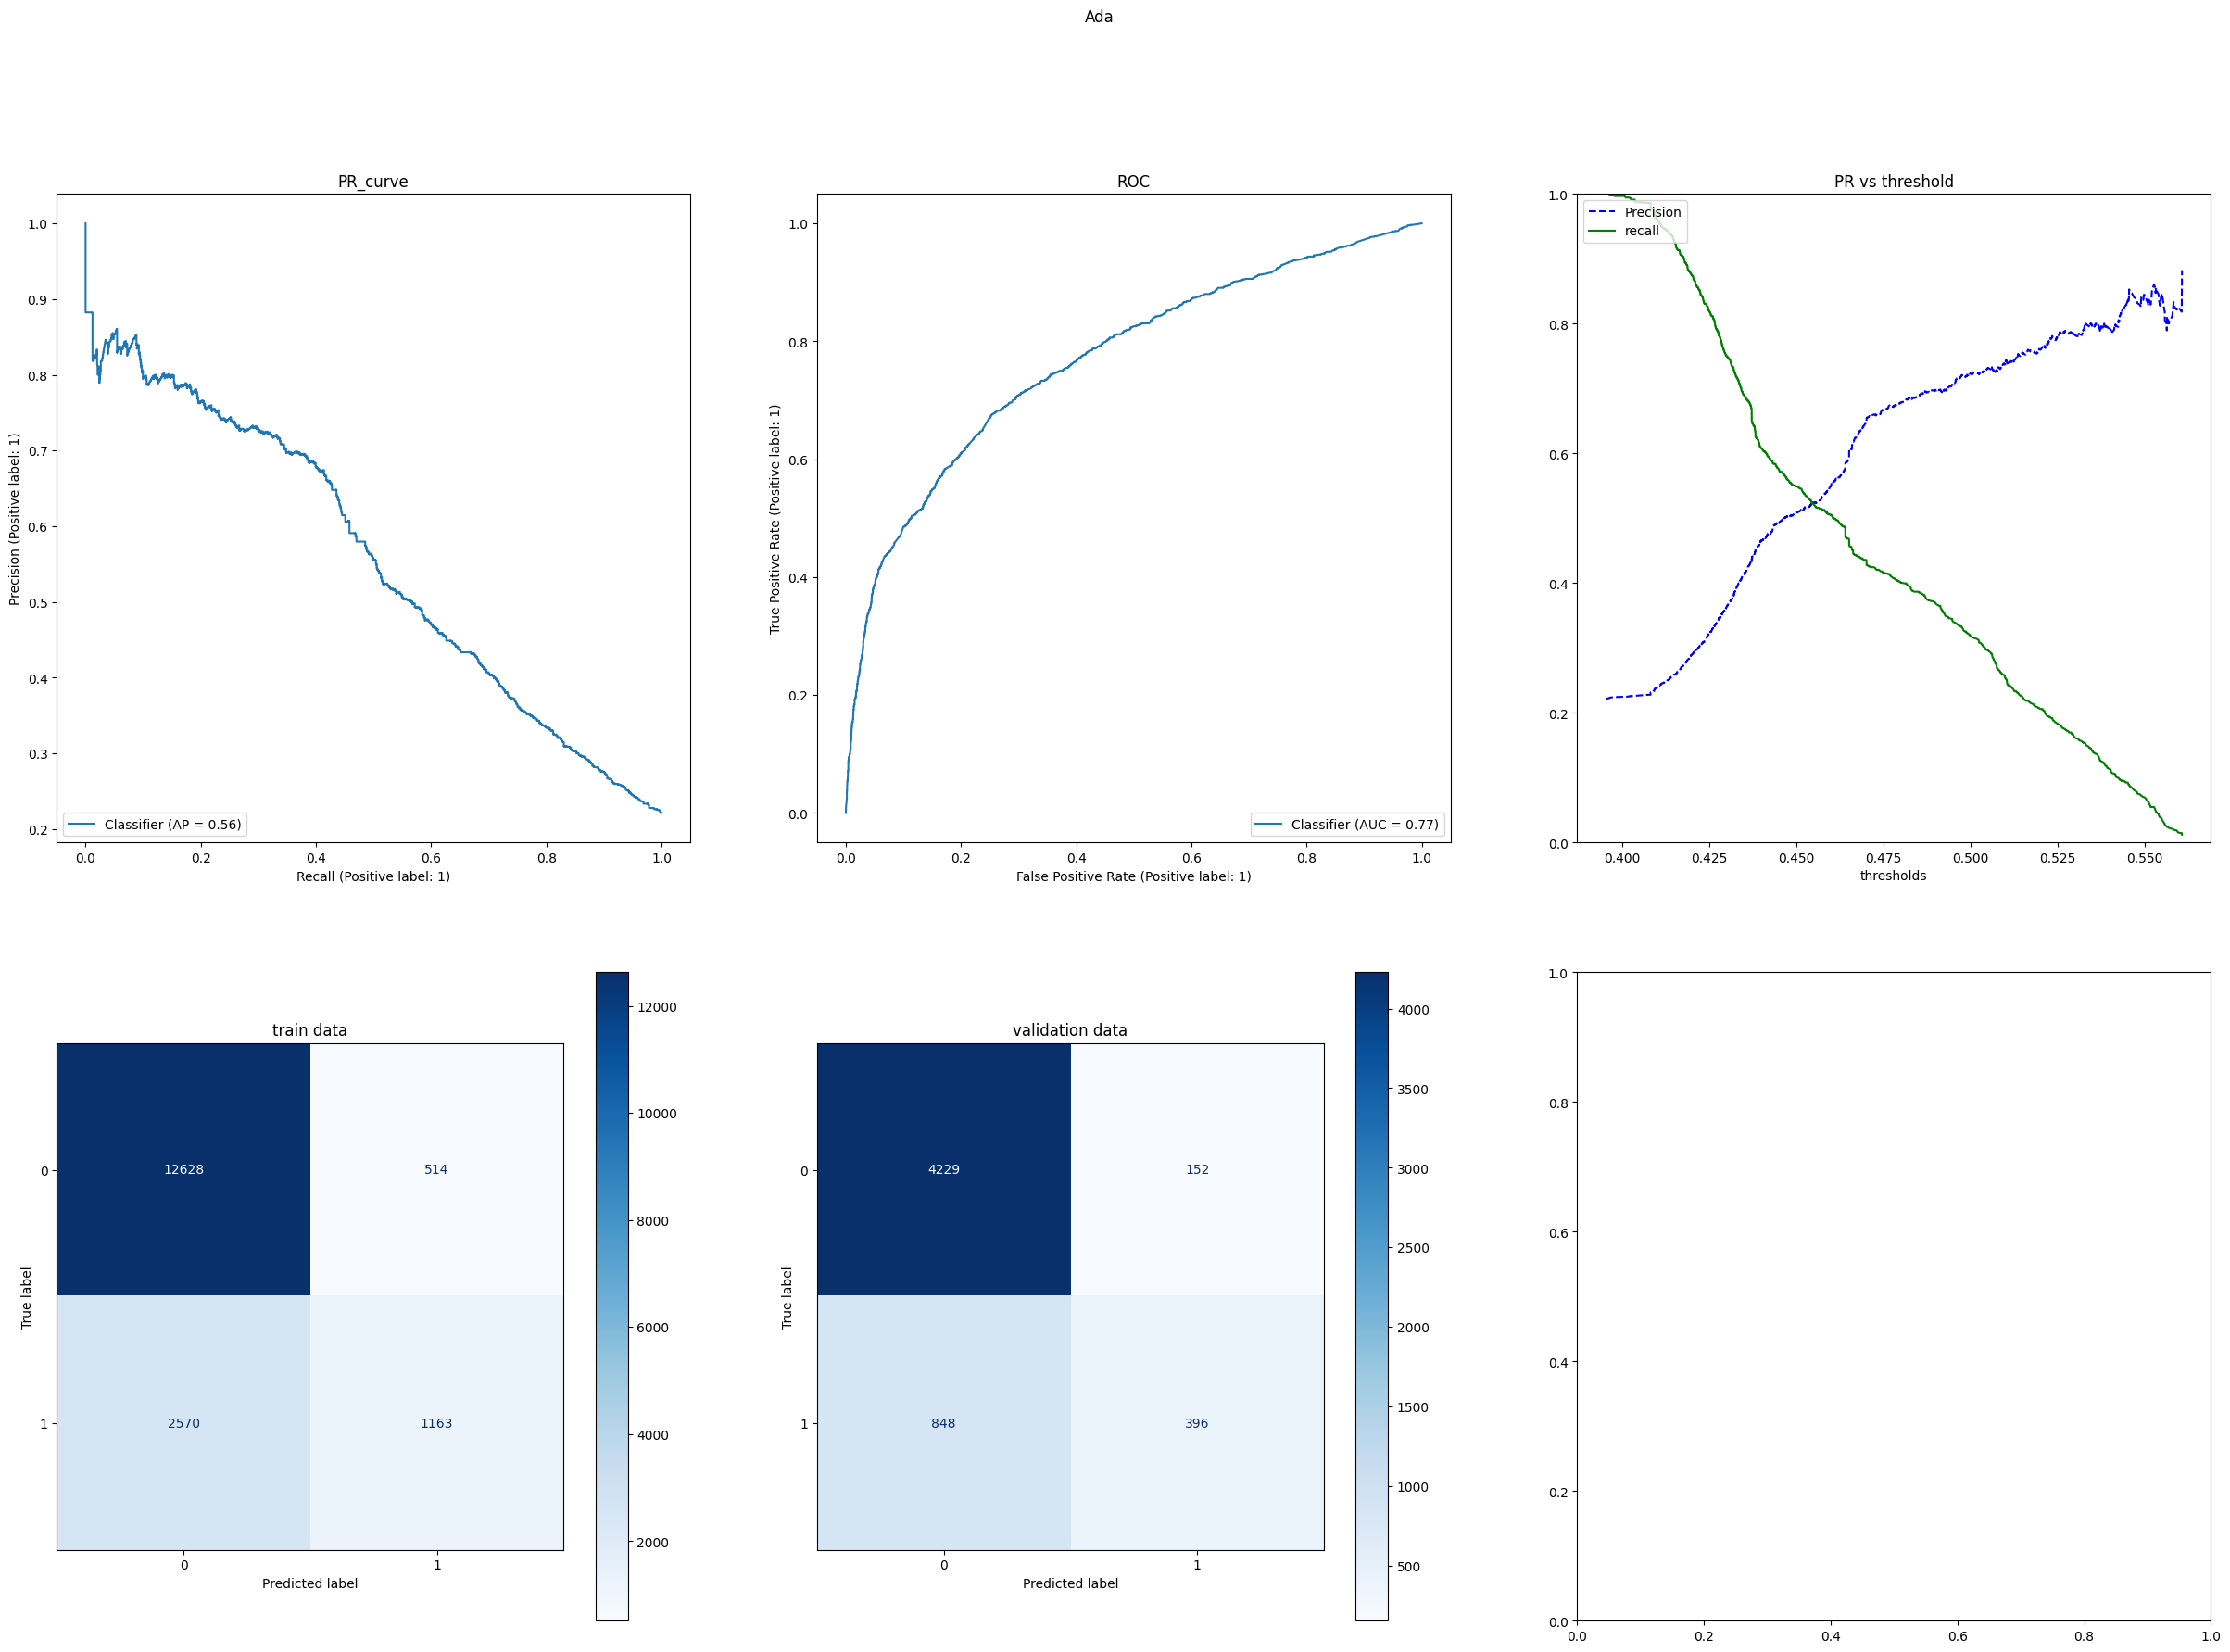

GdBoost
[[4246  135]
 [ 901  343]]

train scores
accuracy : 0.8118518518518518
precision : 0.6978723404255319
recall : 0.2635949638360568
f1_score: 0.38265603733229636

Val scores
accuracy : 0.8158222222222222
precision : 0.7175732217573222
recall : 0.2757234726688103
f1_score: 0.3983739837398374


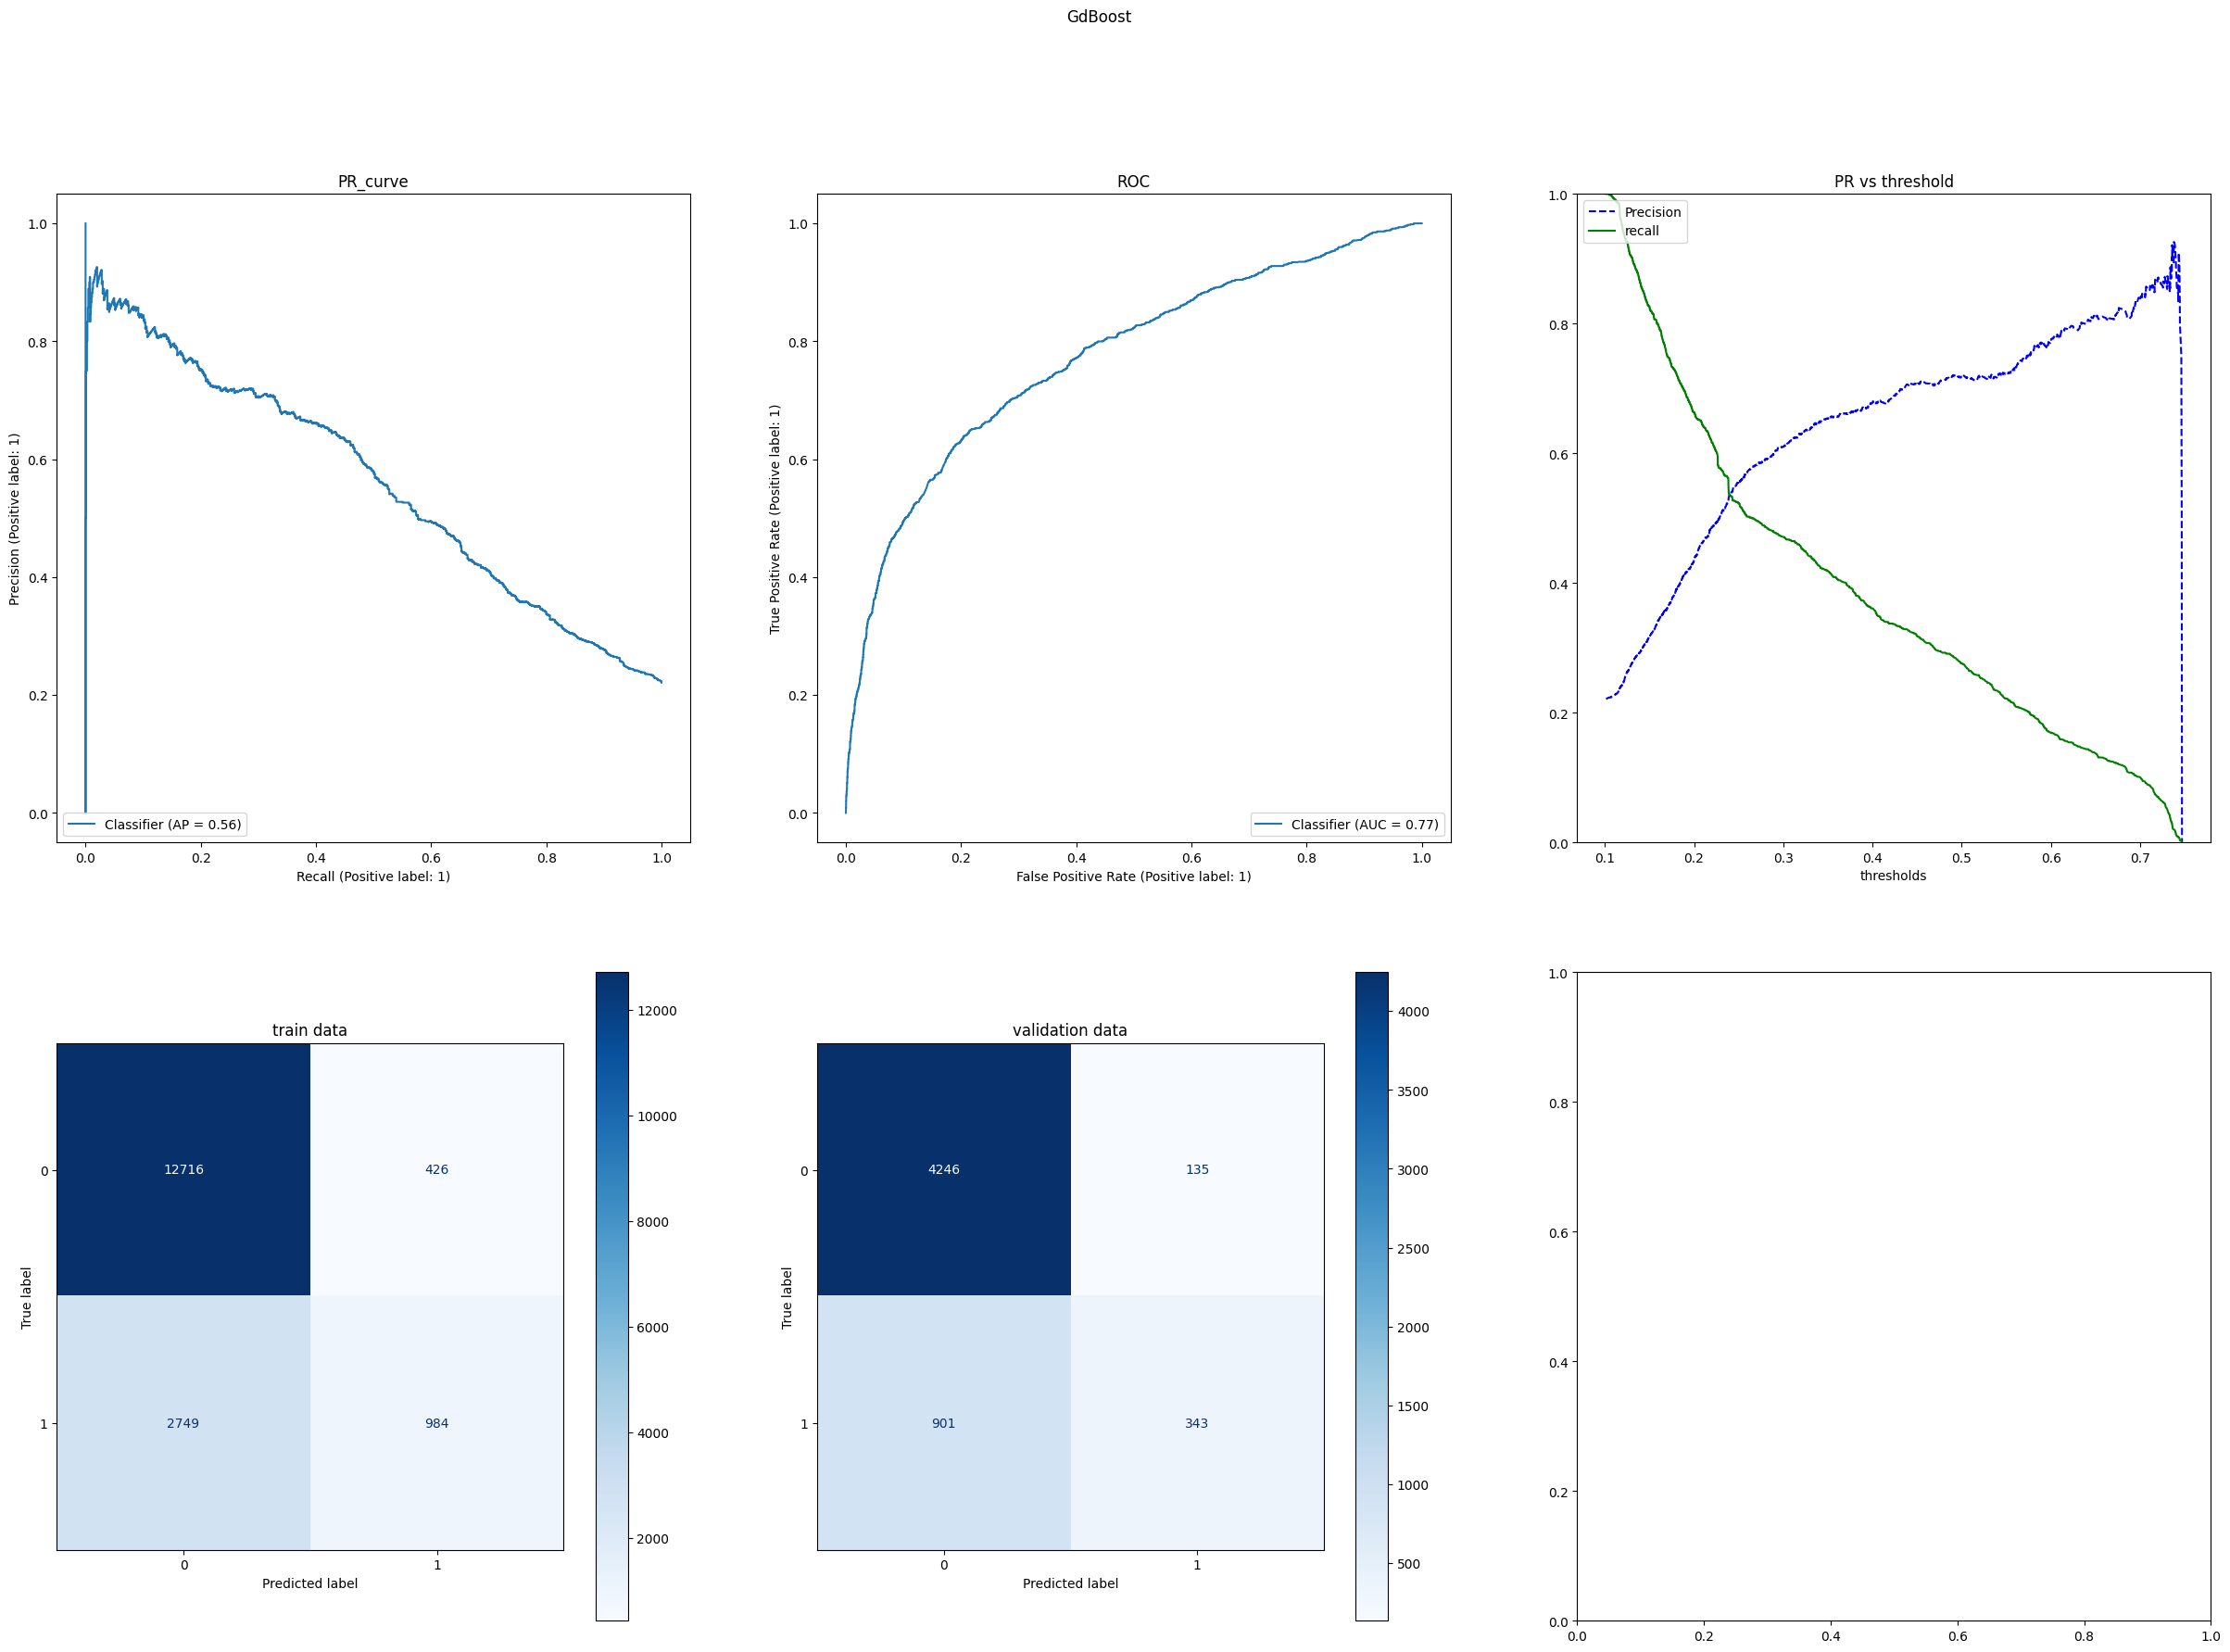

In [20]:

my_base_transform = BasicTransformer('')
clfs = [
    DecisionTreeClassifier(max_depth=5,
                            random_state=42),
    RandomForestClassifier(n_estimators=500,
                            max_depth=5,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=600,
                        learning_rate=0.01,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=600,
                                learning_rate=0.005,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [21]:
case_name = 'non_log,t_series,reg'

print(case_name)

non_log,t_series,reg


Tree
[[4100  281]
 [ 733  511]]

train scores
accuracy : 0.8215703703703704
precision : 0.6515533165407221
recall : 0.41575140637556923
f1_score: 0.5076042518397383

Val scores
accuracy : 0.8197333333333333
precision : 0.6452020202020202
recall : 0.4107717041800643
f1_score: 0.5019646365422397


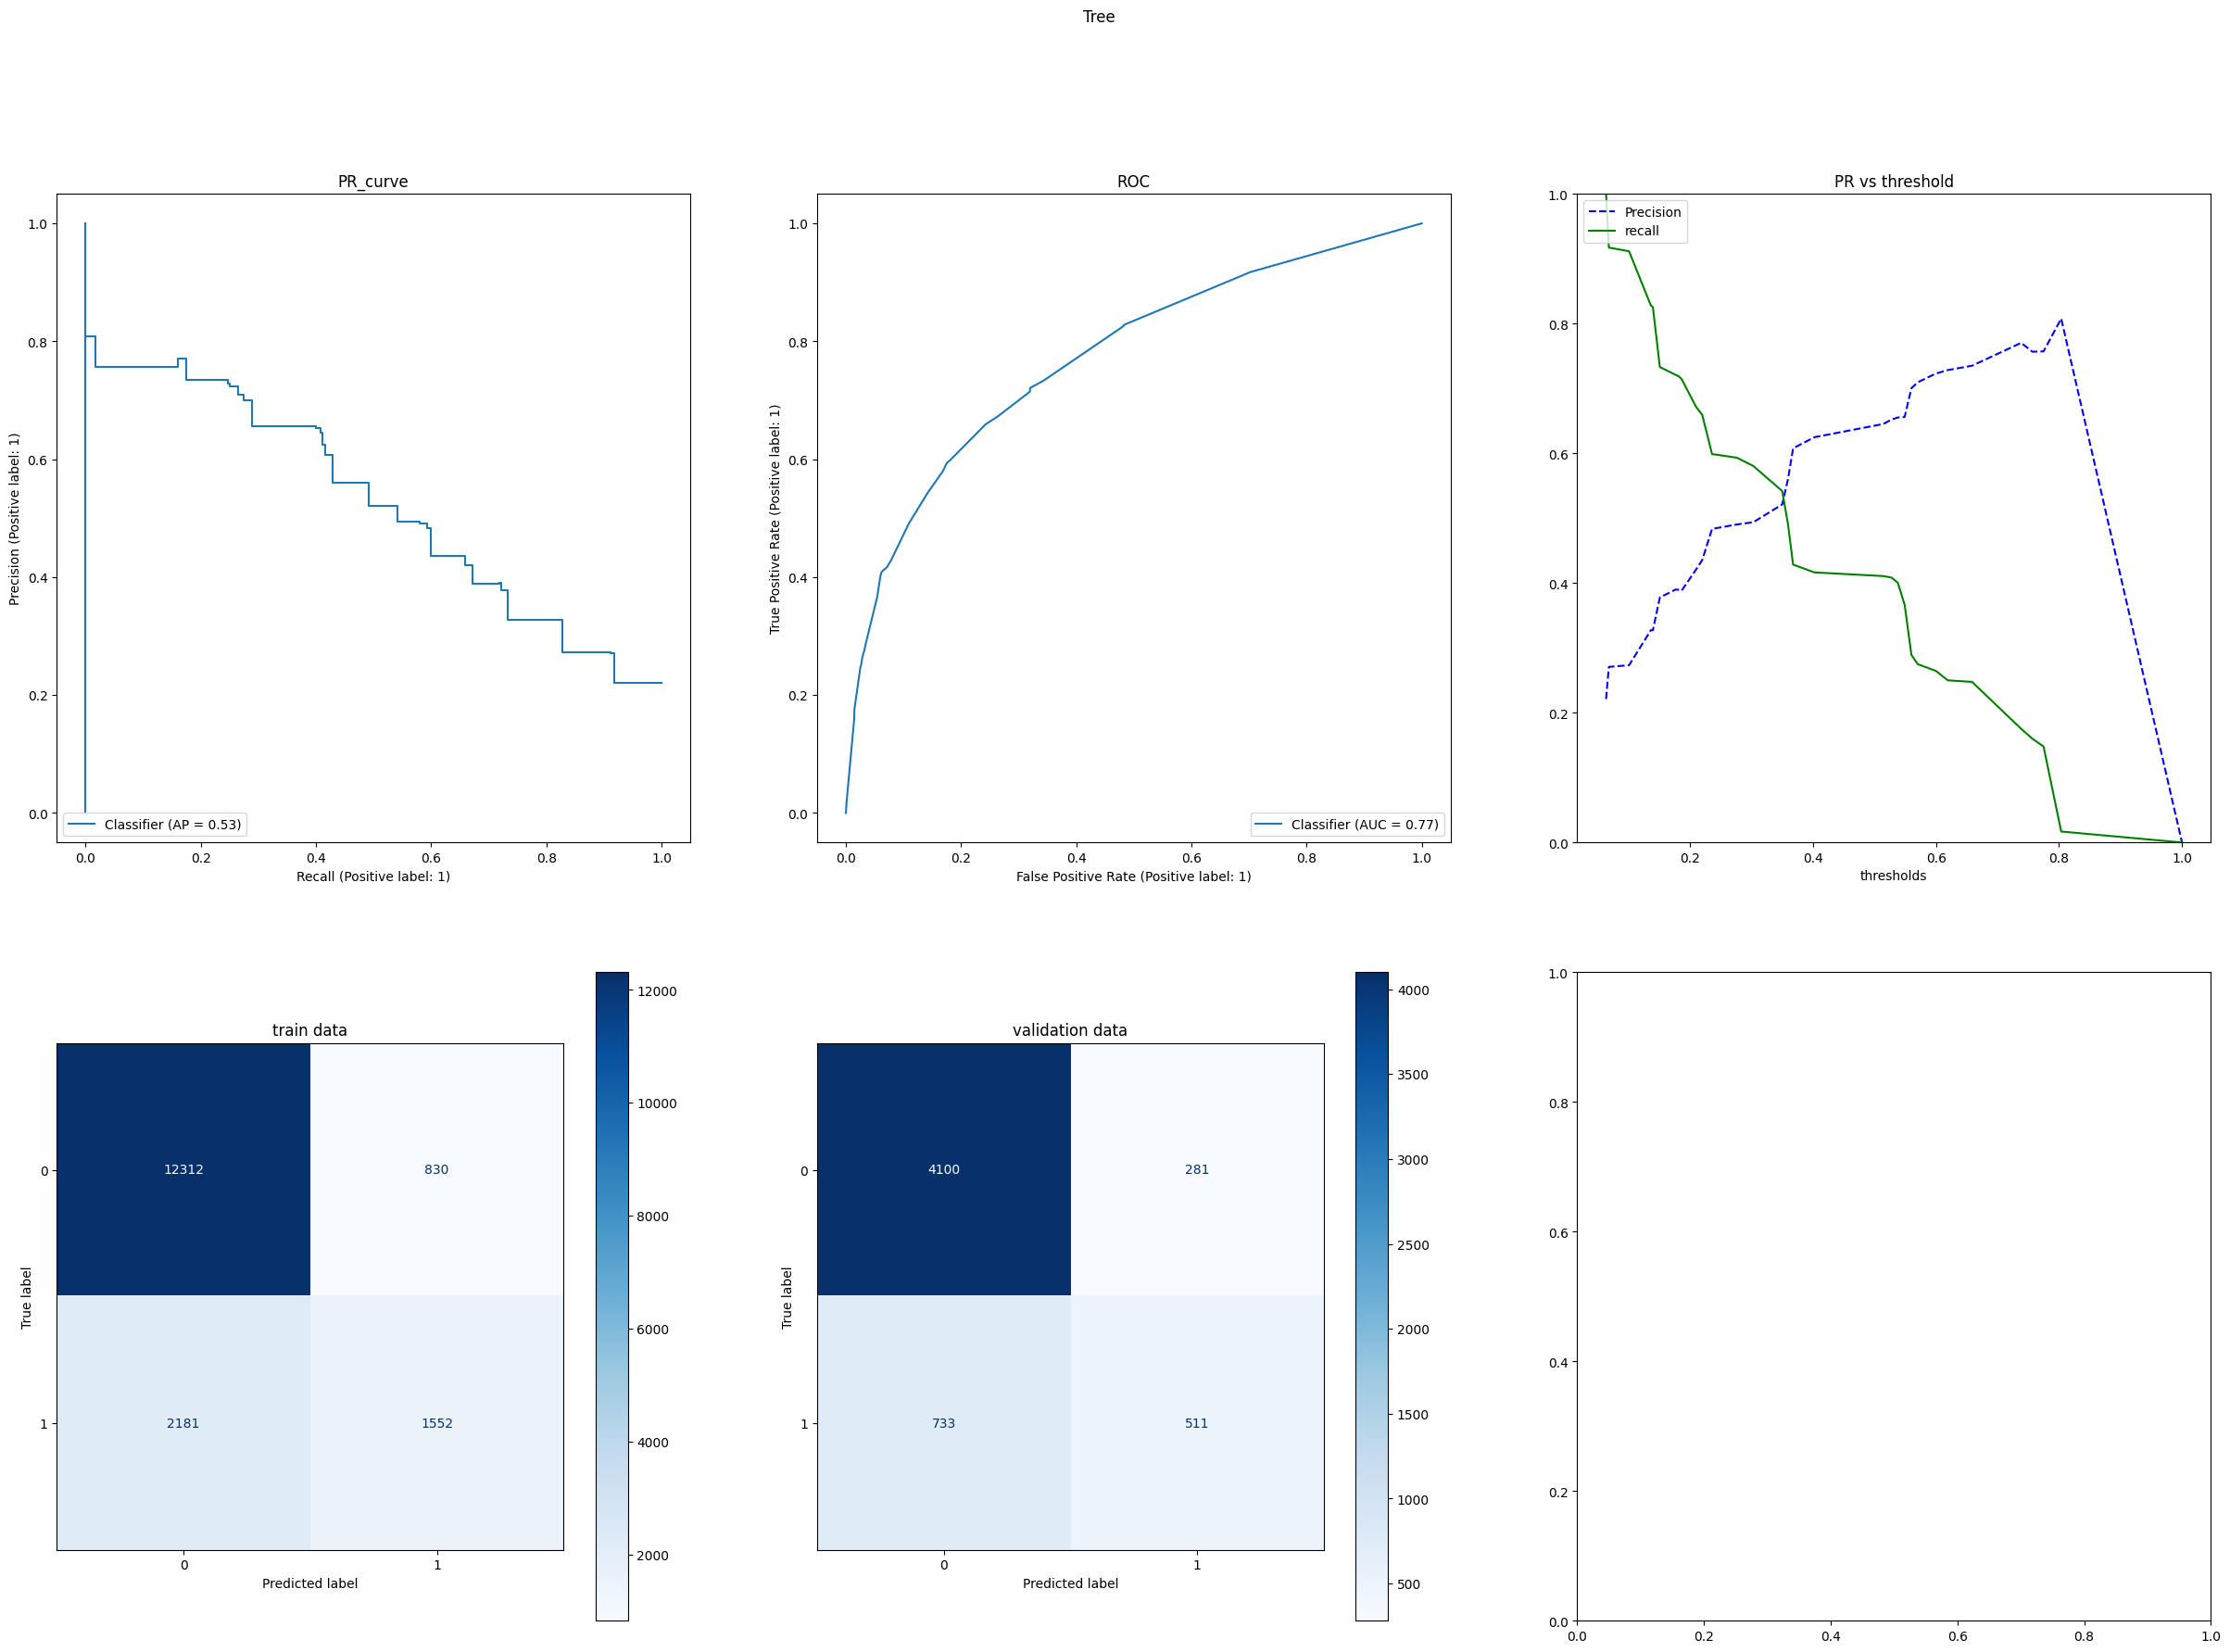

Forest
[[4237  144]
 [ 937  307]]

train scores
accuracy : 0.8110814814814815
precision : 0.6978939724037764
recall : 0.25743369943744976
f1_score: 0.37612524461839525

Val scores
accuracy : 0.8078222222222222
precision : 0.6807095343680709
recall : 0.24678456591639872
f1_score: 0.3622418879056047


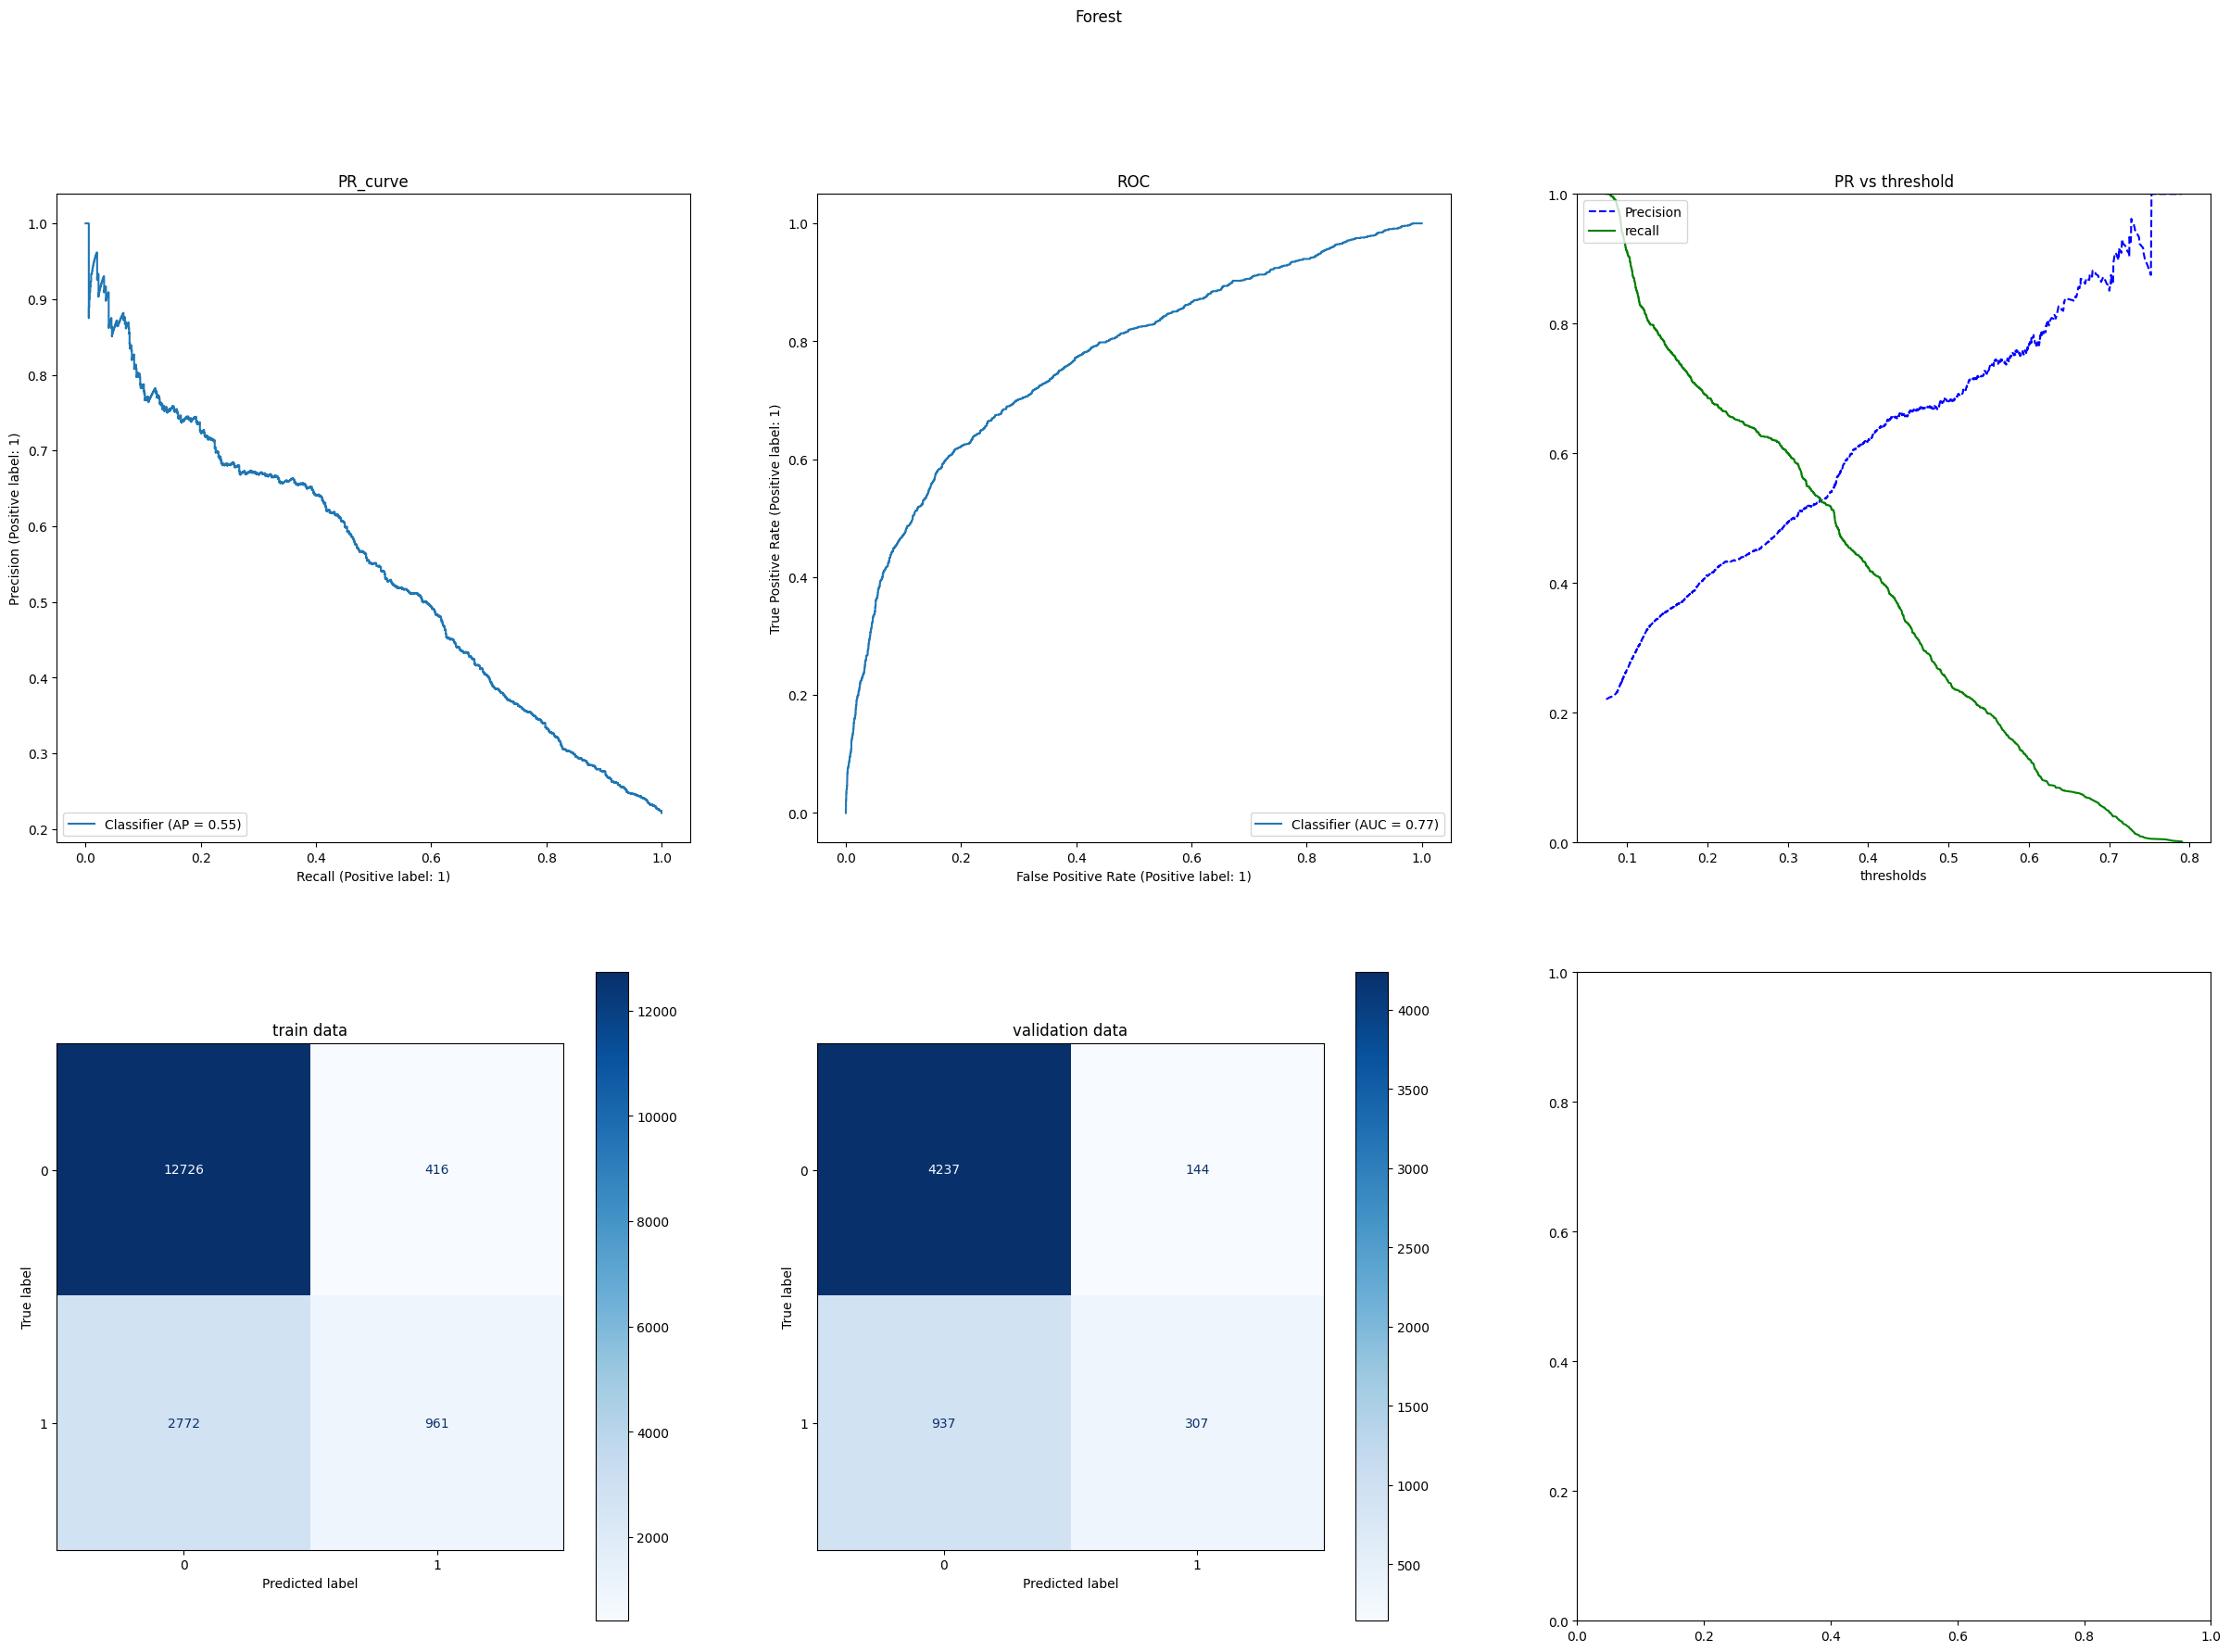

Ada
[[4221  160]
 [ 923  321]]

train scores
accuracy : 0.8064
precision : 0.6643159379407616
recall : 0.25234395928207876
f1_score: 0.36575422248107164

Val scores
accuracy : 0.8074666666666667
precision : 0.6673596673596673
recall : 0.2580385852090032
f1_score: 0.3721739130434782


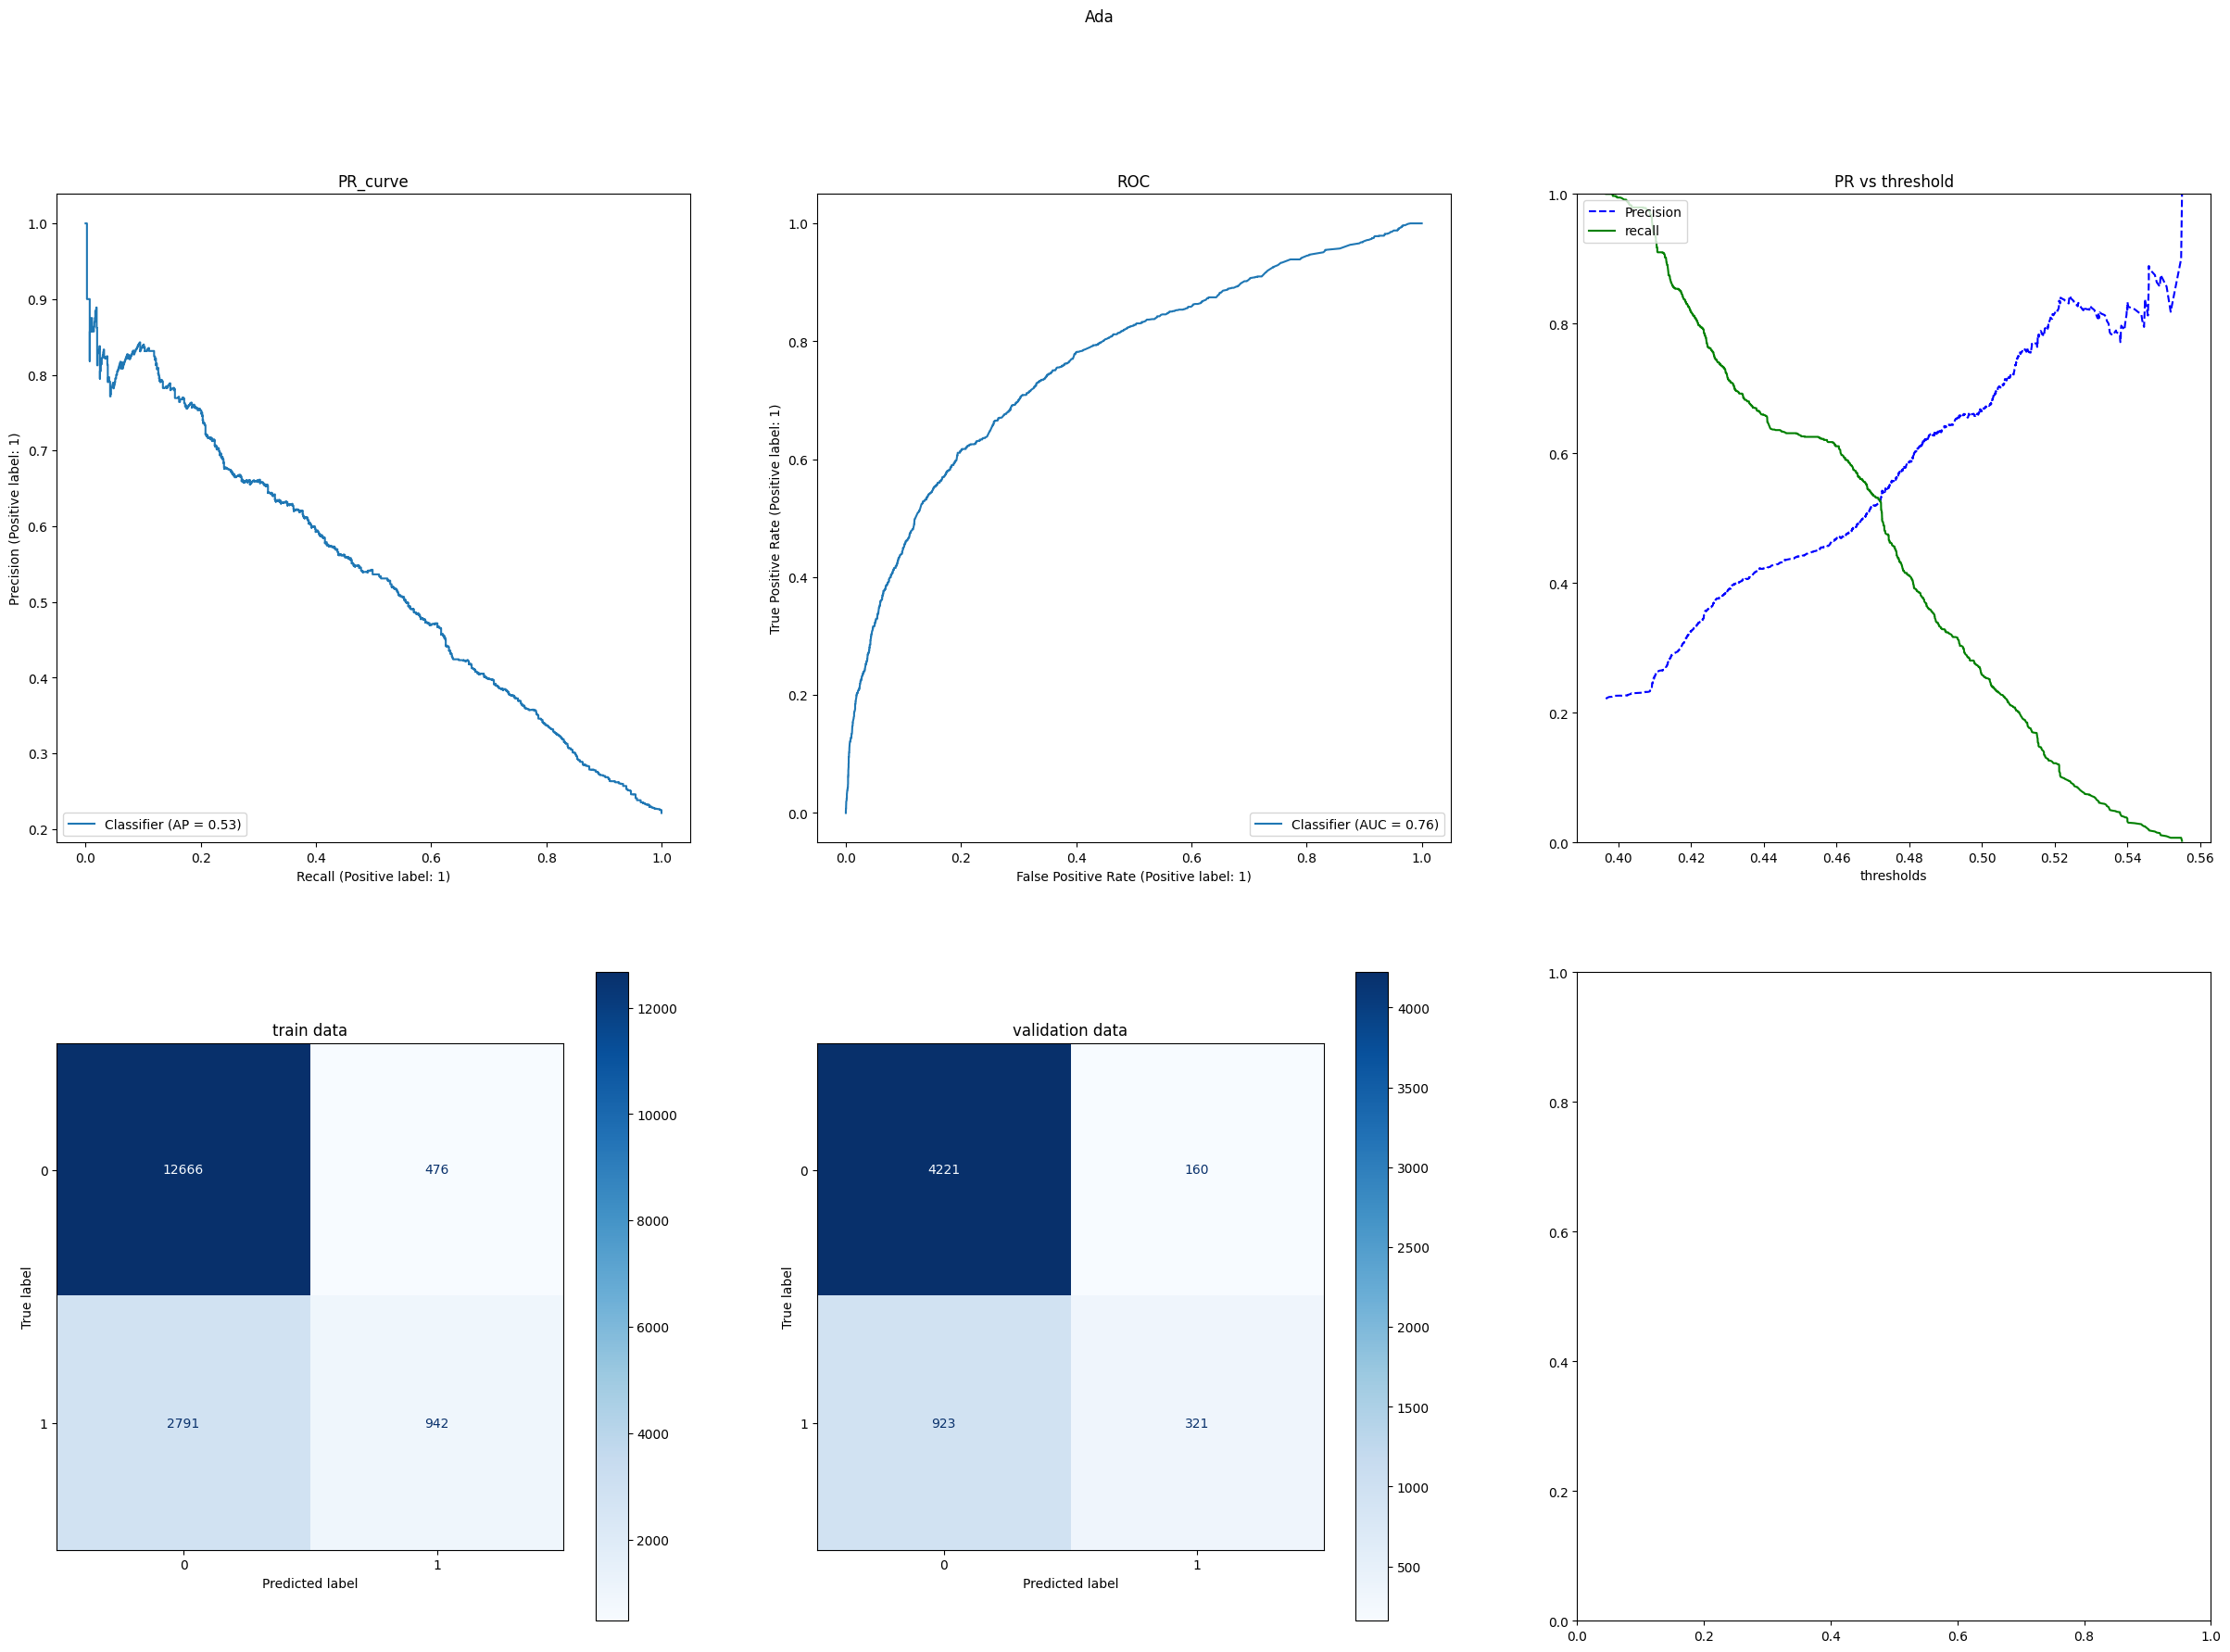

GdBoost
[[4254  127]
 [ 968  276]]

train scores
accuracy : 0.8074074074074075
precision : 0.6946011281224819
recall : 0.23091347441735868
f1_score: 0.3466023321270607

Val scores
accuracy : 0.8053333333333333
precision : 0.684863523573201
recall : 0.22186495176848875
f1_score: 0.33515482695810567


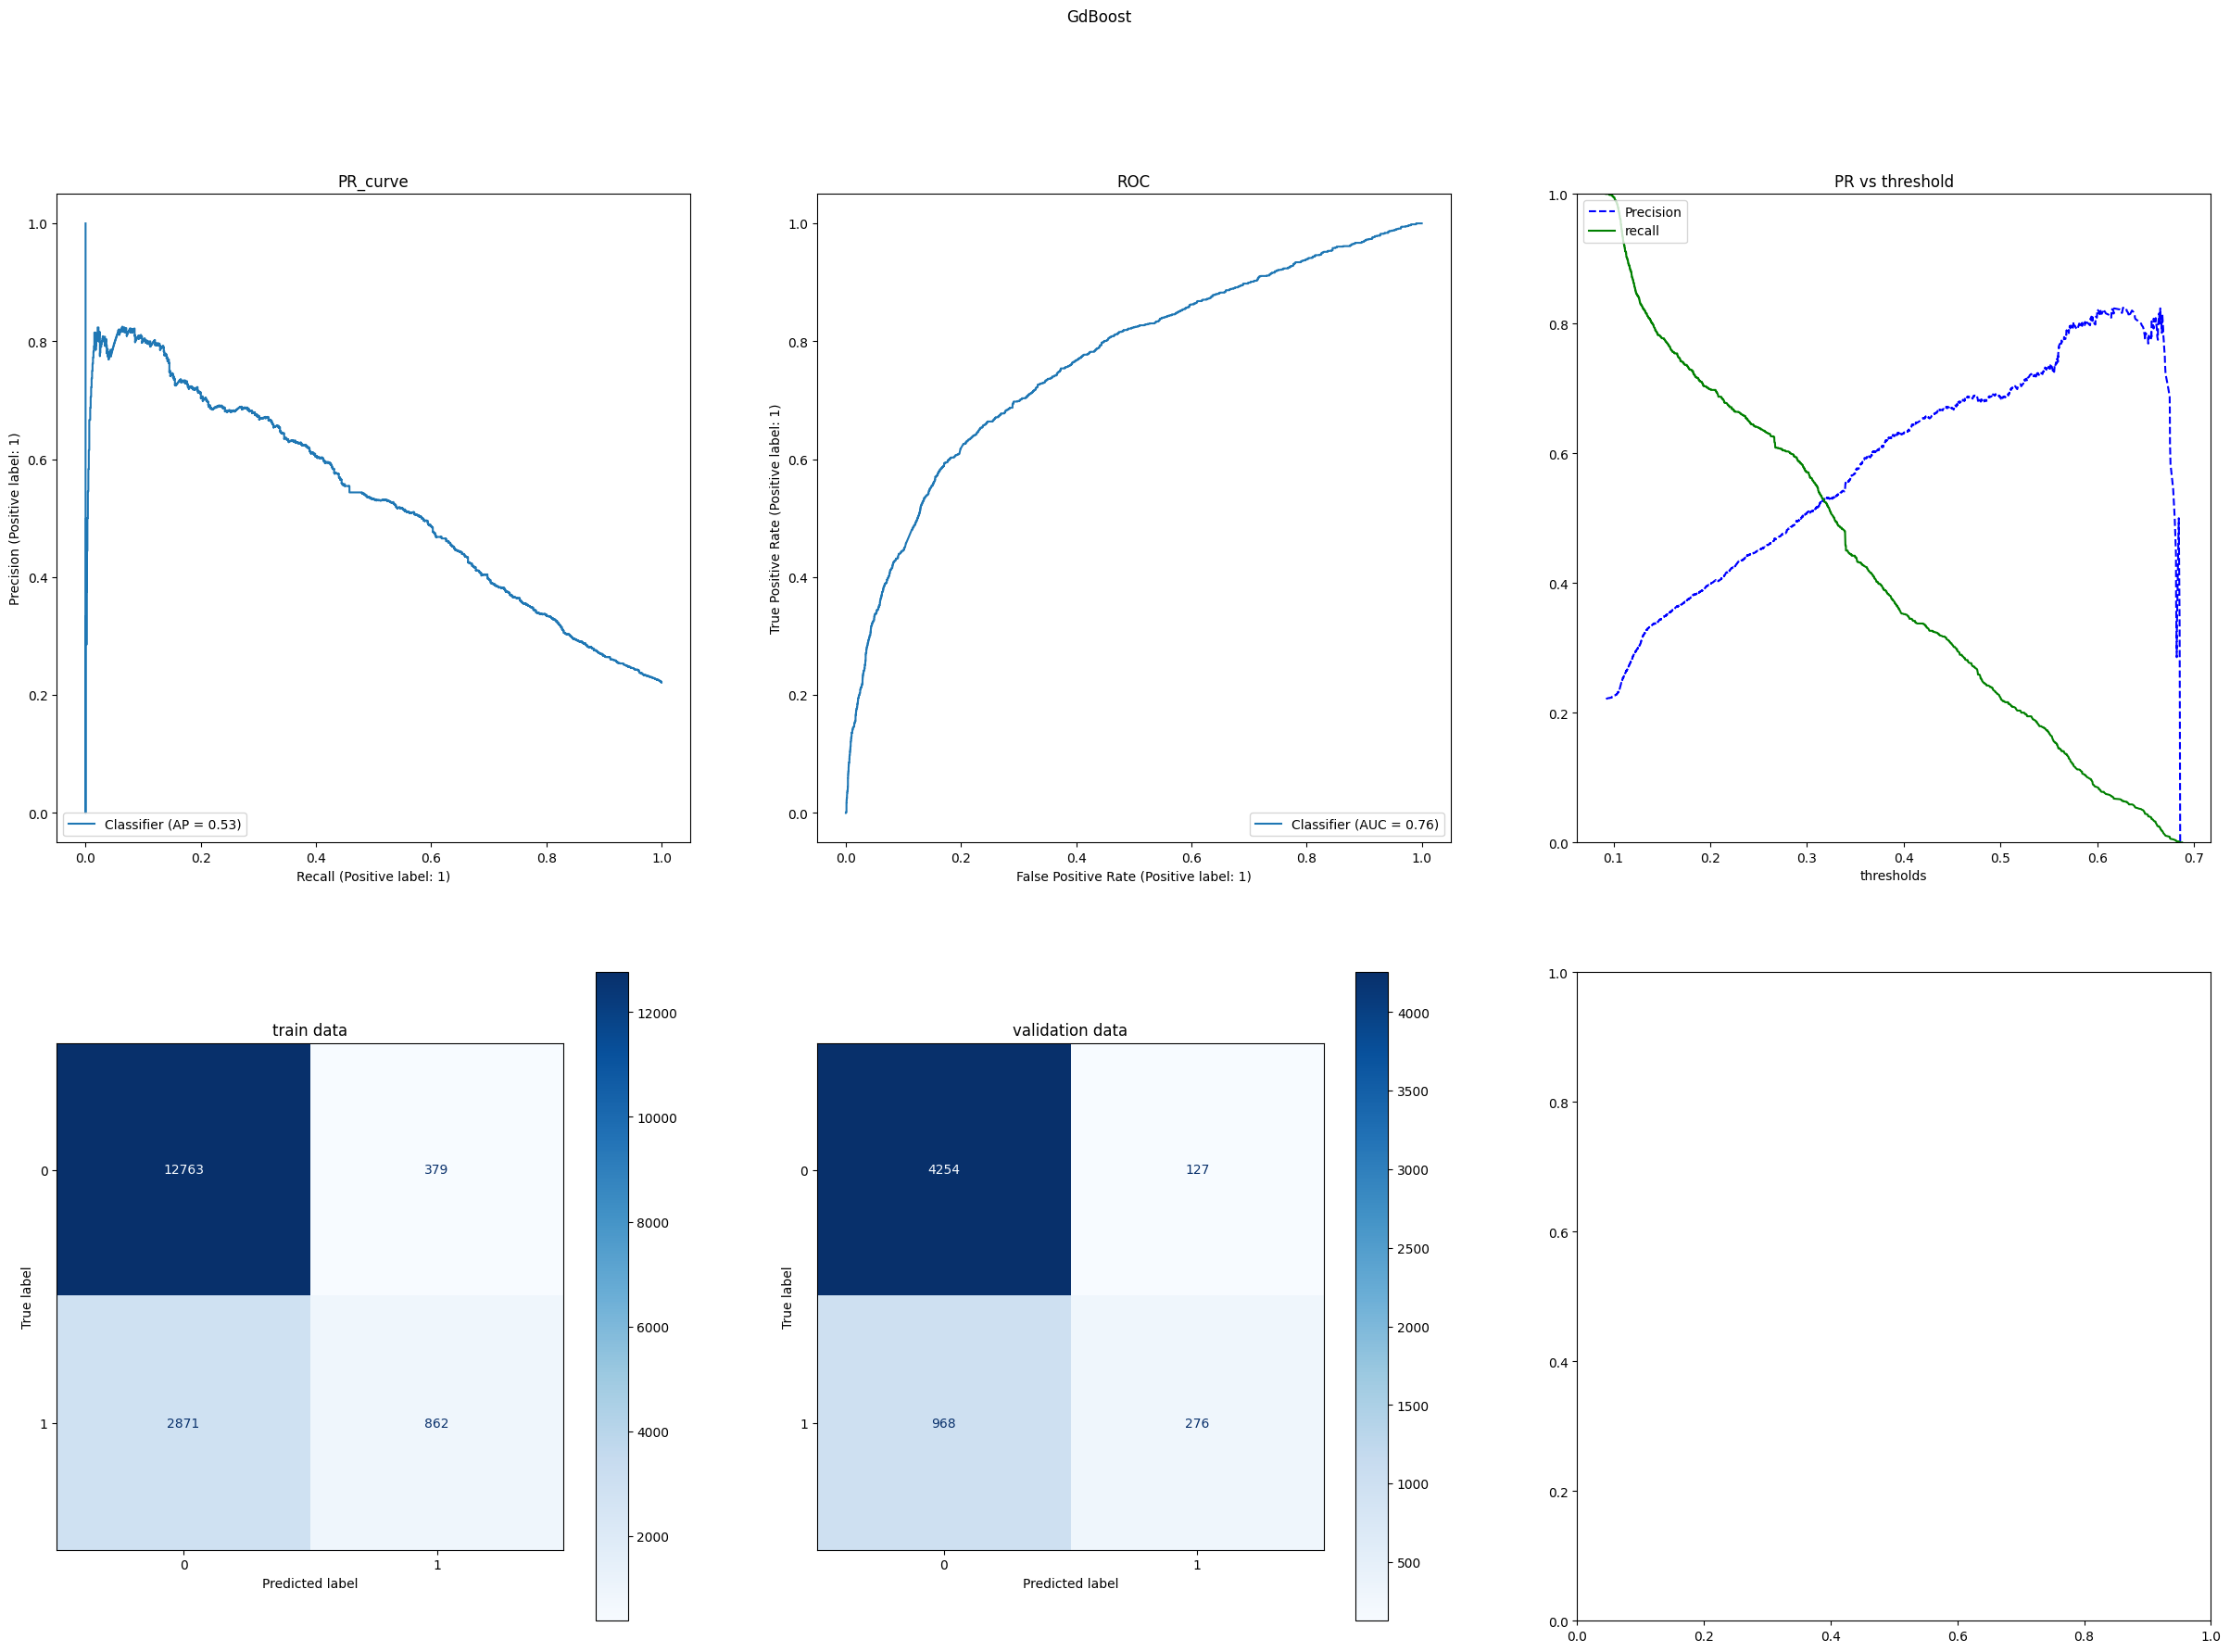

In [22]:

my_base_transform = BasicTransformer(scale="")
clfs = [
    DecisionTreeClassifier(max_depth=5,
                            random_state=42),
    RandomForestClassifier(n_estimators=500,
                            max_depth=5,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=600,
                        learning_rate=0.01,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=600,
                                learning_rate=0.005,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [23]:
predictions = np.array(y_val_preds).transpose()
pred_df = pd.concat([y_val ,pd.DataFrame(predictions,index=y_val.index)],axis=1)

In [24]:
try:
    pred_df.to_csv(output_path+'val_results_less_features.csv')
except:
   try:
        pred_df.to_csv(objectut+'val_results_less_features.csv')
   except:
        print('err')
    

In [25]:
wrong =pred_df.apply(lambda x :abs(x-pred_df.default), axis=0)
wrong_sum =wrong.sum(axis=1)

Total 24 classifying was executed
Following are analysis of consistently wrong samples


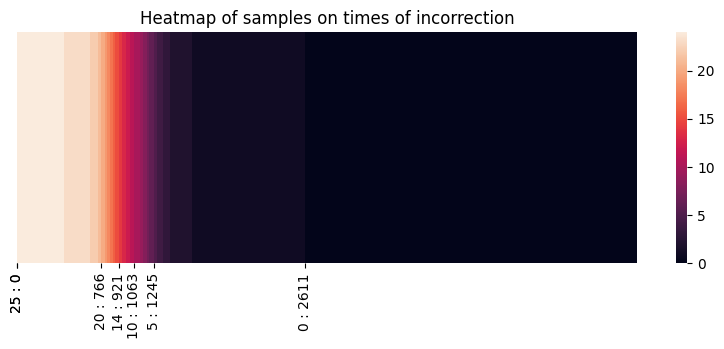

In [26]:
n = wrong.shape[1]-1
print(f'Total {n} classifying was executed\nFollowing are analysis of consistently wrong samples')

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,3))
freq_for_heat =wrong_sum.sort_values(ascending=False).to_numpy().reshape(1,-1)
sns.heatmap(freq_for_heat,vmax=n)
x_ticks =[wrong_sum[wrong_sum>j].shape[0] for j in [27,25,20,14,10,5,0]]
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{freq} : {count}' for count,freq in zip(x_ticks,[27,25,20,14,10,5,0])])
ax.set_yticks([])
ax.set_title('Heatmap of samples on times of incorrection')
for n in [50,100,200]:
    plt.savefig(output_path+f'consis_wrong_heat_dpi{n}.png',dpi=n)
plt.show()
plt.close()

In [27]:
cons_wrong_idc =wrong_sum[wrong_sum>14].index

cons_wrong =df_original.loc[cons_wrong_idc]

print(f'mean of consistently wrong samples = {round(cons_wrong.default.mean(),4)}')

print(f'mean of every incorrenct samples = {df_original.loc[wrong_sum[wrong_sum>0].index].default.mean()}')

incorrect_means = [df_original.loc[wrong_sum[wrong_sum>i].index].default.mean() for i in np.arange(0,28)]

mean of consistently wrong samples = 0.8654
mean of every incorrenct samples = 0.4304864036767522


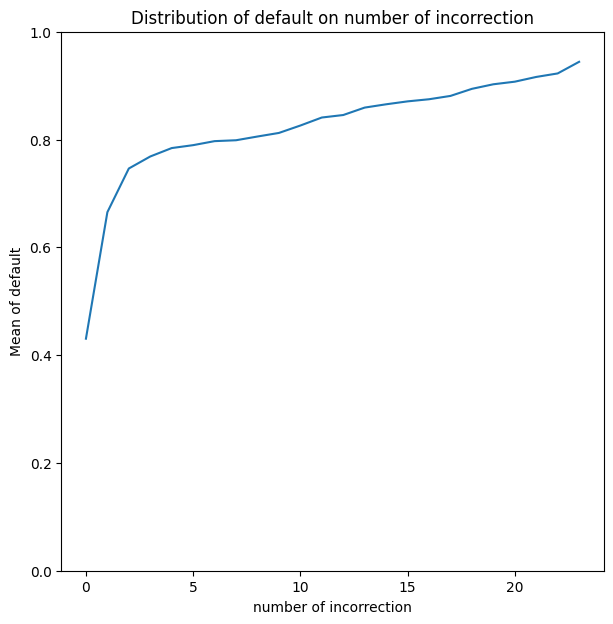

In [28]:
fig ,ax = plt.subplots(figsize=(7,7))
ax.plot(np.arange(0,28),incorrect_means)
ax.set_ylim(0,1)
ax.set_ylabel('Mean of default')
ax.set_xlabel('number of incorrection')
ax.set_title('Distribution of default on number of incorrection')
plt.savefig(output_path+'dist_def_number_incorr.png',dpi=100)
plt.show()
plt.close()

## Mostly, consistently incorrect samples are mostly default

In [29]:
df_original.loc[cons_wrong_idc].to_csv(output_path+'consistently_wrong_samples.csv')

In [30]:
V=pd.DataFrame(evals_df_columns,columns=['name','accuracy','precision','recall','f1'])

In [31]:
V.to_csv(output_path+'eval_results.csv')
print(V)

                    name  accuracy  precision  recall      f1
0     t_series,non_regul    0.7218     0.3749  0.3867  0.3807
1     t_series,non_regul    0.8100     0.6248  0.3521  0.4504
2     t_series,non_regul    0.8140     0.6500  0.3449  0.4506
3     t_series,non_regul    0.8208     0.6810  0.3569  0.4684
4          raw,non_regul    0.7252     0.3876  0.4188  0.4026
5          raw,non_regul    0.8212     0.6715  0.3746  0.4809
6          raw,non_regul    0.8204     0.6906  0.3408  0.4564
7          raw,non_regul    0.8252     0.6933  0.3762  0.4878
8           t_series,reg    0.8222     0.6815  0.3682  0.4781
9           t_series,reg    0.8078     0.6680  0.2605  0.3748
10          t_series,reg    0.8078     0.6646  0.2645  0.3784
11          t_series,reg    0.8091     0.6923  0.2460  0.3630
12               raw,reg    0.8233     0.6978  0.3545  0.4701
13               raw,reg    0.8178     0.7151  0.2926  0.4153
14               raw,reg    0.8222     0.7226  0.3183  0.4420
15      